In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
particle_dtype = np.dtype(
    [
        ("pdg", np.uint32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
tr_veto_dtype = np.dtype(
    [   ("SPE_rlogl", np.float32),
        ("Cascade_rlogl", np.float32),
        ("SPE_rlogl_noDC", np.float32),
        ("Cascade_rlogl_noDC", np.float32),
        ("FirstHitZ", np.float32),
        ("VHESelfVetoVertexPosZ", np.float32),
        ("LeastDistanceToPolygon_Veto", np.float32)
    ]
)
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32),
        ('TotalColumnDepthCGS',np.float32),
        ('MaxAzimuth',np.float32),
        ('SelectionWeight',np.float32),
        ('InIceNeutrinoEnergy',np.float32),
        ('PowerLawIndex',np.float32),
        ('TotalPrimaryWeight',np.float32),
        ('PrimaryNeutrinoZenith',np.float32),
        ('TotalWeight',np.float32),
        ('PropagationWeight',np.float32),
        ('NInIceNus',np.float32),
        ('TrueActiveLengthBefore',np.float32),
        ('TypeWeight',np.float32),
        ('PrimaryNeutrinoType',np.float32),
        ('RangeInMeter',np.float32),
        ('BjorkenY',np.float32),
        ('MinZenith',np.float32),
        ('InIceNeutrinoType',np.float32),
        ('CylinderRadius',np.float32),
        ('BjorkenX',np.float32),
        ('InteractionPositionWeight',np.float32),
        ('RangeInMWE',np.float32),
        ('InteractionColumnDepthCGS',np.float32),
        ('CylinderHeight',np.float32),
        ('MinAzimuth',np.float32),
        ('TotalXsectionCGS',np.float32),
        ('OneWeightPerType',np.float32),
        ('ImpactParam',np.float32),
        ('InteractionType',np.float32),
        ('TrueActiveLengthAfter',np.float32),
        ('MaxZenith',np.float32),
        ('InteractionXsectionCGS',np.float32),
        ('PrimaryNeutrinoEnergy',np.float32),
        ('DirectionWeight',np.float32),
        ('InjectionAreaCGS',np.float32),
        ('MinEnergyLog',np.float32),
        ('SolidAngle',np.float32),
        ('LengthInVolume',np.float32),
        ('NEvents',np.uint32),
        ('OneWeight',np.float32),
        ('MaxEnergyLog',np.float32),
        ('InteractionWeight',np.float32),
        ('EnergyLost',np.float32)
    ]
)
info_dtype = np.dtype(                                                                                                      
    [                                                                                                                           
    ("id", id_dtype),                                                                                                       
    ("image", np.float32, (300, 60)),
    ("neutrino", particle_dtype),
    ("daughter", particle_dtype),                                                                                           
    ("energies", np.float32,(10)),                                                                                          
    ("pdgs", np.float32,(10)), 
         ("logan_veto", tr_veto_dtype),
    ("q_tot", np.float32),
    ("cog", np.float32,(3)),                                                                                                
    ("q_st", np.float32),
    ("st_pos", np.float32,(3)),                                                                                             
    ("st_num", np.float32),
    ("distance", np.float32),                                                                                               
    ("weight", weight_dtype),                                                                                                                    
    ]
)

keys_dtype = np.dtype(  
        [
        ("passed", np.bool_),
        ("header", np.bool_),
        ("raw_data", np.bool_),
        ("weights", np.bool_),
        ("mctree", np.bool_), 
        ("cvstats", np.bool_),
        ("pulses", np.bool_)
           ]
)
w_info_dtype = np.dtype(                                                                                                                    
        [                                                                                                                                         
        ("id", id_dtype),    
        ("neutrino", particle_dtype),
        ("energy", np.float32,(10)),
        ("pdg", np.float32,(10)),
        ("weight", weight_dtype),
        ("keys", keys_dtype)
    ]
)

In [3]:
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC.npy', mmap_mode = 'r')
data_mc = np.load('/fastio2/dasha/double_pulse/data_NuMuCC.npy', mmap_mode = 'r')
data_tc = np.load('/fastio2/dasha/double_pulse/data_NuTauCC.npy', mmap_mode = 'r')
data_en = np.load('/fastio2/dasha/double_pulse/data_NuENC.npy', mmap_mode = 'r')
data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMuNC.npy', mmap_mode = 'r')
data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTauNC.npy', mmap_mode = 'r')
data_eg = np.load('/fastio2/dasha/double_pulse/data_NuEGR.npy', mmap_mode = 'r')

In [4]:
print(data_tc['logan_veto']["SPE_rlogl"])

[[7.5960417]
 [7.824708 ]
 [7.582235 ]
 ...
 [7.526029 ]
 [7.5103207]
 [7.445491 ]]


/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


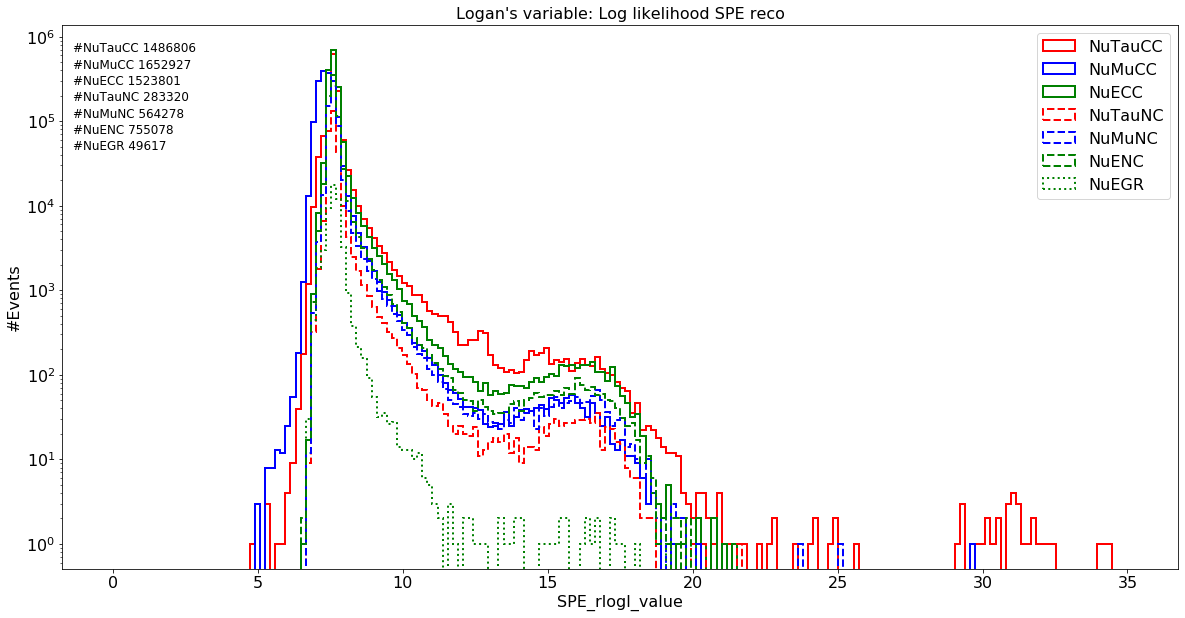

In [163]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: Log likelihood SPE reco", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('SPE_rlogl_value', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["SPE_rlogl"], bins =200, histtype = 'step',edgecolor ='r', lw =2, range = [0,35], label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["SPE_rlogl"], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,35], label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["SPE_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, range = [0,35], label = "NuECC")  
ax.hist(data_tn['logan_veto']["SPE_rlogl"], bins =200, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = [0,35], label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["SPE_rlogl"], bins =200, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = [0,35], label = "NuMuNC")  
ax.hist(data_en['logan_veto']["SPE_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = [0,35], label = "NuENC")  
ax.hist(data_eg['logan_veto']["SPE_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = [0,35], label = "NuEGR")  
plt.legend()
plt.show()

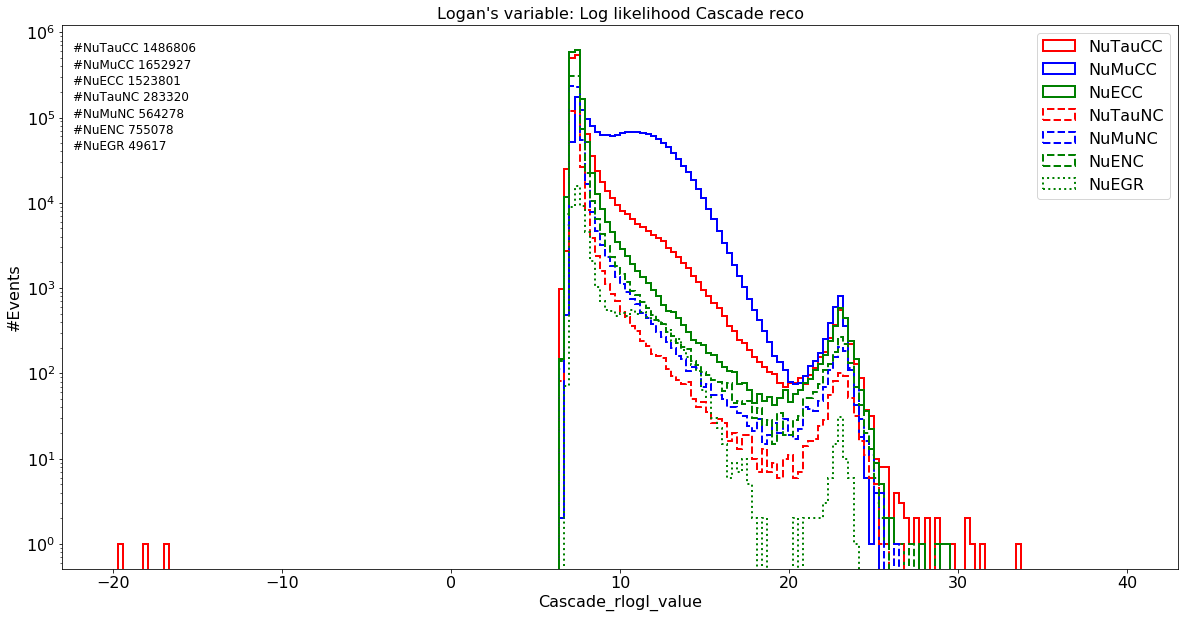

In [162]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: Log likelihood Cascade reco", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Cascade_rlogl_value', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='r', lw =2, range = [-20,40], label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [-20,40], label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, range = [-20,40], label = "NuECC")  
ax.hist(data_tn['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = [-20,40], label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = [-20,40], label = "NuMuNC")  
ax.hist(data_en['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = [-20,40], label = "NuENC")  
ax.hist(data_eg['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = [-20,40], label = "NuEGR")  

plt.legend()
plt.show()

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


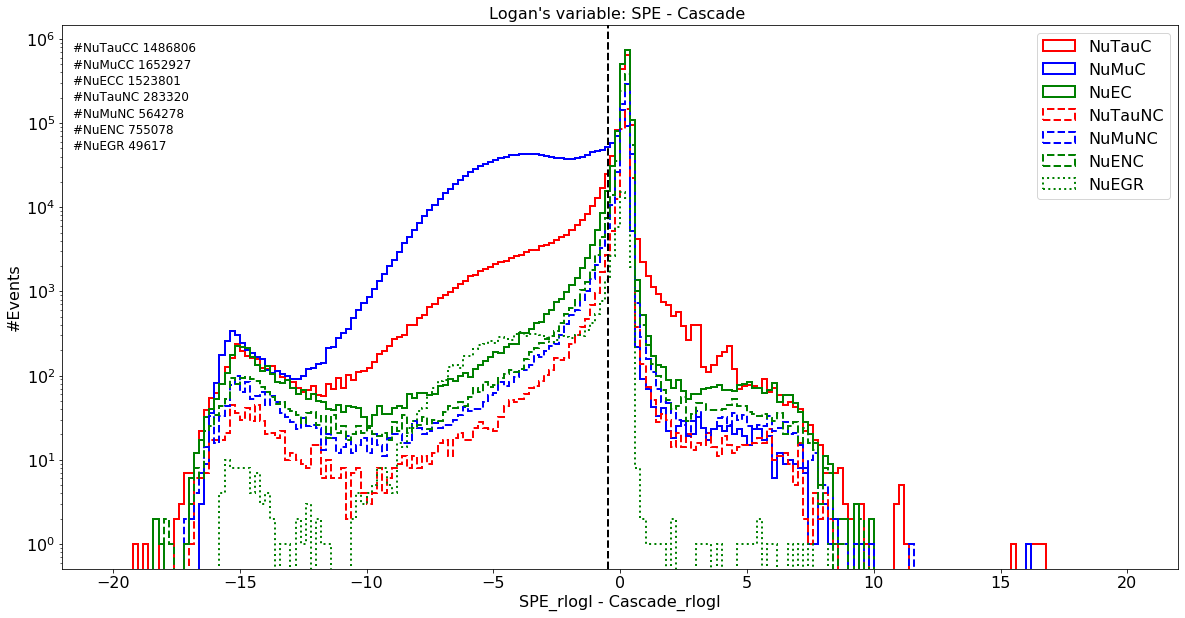

In [164]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: SPE - Cascade ", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('SPE_rlogl - Cascade_rlogl', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step', lw =2, range = [-20,20], edgecolor ='r', label = "NuTauC")  
ax.hist(data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step', lw =2, range = [-20,20], edgecolor ='b', label = "NuMuC")  
ax.hist(data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step', lw =2, range = [-20,20], edgecolor ='g', label = "NuEC")
ax.hist(data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = [-20,20], label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = [-20,20], label = "NuMuNC")  
ax.hist(data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = [-20,20], label = "NuENC")  
ax.hist(data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = [-20,20], label = "NuEGR")  

ax.axvline(x=-0.5,linewidth=2, ls ="--", color='k' )
plt.legend()
plt.show()

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


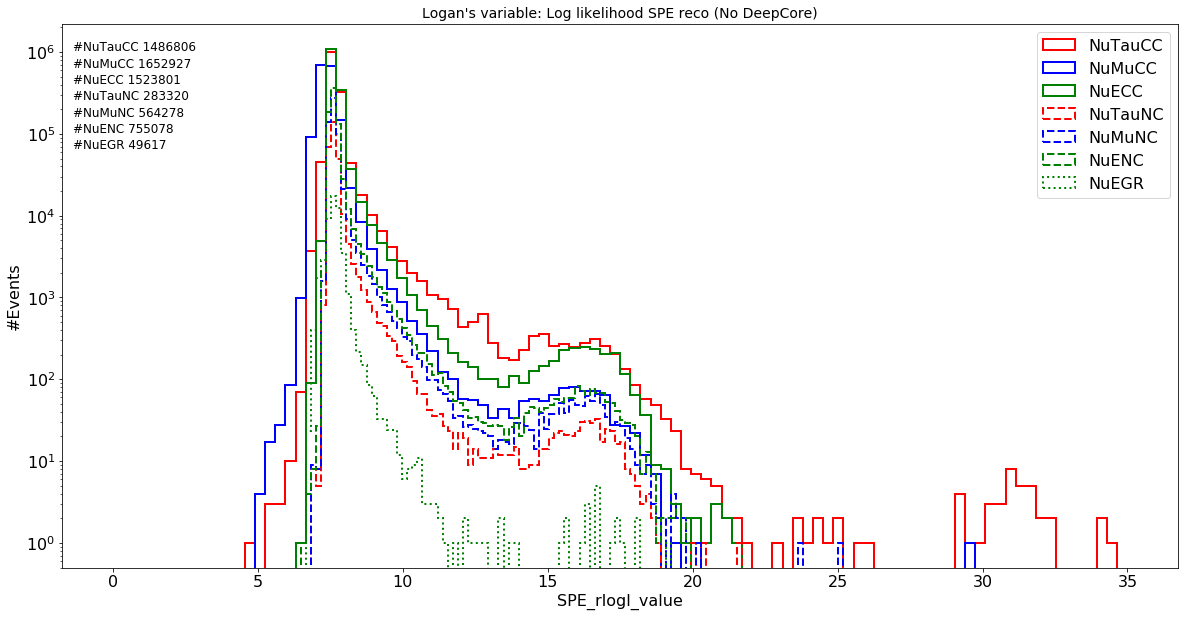

In [165]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: Log likelihood SPE reco (No DeepCore)", fontsize = 14)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('SPE_rlogl_value', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["SPE_rlogl_noDC"], bins =100, histtype = 'step',edgecolor ='r', lw =2, range = [0,35], label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["SPE_rlogl_noDC"], bins =100, histtype = 'step',edgecolor ='b', lw =2, range = [0,35], label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["SPE_rlogl_noDC"], bins =100, histtype = 'step',edgecolor ='g', lw =2, range = [0,35], label = "NuECC")  
ax.hist(data_tn['logan_veto']["SPE_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = [0,35], label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["SPE_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = [0,35], label = "NuMuNC")  
ax.hist(data_en['logan_veto']["SPE_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = [0,35], label = "NuENC")  
ax.hist(data_eg['logan_veto']["SPE_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = [0,35], label = "NuEGR")  

plt.legend()
plt.show()

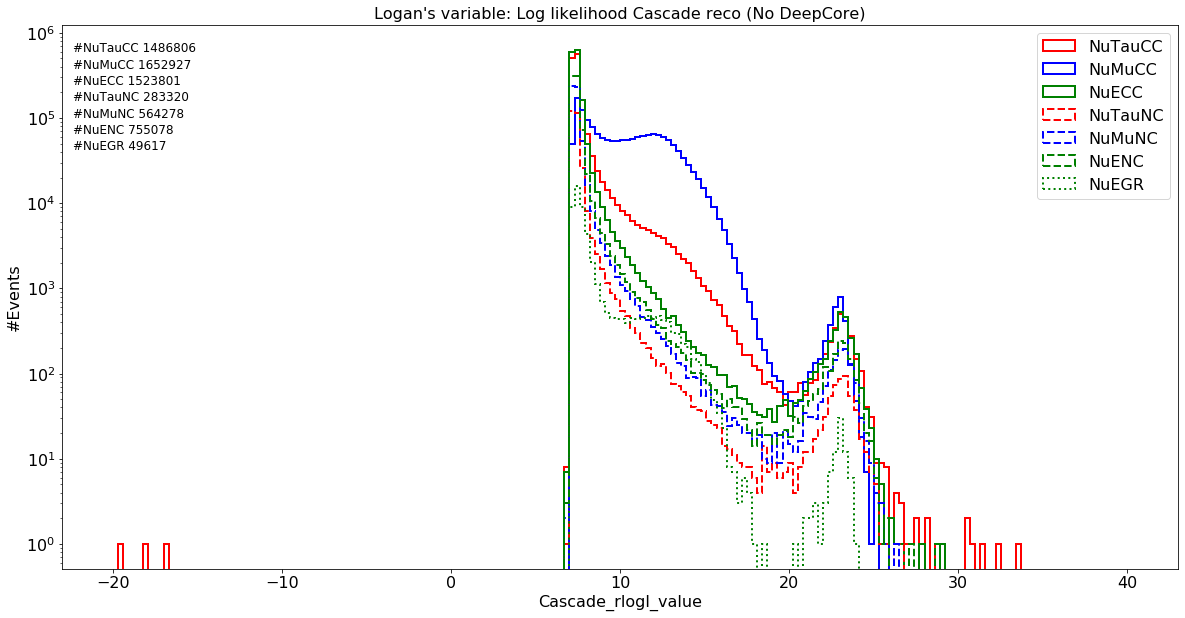

In [166]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: Log likelihood Cascade reco (No DeepCore)", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Cascade_rlogl_value', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='r', lw =2, range = [-20,40], label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [-20,40], label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='g', lw =2, range = [-20,40], label = "NuECC")  
ax.hist(data_tn['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = [-20,40], label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = [-20,40], label = "NuMuNC")  
ax.hist(data_en['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = [-20,40], label = "NuENC")  
ax.hist(data_eg['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = [-20,40], label = "NuEGR")  

plt.legend()
plt.show()

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


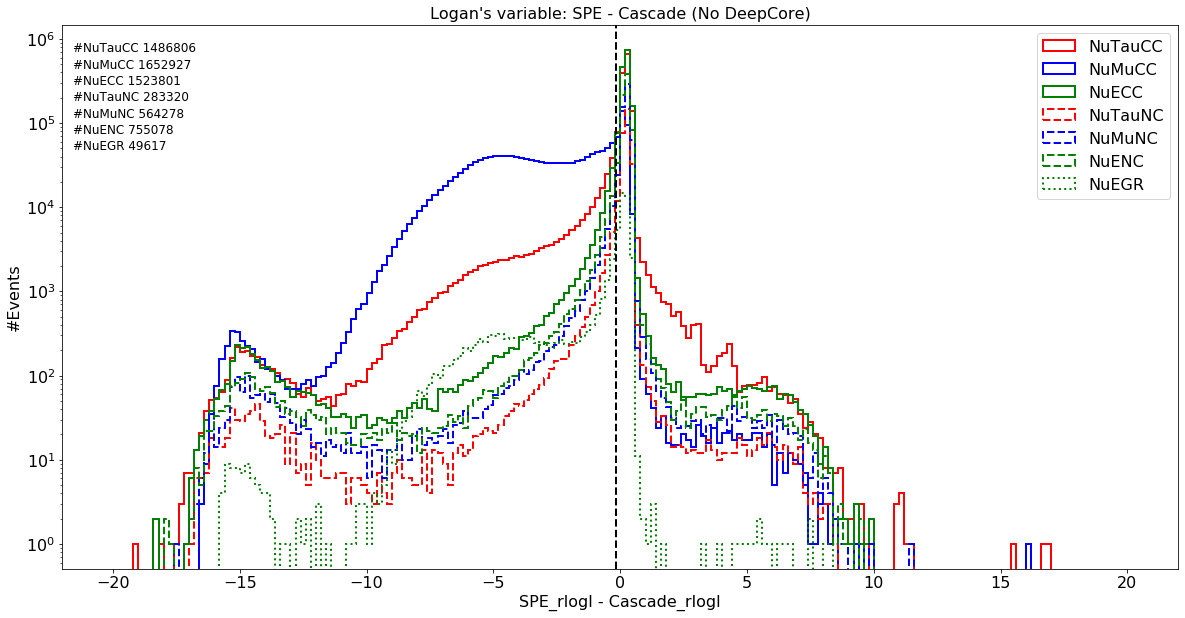

In [167]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: SPE - Cascade (No DeepCore)", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('SPE_rlogl - Cascade_rlogl', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["SPE_rlogl_noDC"]-data_tc['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step', lw =2, range = [-20,20], edgecolor ='r', label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["SPE_rlogl_noDC"]-data_mc['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step', lw =2, range = [-20,20], edgecolor ='b', label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["SPE_rlogl_noDC"]-data_ec['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step', lw =2, range = [-20,20], edgecolor ='g', label = "NuECC")  
ax.hist(data_tn['logan_veto']["SPE_rlogl_noDC"]-data_tn['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = [-20,20], label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["SPE_rlogl_noDC"]-data_mn['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = [-20,20], label = "NuMuNC")  
ax.hist(data_en['logan_veto']["SPE_rlogl_noDC"]-data_en['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = [-20,20], label = "NuENC")  
ax.hist(data_eg['logan_veto']["SPE_rlogl_noDC"]-data_eg['logan_veto']["Cascade_rlogl_noDC"], bins =200, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = [-20,20], label = "NuEGR")  

ax.axvline(x=-0.15,linewidth=2, ls ="--", color='k' )

plt.legend()
plt.show()

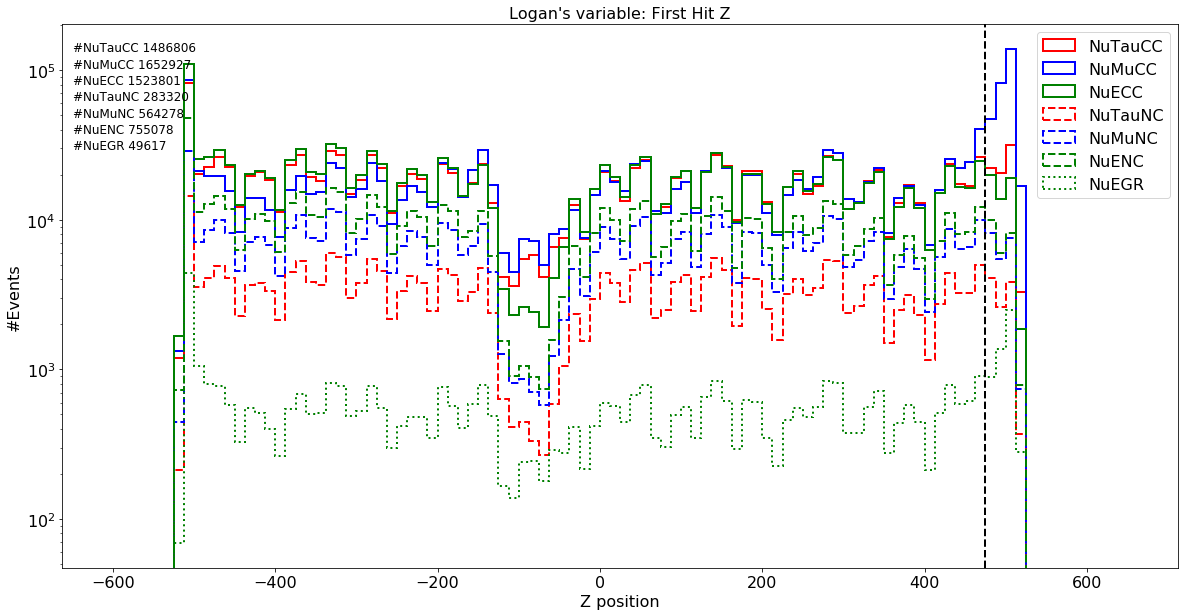

In [170]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: First Hit Z", fontsize = 16)
ax.text(0.01, 0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Z position', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["FirstHitZ"], bins =100, histtype = 'step',edgecolor ='r', lw =2, range = [-600,650], label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["FirstHitZ"], bins =100, histtype = 'step',edgecolor ='b', lw =2, range = [-600,650], label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["FirstHitZ"], bins =100, histtype = 'step',edgecolor ='g', lw =2, range = [-600,650], label = "NuECC")  
ax.hist(data_tn['logan_veto']["FirstHitZ"], bins =100, histtype = 'step',edgecolor ='r', lw =2, range = [-600,650], ls ="--", label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["FirstHitZ"], bins =100, histtype = 'step',edgecolor ='b', lw =2, range = [-600,650], ls ="--", label = "NuMuNC")  
ax.hist(data_en['logan_veto']["FirstHitZ"], bins =100, histtype = 'step',edgecolor ='g', lw =2, range = [-600,650], ls ="--", label = "NuENC")  
ax.hist(data_eg['logan_veto']["FirstHitZ"], bins =100, histtype = 'step',edgecolor ='g', lw =2, range = [-600,650], ls =":", label = "NuEGR")  

ax.axvline(x=475,linewidth=2, ls ="--", color='k' )
plt.legend()
plt.show()

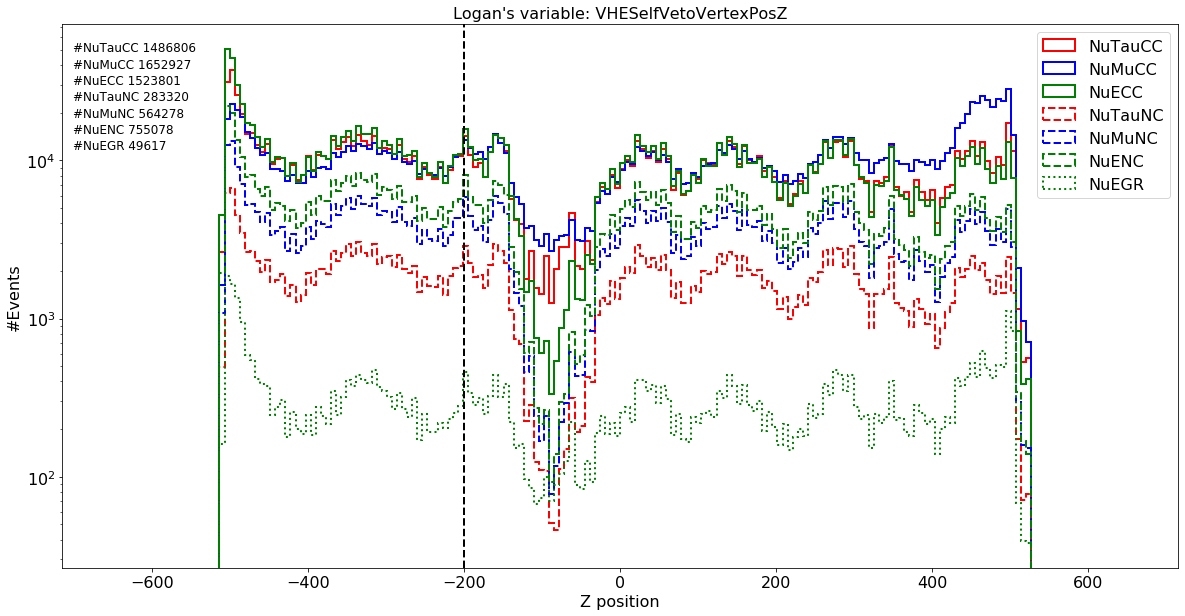

In [171]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: VHESelfVetoVertexPosZ", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Z position', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["VHESelfVetoVertexPosZ"], bins =200, histtype = 'step',edgecolor ='r', lw =2, range = [-650,650], label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["VHESelfVetoVertexPosZ"], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [-650,650], label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["VHESelfVetoVertexPosZ"], bins =200, histtype = 'step',edgecolor ='g', lw =2, range = [-650,650], label = "NuECC")  
ax.hist(data_tn['logan_veto']["VHESelfVetoVertexPosZ"], bins =200, histtype = 'step',edgecolor ='r', lw =2, range = [-650,650], ls ="--", label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["VHESelfVetoVertexPosZ"], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [-650,650], ls ="--", label = "NuMuNC")  
ax.hist(data_en['logan_veto']["VHESelfVetoVertexPosZ"], bins =200, histtype = 'step',edgecolor ='g', lw =2, range = [-650,650], ls ="--", label = "NuENC")  
ax.hist(data_eg['logan_veto']["VHESelfVetoVertexPosZ"], bins =200, histtype = 'step',edgecolor ='g', lw =2, range = [-650,650], ls =":", label = "NuEGR")  

ax.axvline(x=-200,linewidth=2, ls ="--", color='k' )

plt.legend()
plt.show()

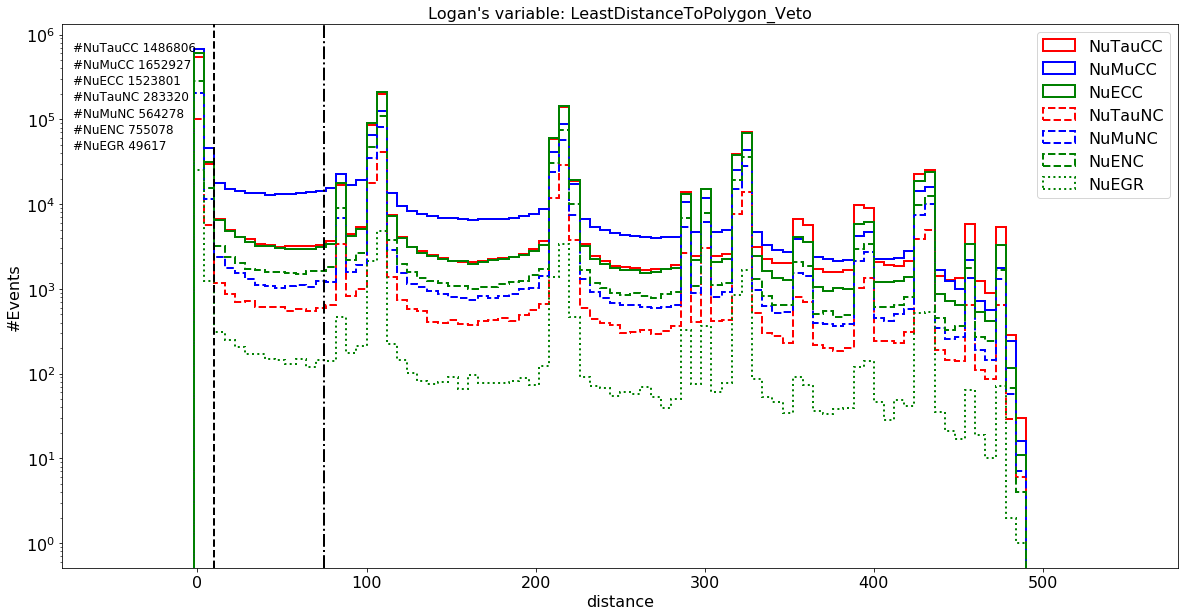

In [172]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: LeastDistanceToPolygon_Veto", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('distance', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['logan_veto']["LeastDistanceToPolygon_Veto"], bins =100, histtype = 'step',edgecolor ='r', lw =2, range = [-50,550], label = "NuTauCC")  
ax.hist(data_mc['logan_veto']["LeastDistanceToPolygon_Veto"], bins =100, histtype = 'step',edgecolor ='b', lw =2, range = [-50,550], label = "NuMuCC")  
ax.hist(data_ec['logan_veto']["LeastDistanceToPolygon_Veto"], bins =100, histtype = 'step',edgecolor ='g', lw =2, range = [-50,550], label = "NuECC")  
ax.hist(data_tn['logan_veto']["LeastDistanceToPolygon_Veto"], bins =100, histtype = 'step',edgecolor ='r', lw =2, range = [-50,550], ls ="--", label = "NuTauNC")  
ax.hist(data_mn['logan_veto']["LeastDistanceToPolygon_Veto"], bins =100, histtype = 'step',edgecolor ='b', lw =2, range = [-50,550], ls ="--", label = "NuMuNC")  
ax.hist(data_en['logan_veto']["LeastDistanceToPolygon_Veto"], bins =100, histtype = 'step',edgecolor ='g', lw =2, range = [-50,550], ls ="--", label = "NuENC")  
ax.hist(data_eg['logan_veto']["LeastDistanceToPolygon_Veto"], bins =100, histtype = 'step',edgecolor ='g', lw =2, range = [-50,550], ls =":", label = "NuEGR")  

ax.axvline(x=10,linewidth=2, ls ="--", color='k' )
ax.axvline(x=75,linewidth=2, ls ="-.", color='k' )

plt.legend()
plt.show()

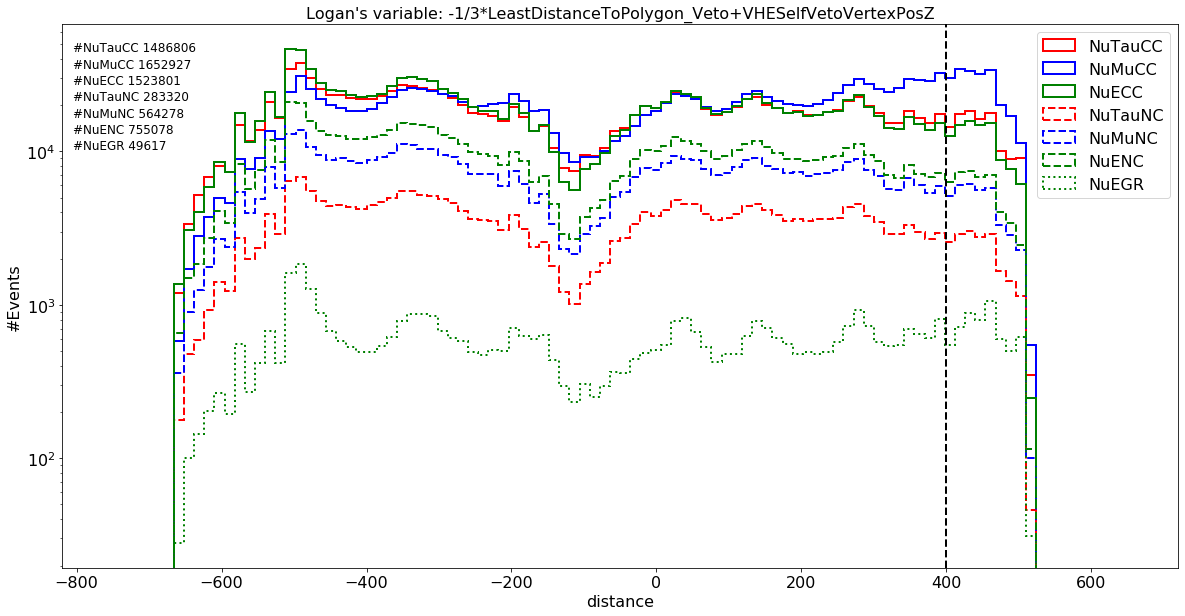

In [173]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Logan's variable: -1/3*LeastDistanceToPolygon_Veto+VHESelfVetoVertexPosZ", fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('distance', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(-1/3*data_tc['logan_veto']["LeastDistanceToPolygon_Veto"]+data_tc['logan_veto']["VHESelfVetoVertexPosZ"], bins =100, histtype = 'step',edgecolor ='r', lw = 2, range = [-750,650], label = "NuTauCC")  
ax.hist(-1/3*data_mc['logan_veto']["LeastDistanceToPolygon_Veto"]+data_mc['logan_veto']["VHESelfVetoVertexPosZ"], bins =100, histtype = 'step',edgecolor ='b', lw = 2, range = [-750,650], label = "NuMuCC")  
ax.hist(-1/3*data_ec['logan_veto']["LeastDistanceToPolygon_Veto"]+data_ec['logan_veto']["VHESelfVetoVertexPosZ"], bins =100, histtype = 'step',edgecolor ='g', lw = 2, range = [-750,650], label = "NuECC")  
ax.hist(-1/3*data_tn['logan_veto']["LeastDistanceToPolygon_Veto"]+data_tn['logan_veto']["VHESelfVetoVertexPosZ"], bins =100, histtype = 'step',edgecolor ='r', lw = 2, range = [-750,650], ls ="--", label = "NuTauNC")  
ax.hist(-1/3*data_mn['logan_veto']["LeastDistanceToPolygon_Veto"]+data_mn['logan_veto']["VHESelfVetoVertexPosZ"], bins =100, histtype = 'step',edgecolor ='b', lw = 2, range = [-750,650], ls ="--", label = "NuMuNC")  
ax.hist(-1/3*data_en['logan_veto']["LeastDistanceToPolygon_Veto"]+data_en['logan_veto']["VHESelfVetoVertexPosZ"], bins =100, histtype = 'step',edgecolor ='g', lw = 2, range = [-750,650], ls ="--", label = "NuENC")  
ax.hist(-1/3*data_eg['logan_veto']["LeastDistanceToPolygon_Veto"]+data_eg['logan_veto']["VHESelfVetoVertexPosZ"], bins =100, histtype = 'step',edgecolor ='g', lw = 2, range = [-750,650], ls =":", label = "NuEGR")  

ax.axvline(x=400,linewidth=2, ls ="--", color='k' )

plt.legend()
plt.show()

In [174]:
data_ec['logan_veto']["LeastDistanceToPolygon_Veto"][:,0].shape

(1523801,)

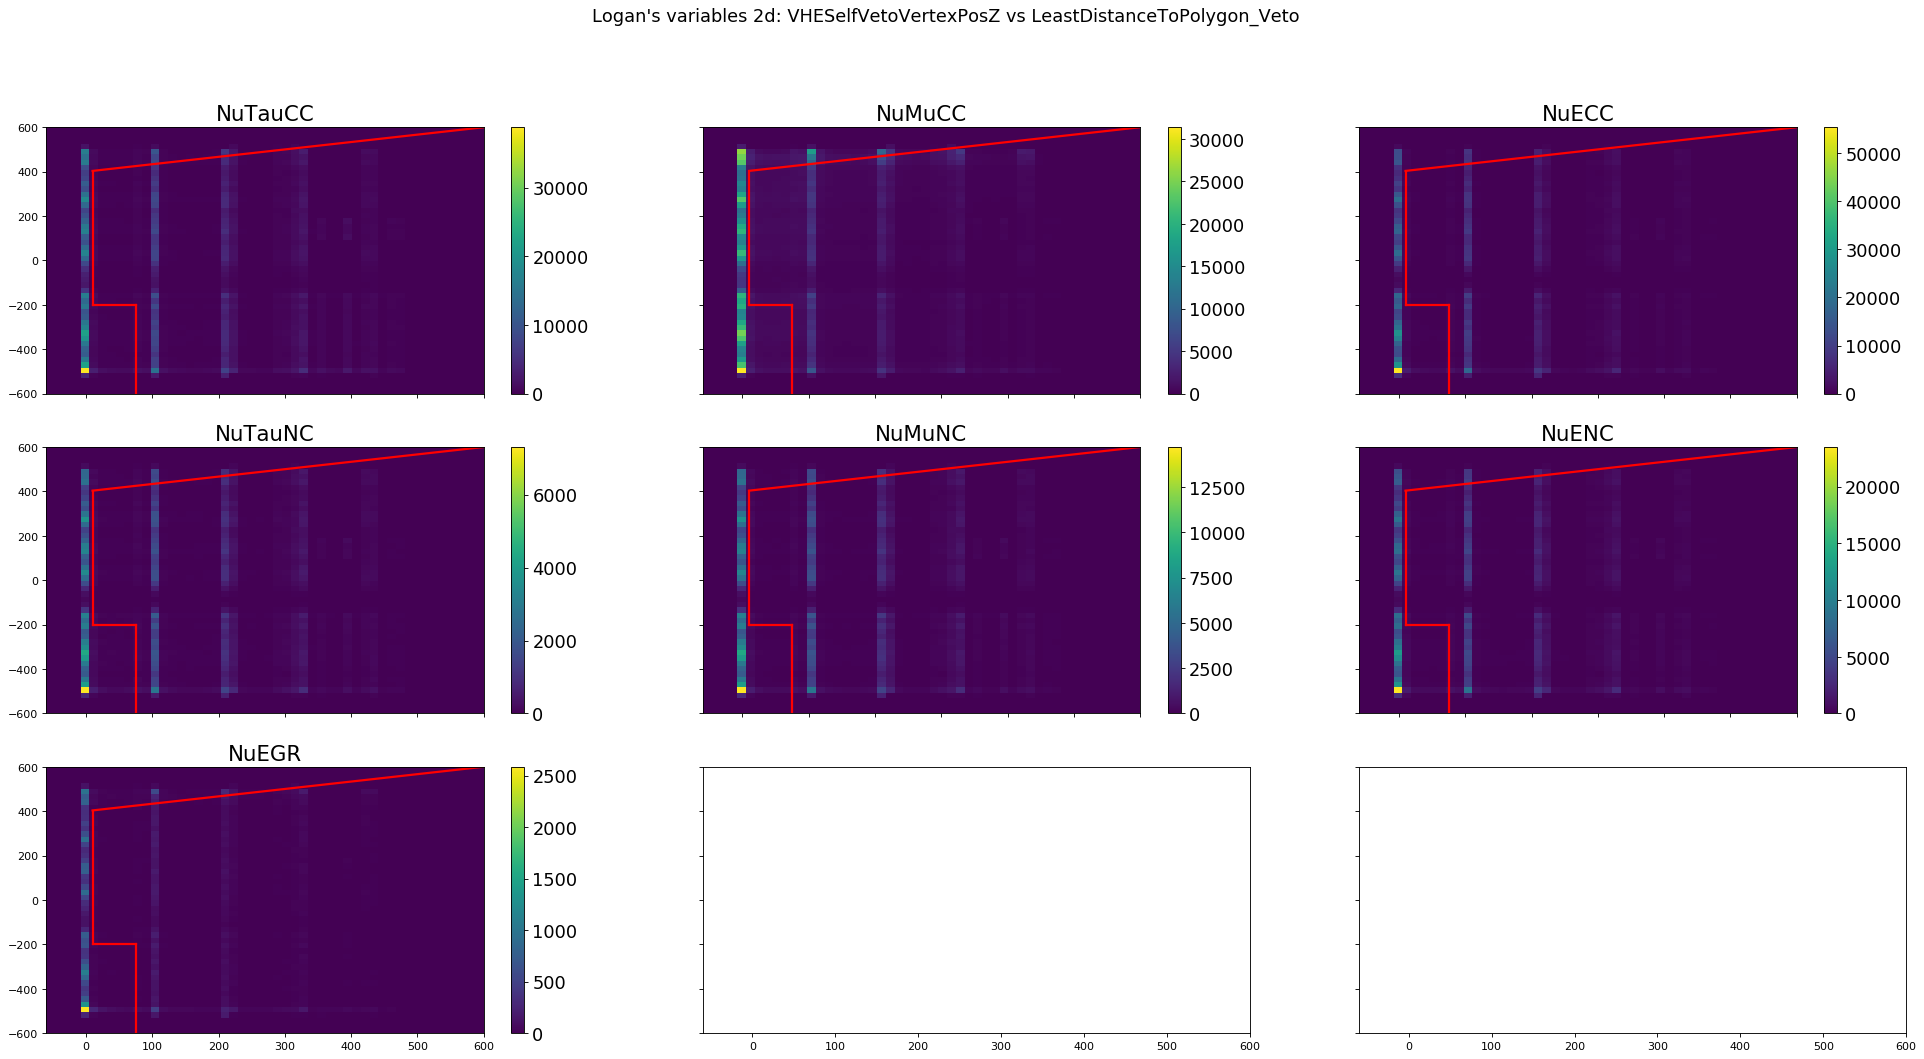

In [8]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

fig.suptitle("Logan's variables 2d: VHESelfVetoVertexPosZ vs LeastDistanceToPolygon_Veto", fontsize = 16)
x1 = np.linspace(-200, 400, 100)
x2 = np.linspace(-600, -200, 100)
x3 = np.linspace(10, 75, 100)
x4 = np.linspace(10, 600, 100)

ax1.set_title('NuTauCC')
h1 = ax1.hist2d(data_tc['logan_veto']["LeastDistanceToPolygon_Veto"][:,0], data_tc['logan_veto']["VHESelfVetoVertexPosZ"][:,0], bins =50, range = [[-60, 600], [-600, 600]])
ax1.plot(100*[10], x1, lw =2, c ='r')
ax1.plot(100*[75], x2, lw =2, c ='r')
ax1.plot(x3, 100*[-200], lw =2, c ='r')
ax1.plot(x4, 1/3*x4+400, lw =2, c ='r')
ax2.set_title('NuMuCC')
h2 = ax2.hist2d(data_mc['logan_veto']["LeastDistanceToPolygon_Veto"][:,0], data_mc['logan_veto']["VHESelfVetoVertexPosZ"][:,0], bins =50, range = [[-60, 600], [-600, 600]])  
ax2.plot(100*[10], x1, lw =2, c ='r')
ax2.plot(100*[75], x2, lw =2, c ='r')
ax2.plot(x3, 100*[-200], lw =2, c ='r')
ax2.plot(x4, 1/3*x4+400, lw =2, c ='r')
ax3.set_title('NuECC')
h3 = ax3.hist2d(data_ec['logan_veto']["LeastDistanceToPolygon_Veto"][:,0], data_ec['logan_veto']["VHESelfVetoVertexPosZ"][:,0], bins =50, range = [[-60, 600], [-600, 600]])  
ax3.plot(100*[10], x1, lw =2, c ='r')
ax3.plot(100*[75], x2, lw =2, c ='r')
ax3.plot(x3, 100*[-200], lw =2, c ='r')
ax3.plot(x4, 1/3*x4+400, lw =2, c ='r')
ax4.set_title('NuTauNC')
h4 = ax4.hist2d(data_tn['logan_veto']["LeastDistanceToPolygon_Veto"][:,0], data_tn['logan_veto']["VHESelfVetoVertexPosZ"][:,0], bins =50, range = [[-60, 600], [-600, 600]])
ax4.plot(100*[10], x1, lw =2, c ='r')
ax4.plot(100*[75], x2, lw =2, c ='r')
ax4.plot(x3, 100*[-200], lw =2, c ='r')
ax4.plot(x4, 1/3*x4+400, lw =2, c ='r')
ax5.set_title('NuMuNC')
h5 = ax5.hist2d(data_mn['logan_veto']["LeastDistanceToPolygon_Veto"][:,0], data_mn['logan_veto']["VHESelfVetoVertexPosZ"][:,0], bins =50, range = [[-60, 600], [-600, 600]])  
ax5.plot(100*[10], x1, lw =2, c ='r')
ax5.plot(100*[75], x2, lw =2, c ='r')
ax5.plot(x3, 100*[-200], lw =2, c ='r')
ax5.plot(x4, 1/3*x4+400, lw =2, c ='r')
ax6.set_title('NuENC')
h6 = ax6.hist2d(data_en['logan_veto']["LeastDistanceToPolygon_Veto"][:,0], data_en['logan_veto']["VHESelfVetoVertexPosZ"][:,0], bins =50, range = [[-60, 600], [-600, 600]])  
ax6.plot(100*[10], x1, lw =2, c ='r')
ax6.plot(100*[75], x2, lw =2, c ='r')
ax6.plot(x3, 100*[-200], lw =2, c ='r')
ax6.plot(x4, 1/3*x4+400, lw =2, c ='r')
ax7.set_title('NuEGR')
h7 = ax7.hist2d(data_eg['logan_veto']["LeastDistanceToPolygon_Veto"][:,0], data_eg['logan_veto']["VHESelfVetoVertexPosZ"][:,0], bins =50, range = [[-60, 600], [-600, 600]])  
ax7.plot(100*[10], x1, lw =2, c ='r')
ax7.plot(100*[75], x2, lw =2, c ='r')
ax7.plot(x3, 100*[-200], lw =2, c ='r')
ax7.plot(x4, 1/3*x4+400, lw =2, c ='r')
fig.colorbar(h1[3], ax=ax1)
fig.colorbar(h2[3], ax=ax2)
fig.colorbar(h3[3], ax=ax3)
fig.colorbar(h4[3], ax=ax4)
fig.colorbar(h5[3], ax=ax5)
fig.colorbar(h6[3], ax=ax6)
fig.colorbar(h7[3], ax=ax7)

plt.show()

WEIGHTS

In [16]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

d_weights_tc = data_tc['weight']['OneWeight']*d_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"]) # units of Hz per simulated events event
d_weights_mc = data_mc['weight']['OneWeight']*d_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_ec = data_ec['weight']['OneWeight']*d_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_tn = data_tn['weight']['OneWeight']*d_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"]) # units of Hz per simulated events event
d_weights_mn = data_mn['weight']['OneWeight']*d_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_en = data_en['weight']['OneWeight']*d_flux_en/(NFiles_cut*data_en['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_eg = data_eg['weight']['OneWeight']*d_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"]) # units of Hz per simulated events event

d_rate_tc = np.sum(d_weights_tc) # total rates in Hz
d_rate_mc = np.sum(d_weights_mc) # total rates in Hz
d_rate_ec = np.sum(d_weights_ec) # total rates in Hz
d_rate_tn = np.sum(d_weights_tn) # total rates in Hz
d_rate_mn = np.sum(d_weights_mn) # total rates in Hz
d_rate_en = np.sum(d_weights_en) # total rates in Hz
d_rate_eg = np.sum(d_weights_eg) # total rates in Hz


print("TauCC = {0:.3f}".format(d_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f}".format(d_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f}".format(d_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f}".format(d_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f}".format(d_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f}".format(d_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f}".format(d_rate_eg*livetime))#,w_rate_e*livetime)

print("Single = {0:.3f}".format((d_rate_ec+d_rate_eg+d_rate_en+d_rate_tn+d_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f}".format(d_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f}".format(d_rate_mc*livetime))#,w_rate_m*livetime)


TauCC = 70.997
MuCC =  62.497
ECC =   91.040
TauNC = 9.815
MuNC =  28.979
ENC =   28.427
EGR =   1.893
Single = 160.154
Double = 70.997
Track =  62.497


In [24]:
print(np.sum(d_weights_mc[lmask_mc])*livetime,np.sum(d_weights_mc)*livetime, np.sum(lmask_mc), data_mc.shape[0])
print(np.sum(d_weights_mc[mask_net_mc])*livetime,np.sum(d_weights_mc)*livetime, np.sum(mask_net_mc), data_mc.shape[0])
print(np.sum(d_weights_mc[mask3_mc])*livetime,np.sum(d_weights_mc)*livetime, np.sum(mask3_mc), data_mc.shape[0])

print((np.sum(d_weights_mc[lmask_mc])*livetime)/(np.sum(d_weights_mc)*livetime)*100, (np.sum(lmask_mc)/data_mc.shape[0])*100)
print((np.sum(d_weights_mc[mask_net_mc])*livetime)/(np.sum(d_weights_mc)*livetime)*100, (np.sum(mask_net_mc)/data_mc.shape[0])*100)
print((np.sum(d_weights_mc[mask3_mc])*livetime)/(np.sum(d_weights_mc)*livetime)*100, (np.sum(mask3_mc)/data_mc.shape[0])*100)

19.627813041451468 62.49701221927999 397640 1652927
1.0715731255479077 62.49701221927999 165315 1652927
0.12391901221055206 62.49701221927999 14508 1652927
31.406002214288886 24.056718778264255
1.7145989664084025 10.001349121891046
0.19827989820659572 0.8777157127931239


EFFICIENCY

In [5]:
preds_tc = np.load('/fastio2/dasha/double_pulse/preds_NuTauCC_400_Q2000_NO.npy')
preds_mc = np.load('/fastio2/dasha/double_pulse/preds_NuMuCC_400_Q2000_NO.npy')
preds_ec = np.load('/fastio2/dasha/double_pulse/preds_NuECC_400_Q2000_NO.npy')
preds_tn = np.load('/fastio2/dasha/double_pulse/preds_NuTauNC_400_Q2000_NO.npy')
preds_mn = np.load('/fastio2/dasha/double_pulse/preds_NuMuNC_400_Q2000_NO.npy')
preds_en = np.load('/fastio2/dasha/double_pulse/preds_NuENC_400_Q2000_NO.npy')
preds_eg = np.load('/fastio2/dasha/double_pulse/preds_NuEGR_400_Q2000_NO.npy')

print(preds_tc.shape, data_tc.shape)
print(preds_mc.shape, data_mc.shape)
print(preds_ec.shape, data_ec.shape)
print(preds_tn.shape, data_tn.shape)
print(preds_mn.shape, data_mn.shape)
print(preds_en.shape, data_en.shape)
print(preds_eg.shape, data_eg.shape)

(1486806, 2) (1486806, 1)
(1652927, 2) (1652927, 1)
(1523801, 2) (1523801, 1)
(283320, 2) (283320, 1)
(564278, 2) (564278, 1)
(755078, 2) (755078, 1)
(49617, 2) (49617, 1)


In [6]:
lmask_tc = (data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"])>-0.5
lmask_mc = (data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"])>-0.5
lmask_ec = (data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"])>-0.5
lmask_tn = (data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"])>-0.5
lmask_mn = (data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"])>-0.5
lmask_en = (data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"])>-0.5
lmask_eg = (data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"])>-0.5

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [183]:
print(preds_tc.shape, lmask_tc.shape)
print(preds_mc.shape, lmask_mc.shape)
print(preds_ec.shape, lmask_ec.shape)
print(preds_tn.shape, lmask_tn.shape)
print(preds_mn.shape, lmask_mn.shape)
print(preds_en.shape, lmask_en.shape)
print(preds_eg.shape, lmask_eg.shape)

(1486806, 2) (1486806, 1)
(1652927, 2) (1652927, 1)
(1523801, 2) (1523801, 1)
(283320, 2) (283320, 1)
(564278, 2) (564278, 1)
(755078, 2) (755078, 1)
(49617, 2) (49617, 1)


In [184]:
preds_ec[:,1].reshape(preds_ec.shape[0],1)[lmask_ec]

array([0.9006366 , 0.6222428 , 0.77604204, ..., 0.7297285 , 0.86273587,
       0.5354663 ], dtype=float32)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


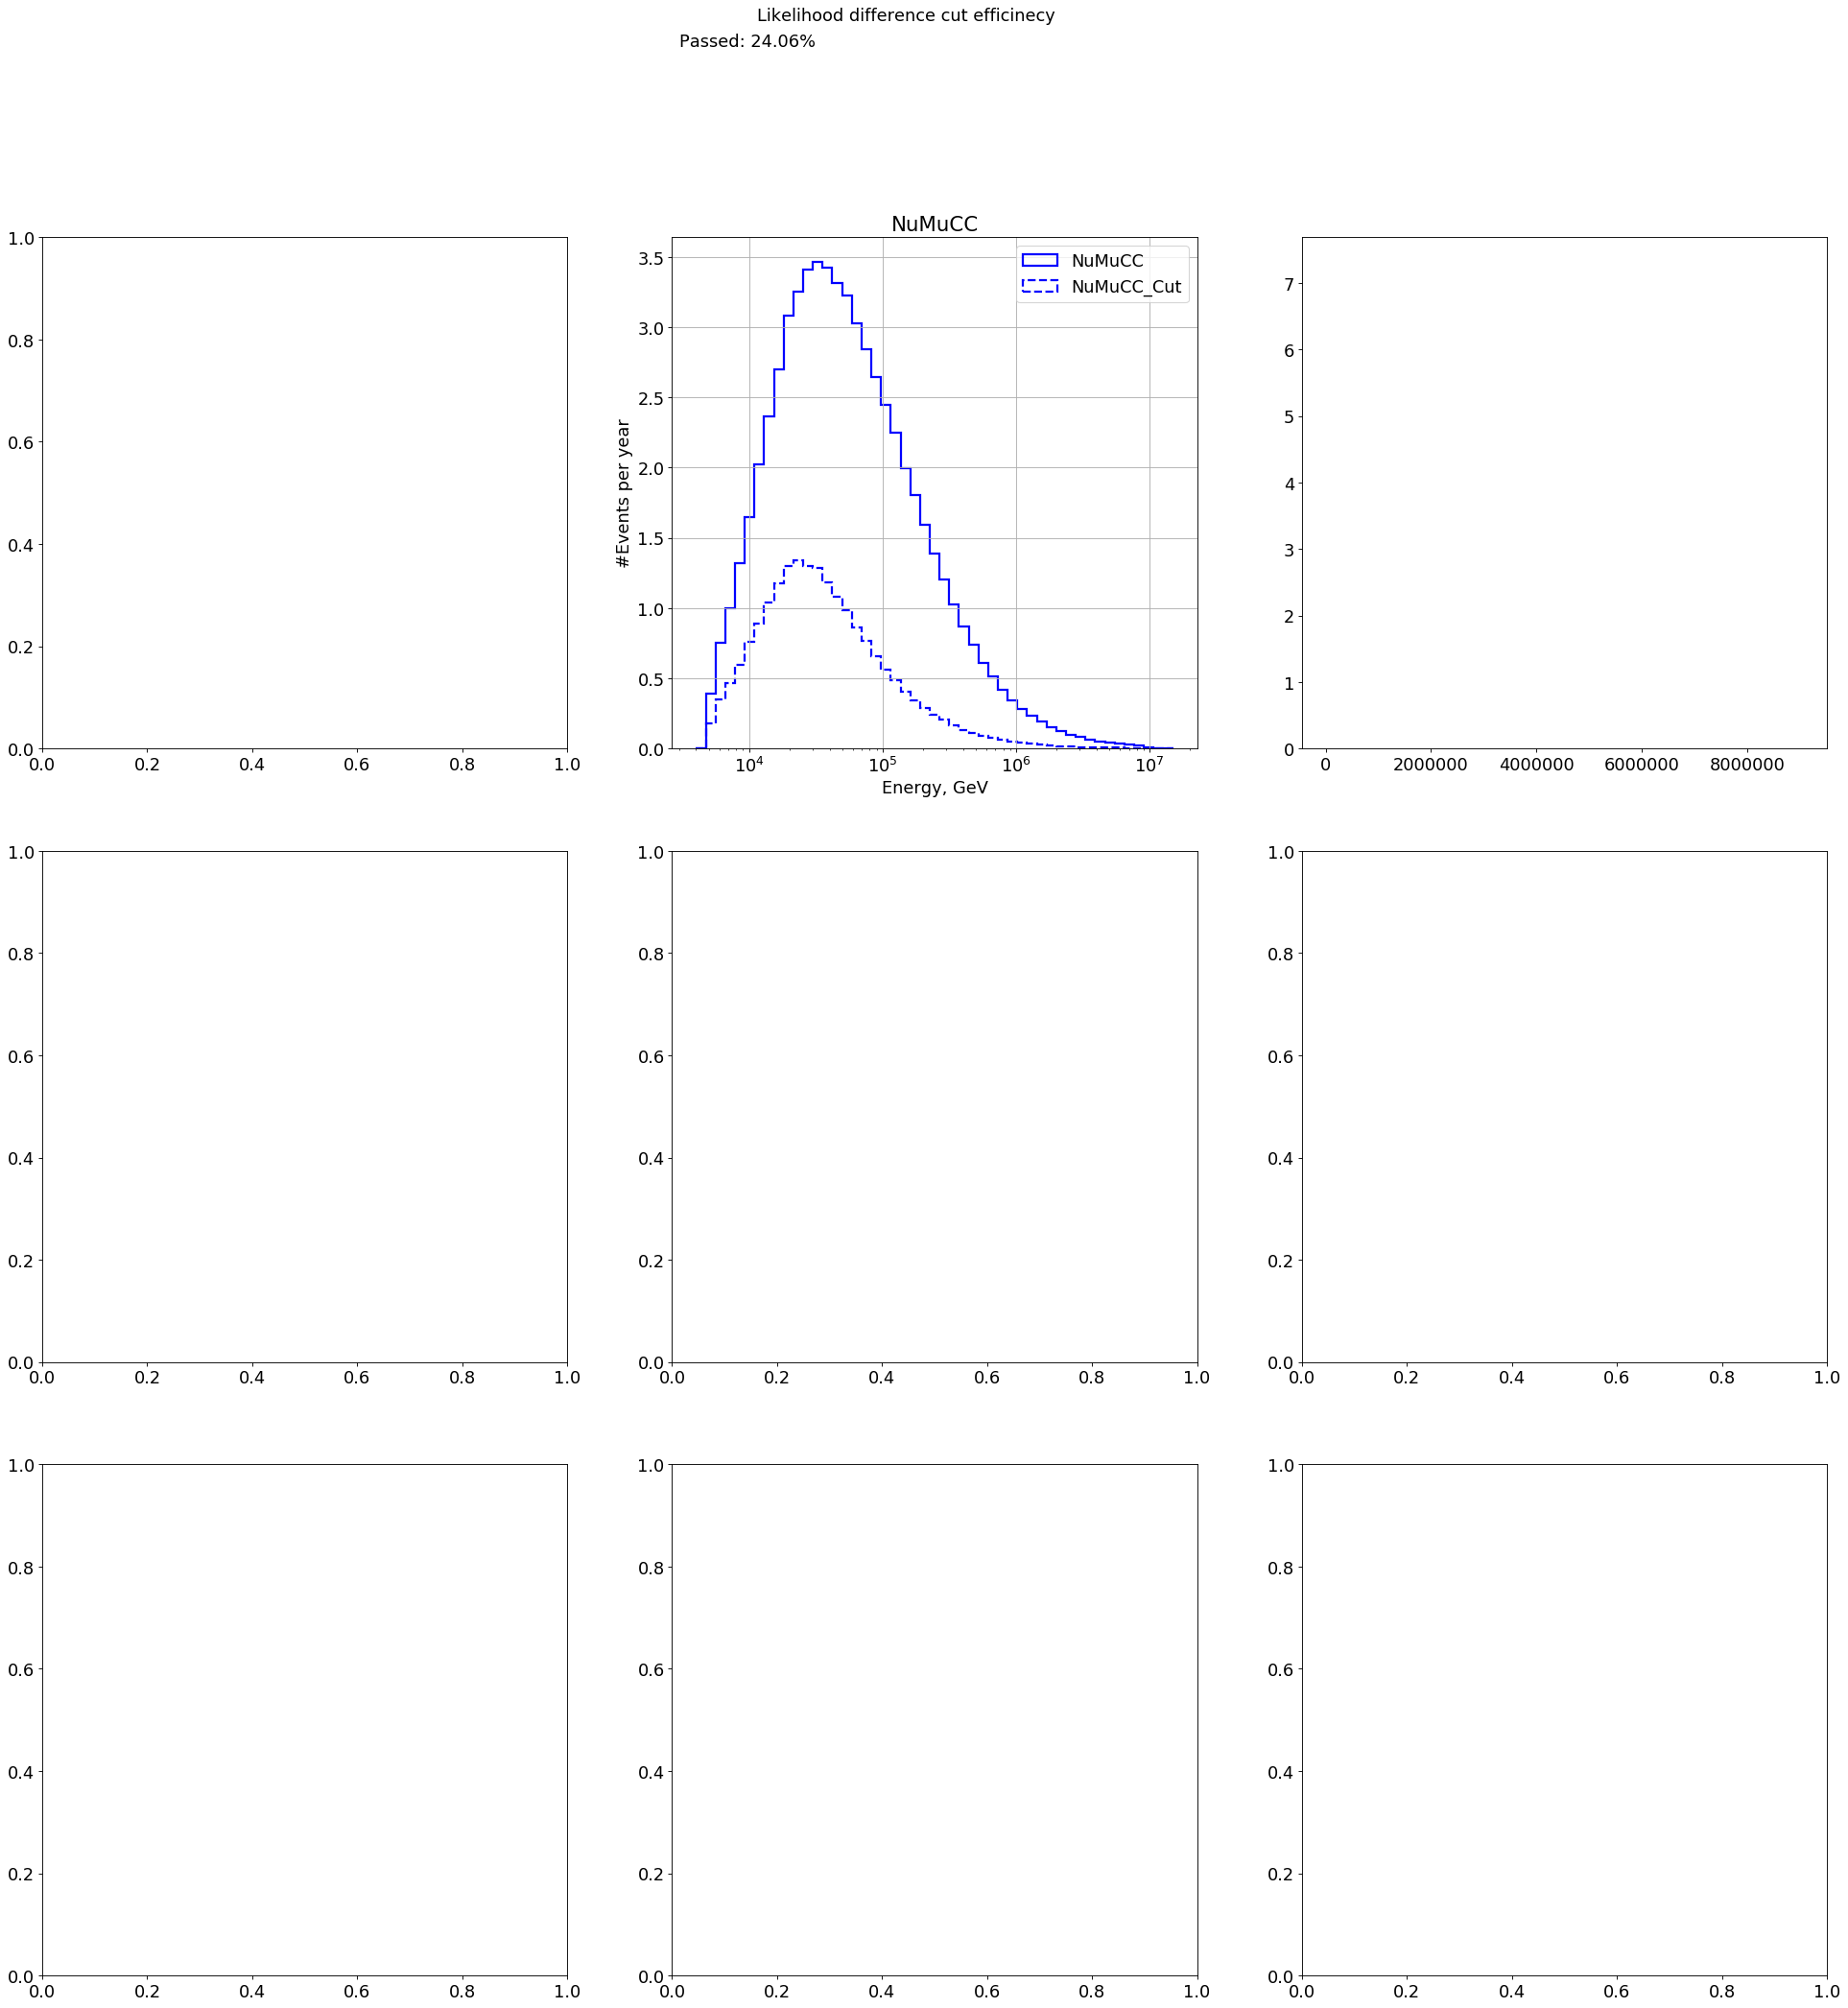

In [25]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Likelihood difference cut efficinecy", fontsize = 16)

# ax1.set_title('NuTauCC')
# ax1.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
# ax1.set_yscale('log')
# ax1.set_xscale('log')
# ax1.set_ylim([0.0001, 10])
# ax1.set_xlabel('Energy, GeV', fontsize = 16)                                                              
# ax1.set_ylabel("#Events per year", fontsize = 16)                                                   
# ax1.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
# ax1.hist(data_tc[lmask_tc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc[lmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
# ax1.legend()
# ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
#ax2.set_yscale('log')
ax2.set_xscale('log')
#ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)                                                   
h1 = ax2.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
h2 = ax2.hist(data_mc[lmask_mc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc[lmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.bar(bins[:-1],     # this is what makes it comparable
        h1[0] / h2[0], # maybe check for div-by-zero!
        alpha=0.4)
# ax3.set_title('NuECC')
# ax3.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
# ax3.set_yscale('log')
# ax3.set_xscale('log')
# ax3.set_ylim([0.0001, 10])
# ax3.set_xlabel('Energy, GeV', fontsize = 16)                                                              
# ax3.set_ylabel("#Events per year", fontsize = 16)                                                   
# ax3.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
# ax3.hist(data_ec[lmask_ec]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec[lmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
# ax3.legend()
# ax3.grid(True)

# ax4.set_title('NuTauNC')
# ax4.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
# ax4.set_yscale('log')
# ax4.set_xscale('log')
# ax4.set_ylim([0.0001, 10])
# ax4.set_xlabel('Energy, GeV', fontsize = 16)                                                              
# ax4.set_ylabel("#Events per year", fontsize = 16)                                                   
# ax4.hist(data_tn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
# ax4.hist(data_tn[lmask_tn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn[lmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
# ax4.legend()
# ax4.grid(True)

# ax5.set_title('NuMuNC')
# ax5.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
# ax5.set_yscale('log')
# ax5.set_xscale('log')
# ax5.set_ylim([0.0001, 10])
# ax5.set_xlabel('Energy, GeV', fontsize = 16)                                                              
# ax5.set_ylabel("#Events per year", fontsize = 16)                                                   
# ax5.hist(data_mn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
# ax5.hist(data_mn[lmask_mn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn[lmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
# ax5.grid(True)
# ax5.legend()

# ax6.set_title('NuENC')
# ax6.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
# ax6.set_yscale('log')
# ax6.set_xscale('log')
# ax6.set_ylim([0.0001, 10])
# ax6.set_xlabel('Energy, GeV', fontsize = 16)                                                              
# ax6.set_ylabel("#Events per year", fontsize = 16)                                                   
# ax6.hist(data_en['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
# ax6.hist(data_en[lmask_en]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en[lmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
# ax6.legend()
# ax6.grid(True)

# ax7.set_title('NuEGR')
# ax7.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
# ax7.set_yscale('log')
# ax7.set_xscale('log')
# ax7.set_ylim([0.0001, 10])
# ax7.set_xlabel('Energy, GeV', fontsize = 16)                                                              
# ax7.set_ylabel("#Events per year", fontsize = 16)                                                   
# ax7.hist(data_eg['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
# ax7.hist(data_eg[lmask_eg]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg[lmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
# ax7.legend()
# ax7.grid(True)

plt.show()

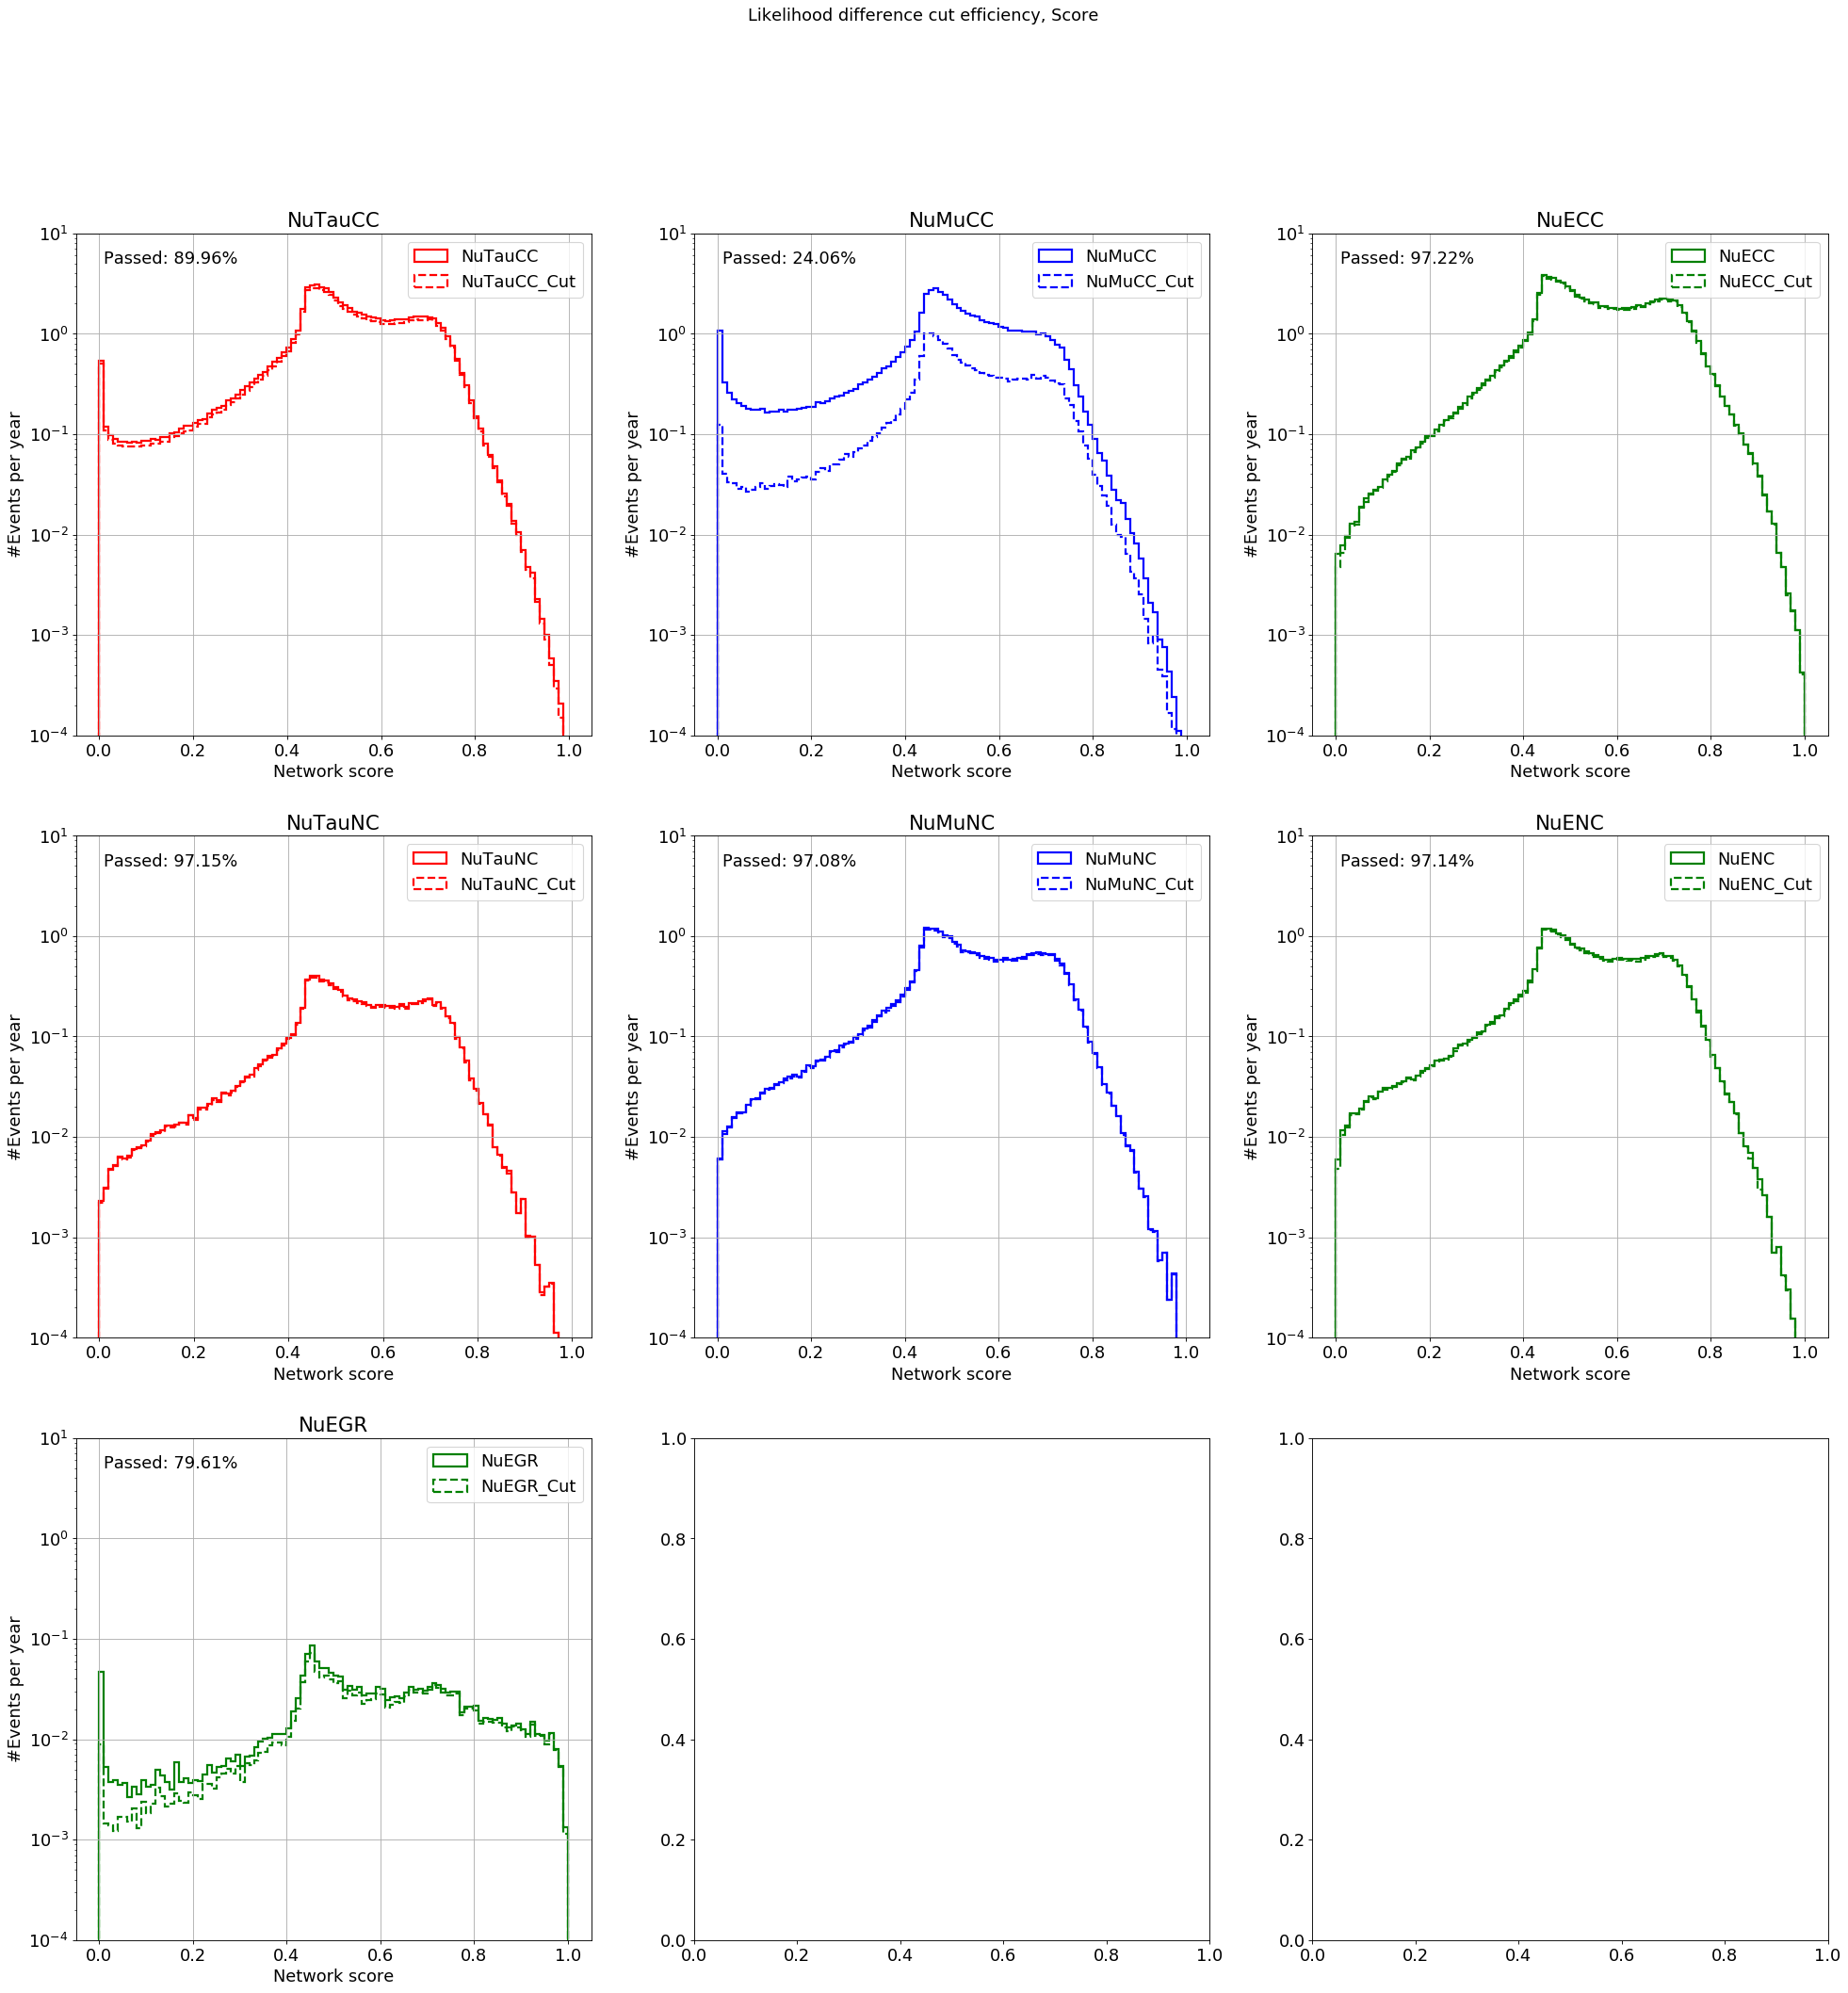

In [208]:
bins=100
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Likelihood difference cut efficiency, Score", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(lmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Network score', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)   
ax1.hist(preds_tc[:,1], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[lmask_tc], weights = d_weights_tc[lmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(lmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Network score', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)   
ax2.hist(preds_mc[:,1], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[lmask_mc], weights = d_weights_mc[lmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(lmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Network score', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)   
ax3.hist(preds_ec[:,1], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[lmask_ec], weights = d_weights_ec[lmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(lmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Network score', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)   
ax4.hist(preds_tn[:,1], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(preds_tn[:,1].reshape(preds_tn.shape[0],1)[lmask_tn], weights = d_weights_tn[lmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(lmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Network score', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)   
ax5.hist(preds_mn[:,1], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(preds_mn[:,1].reshape(preds_mn.shape[0],1)[lmask_mn], weights = d_weights_mn[lmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.legend()
ax5.grid(True)

ax6.set_title('NuENC')
ax6.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(lmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Network score', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)   
ax6.hist(preds_en[:,1], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(preds_en[:,1].reshape(preds_en.shape[0],1)[lmask_en], weights = d_weights_en[lmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(lmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Network score', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)   
ax7.hist(preds_eg[:,1], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(preds_eg[:,1].reshape(preds_eg.shape[0],1)[lmask_eg], weights = d_weights_eg[lmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

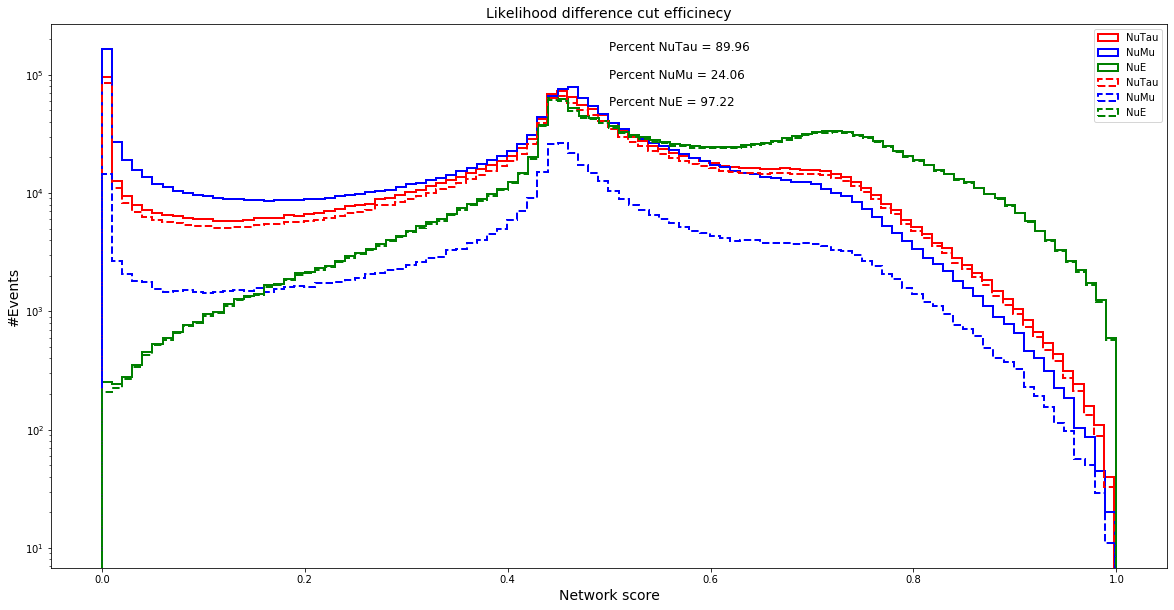

In [32]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_title("Likelihood difference cut efficinecy", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(lmask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(lmask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(lmask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Network score', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(preds_tc[:,1], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(preds_mc[:,1], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(preds_ec[:,1], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[lmask_tc], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[lmask_mc], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[lmask_ec], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

In [20]:
dmask_ec = (data_ec['logan_veto']["SPE_rlogl_noDC"]-data_ec['logan_veto']["Cascade_rlogl_noDC"])>-0.15
dmask_mc = (data_mc['logan_veto']["SPE_rlogl_noDC"]-data_mc['logan_veto']["Cascade_rlogl_noDC"])>-0.15
dmask_tc = (data_tc['logan_veto']["SPE_rlogl_noDC"]-data_tc['logan_veto']["Cascade_rlogl_noDC"])>-0.15
dmask_en = (data_en['logan_veto']["SPE_rlogl_noDC"]-data_en['logan_veto']["Cascade_rlogl_noDC"])>-0.15
dmask_mn = (data_mn['logan_veto']["SPE_rlogl_noDC"]-data_mn['logan_veto']["Cascade_rlogl_noDC"])>-0.15
dmask_tn = (data_tn['logan_veto']["SPE_rlogl_noDC"]-data_tn['logan_veto']["Cascade_rlogl_noDC"])>-0.15
dmask_eg = (data_eg['logan_veto']["SPE_rlogl_noDC"]-data_eg['logan_veto']["Cascade_rlogl_noDC"])>-0.15

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


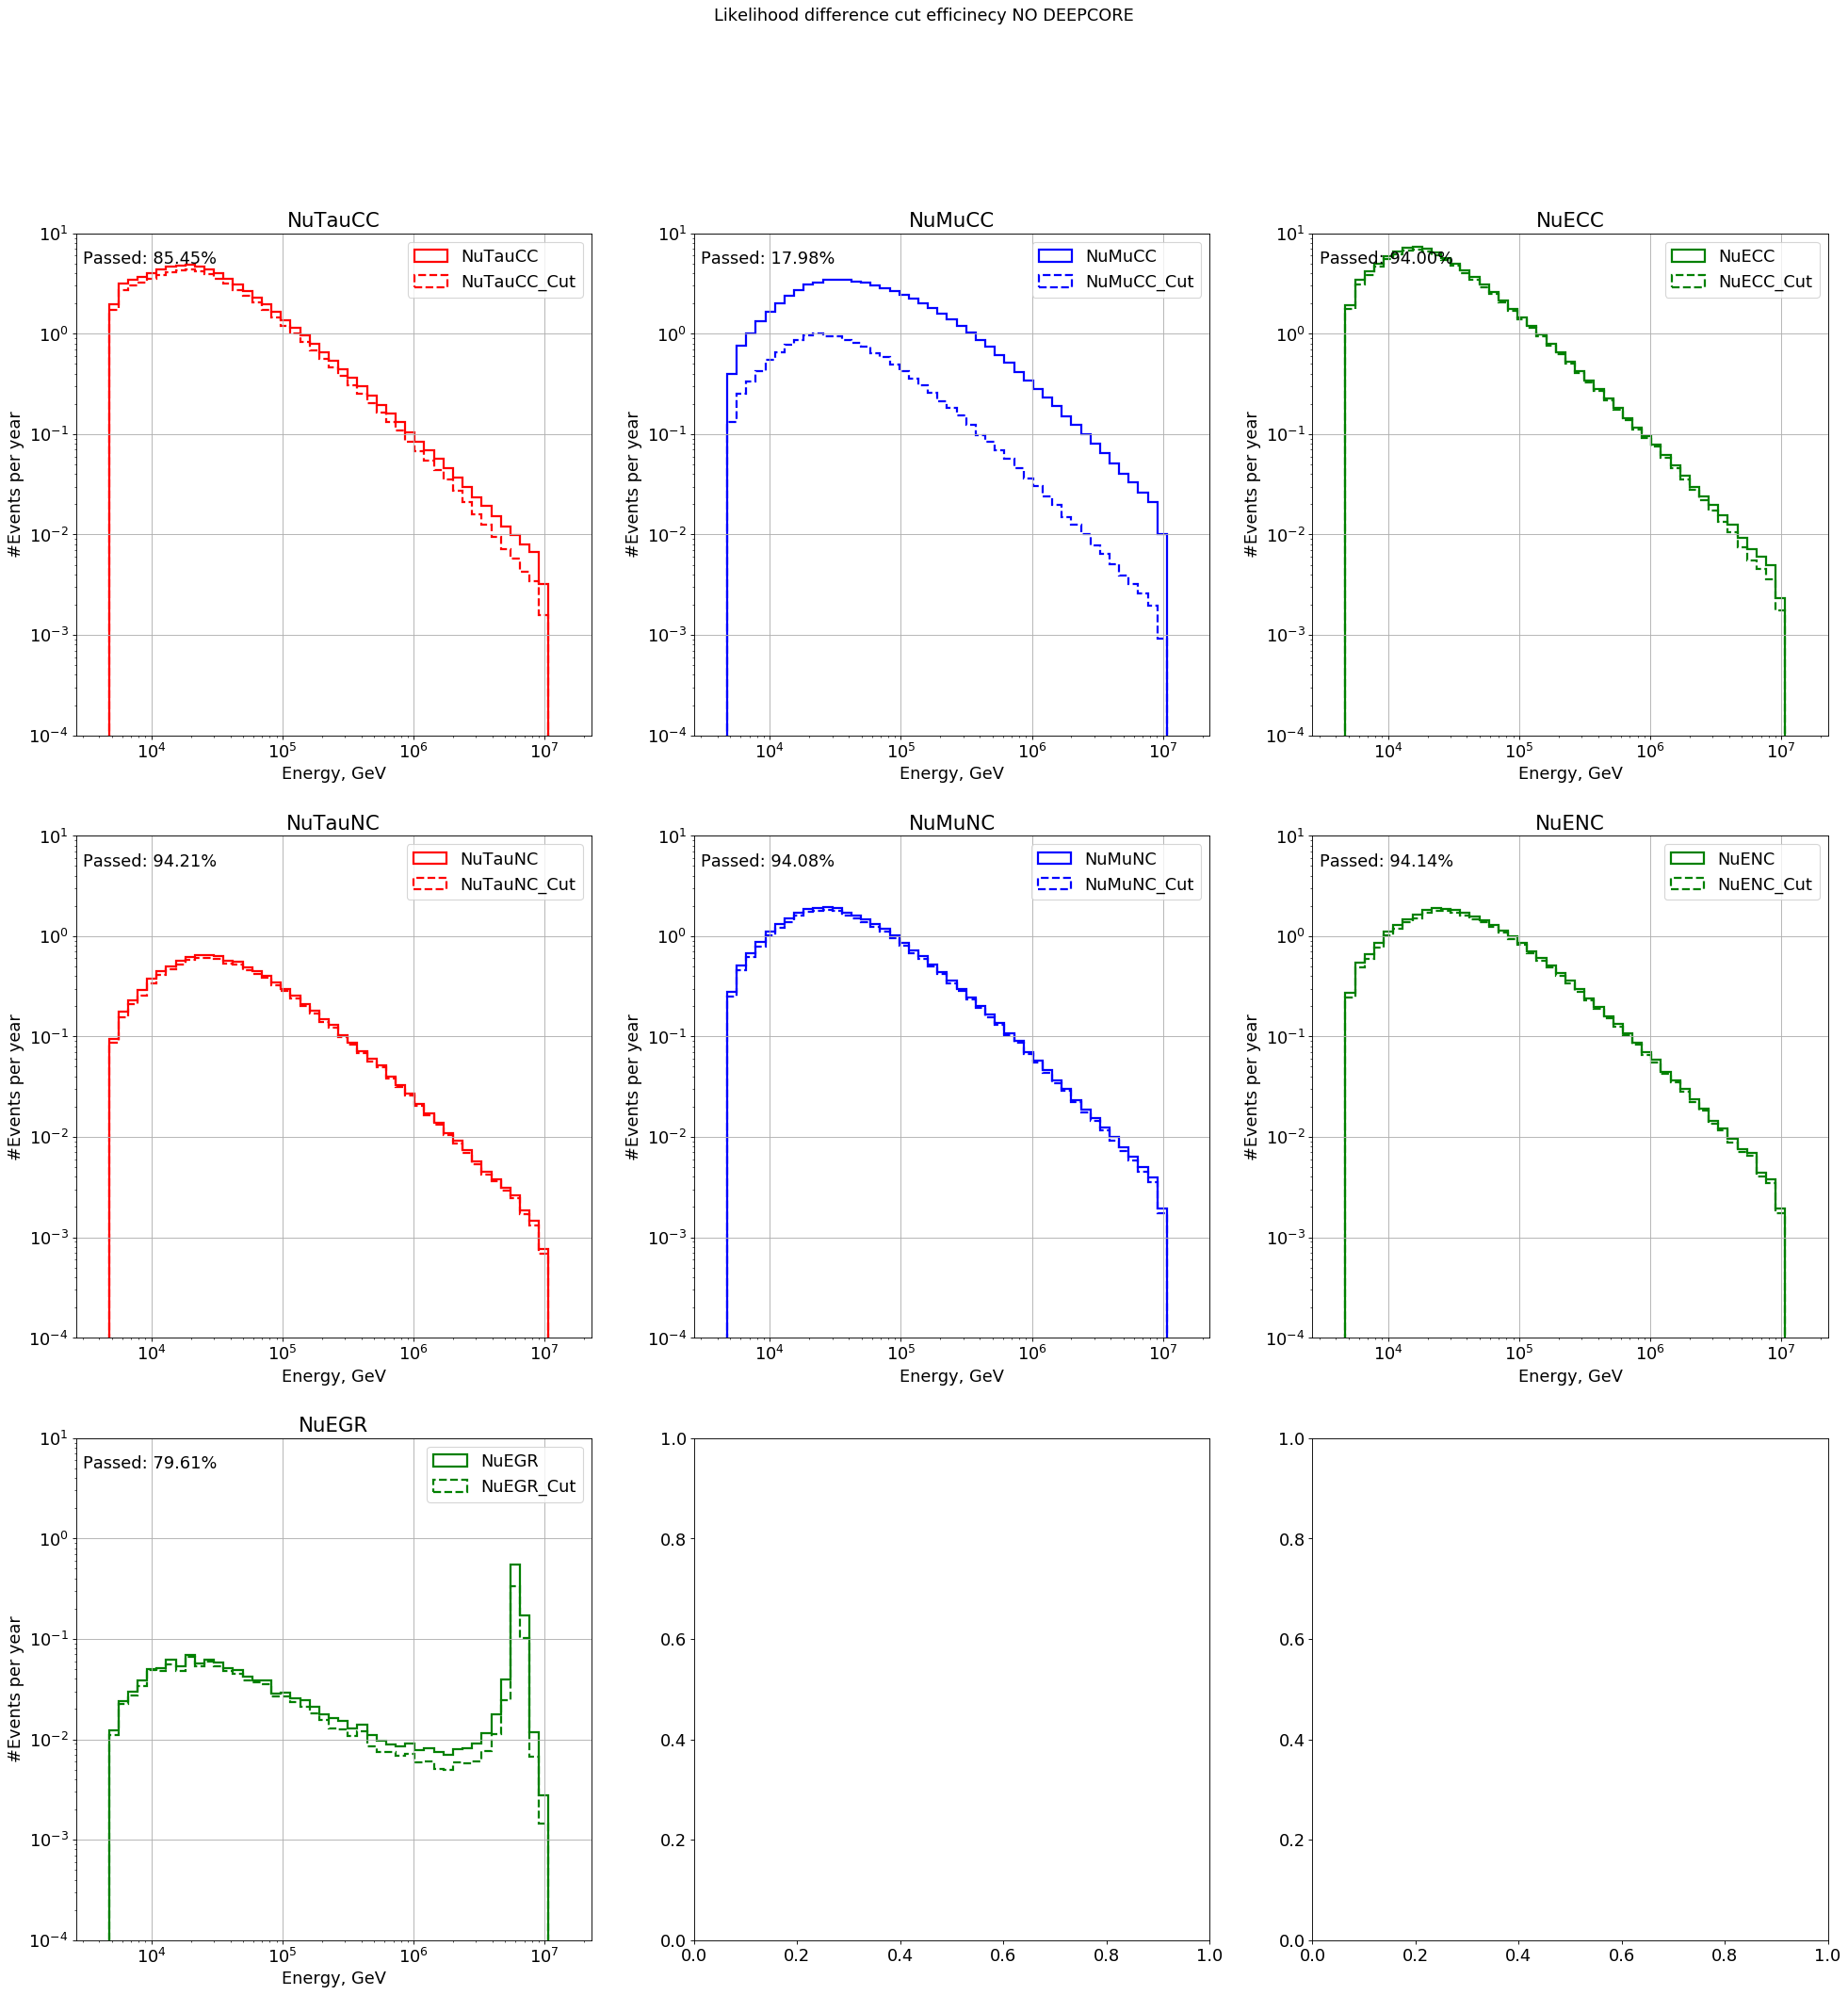

In [213]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Likelihood difference cut efficinecy NO DEEPCORE", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(dmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)                                                   
ax1.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(data_tc[dmask_tc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc[dmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(dmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)                                                   
ax2.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(data_mc[dmask_mc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc[dmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(dmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)                                                   
ax3.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(data_ec[dmask_ec]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec[dmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(dmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)                                                   
ax4.hist(data_tn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(data_tn[dmask_tn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn[dmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(dmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)                                                   
ax5.hist(data_mn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(data_mn[dmask_mn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn[dmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.grid(True)
ax5.legend()

ax6.set_title('NuENC')
ax6.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(dmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)                                                   
ax6.hist(data_en['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(data_en[dmask_en]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en[dmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(lmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)                                                   
ax7.hist(data_eg['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(data_eg[dmask_eg]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg[dmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

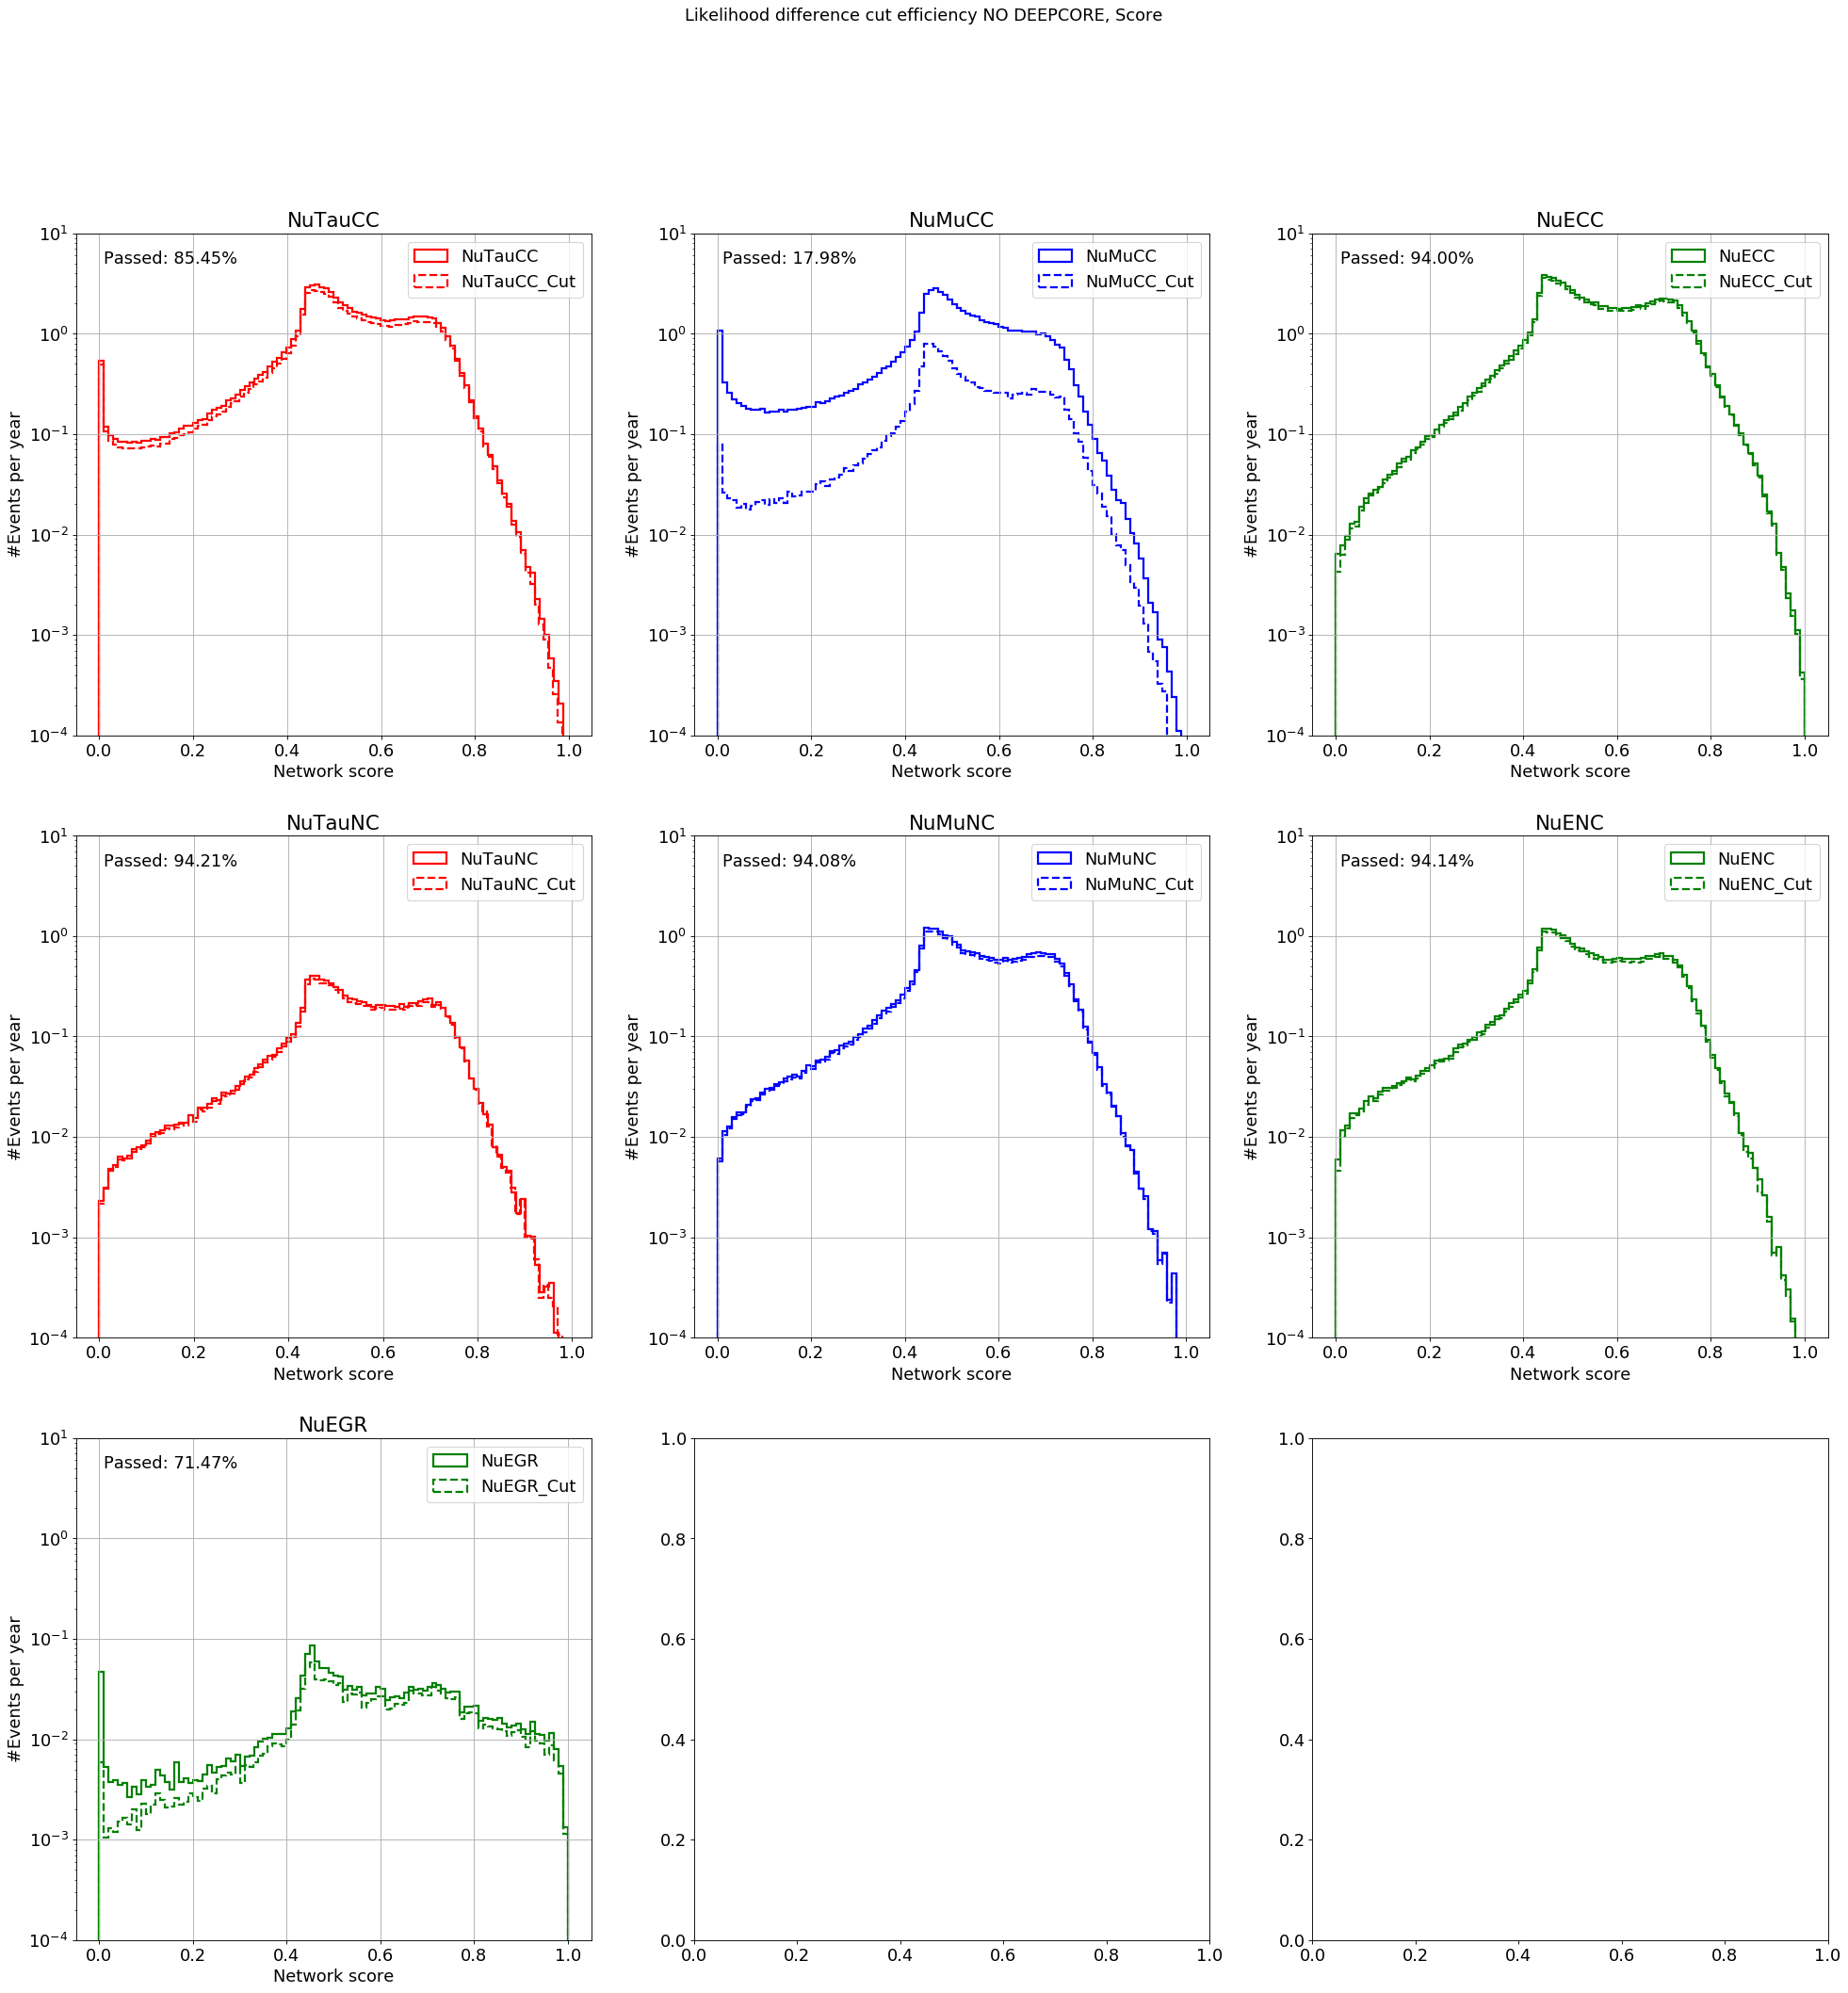

In [214]:
bins=100
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Likelihood difference cut efficiency NO DEEPCORE, Score", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(dmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Network score', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)   
ax1.hist(preds_tc[:,1], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[dmask_tc], weights = d_weights_tc[dmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(dmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Network score', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)   
ax2.hist(preds_mc[:,1], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[dmask_mc], weights = d_weights_mc[dmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(dmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Network score', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)   
ax3.hist(preds_ec[:,1], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[dmask_ec], weights = d_weights_ec[dmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(dmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Network score', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)   
ax4.hist(preds_tn[:,1], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(preds_tn[:,1].reshape(preds_tn.shape[0],1)[dmask_tn], weights = d_weights_tn[dmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(dmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Network score', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)   
ax5.hist(preds_mn[:,1], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(preds_mn[:,1].reshape(preds_mn.shape[0],1)[dmask_mn], weights = d_weights_mn[dmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.legend()
ax5.grid(True)

ax6.set_title('NuENC')
ax6.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(dmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Network score', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)   
ax6.hist(preds_en[:,1], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(preds_en[:,1].reshape(preds_en.shape[0],1)[dmask_en], weights = d_weights_en[dmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(dmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Network score', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)   
ax7.hist(preds_eg[:,1], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(preds_eg[:,1].reshape(preds_eg.shape[0],1)[dmask_eg], weights = d_weights_eg[dmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

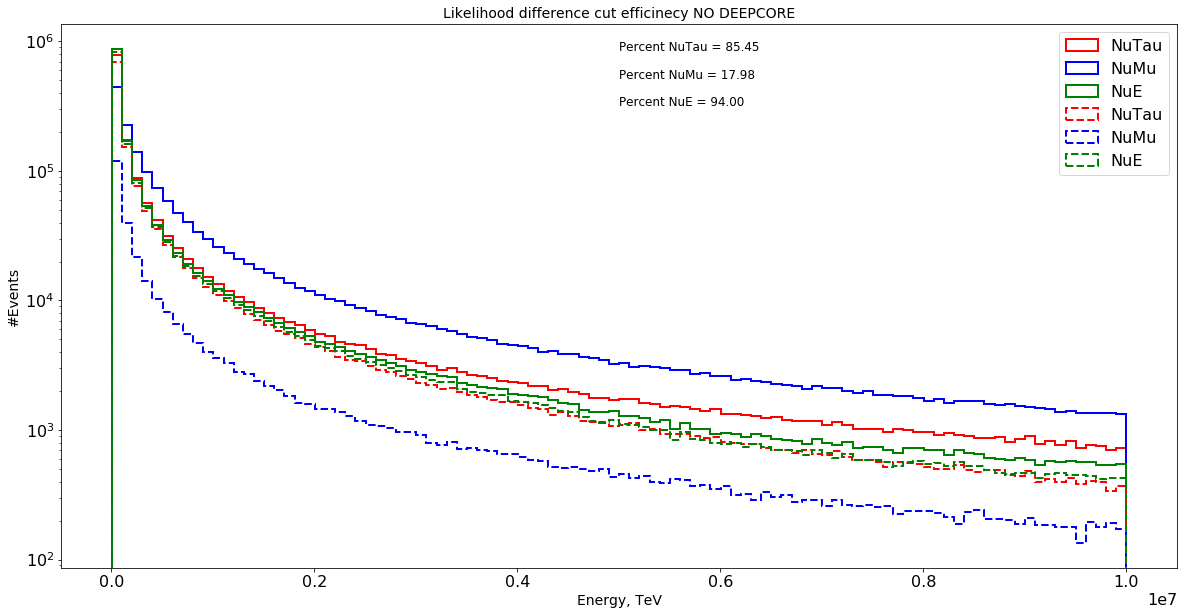

In [215]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Likelihood difference cut efficinecy NO DEEPCORE", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(dlmask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(dlmask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(dlmask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(data_tc[dlmask_tc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(data_mc[dlmask_mc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(data_ec[dlmask_ec]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

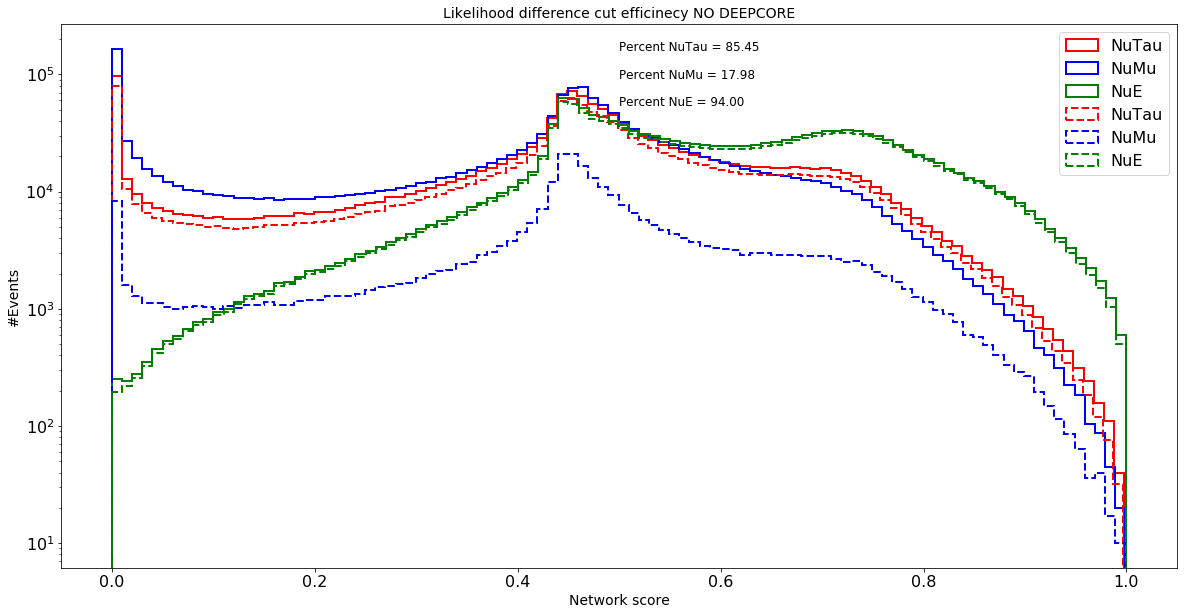

In [216]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_title("Likelihood difference cut efficinecy NO DEEPCORE", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(dlmask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(dlmask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(dlmask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Network score', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(preds_tc[:,1], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(preds_mc[:,1], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(preds_ec[:,1], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[dlmask_tc], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[dlmask_mc], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[dlmask_ec], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

In [13]:
zmask_ec = data_ec['logan_veto']["FirstHitZ"]<475
zmask_mc = data_mc['logan_veto']["FirstHitZ"]<475
zmask_tc = data_tc['logan_veto']["FirstHitZ"]<475
zmask_en = data_en['logan_veto']["FirstHitZ"]<475
zmask_mn = data_mn['logan_veto']["FirstHitZ"]<475
zmask_tn = data_tn['logan_veto']["FirstHitZ"]<475
zmask_eg = data_eg['logan_veto']["FirstHitZ"]<475

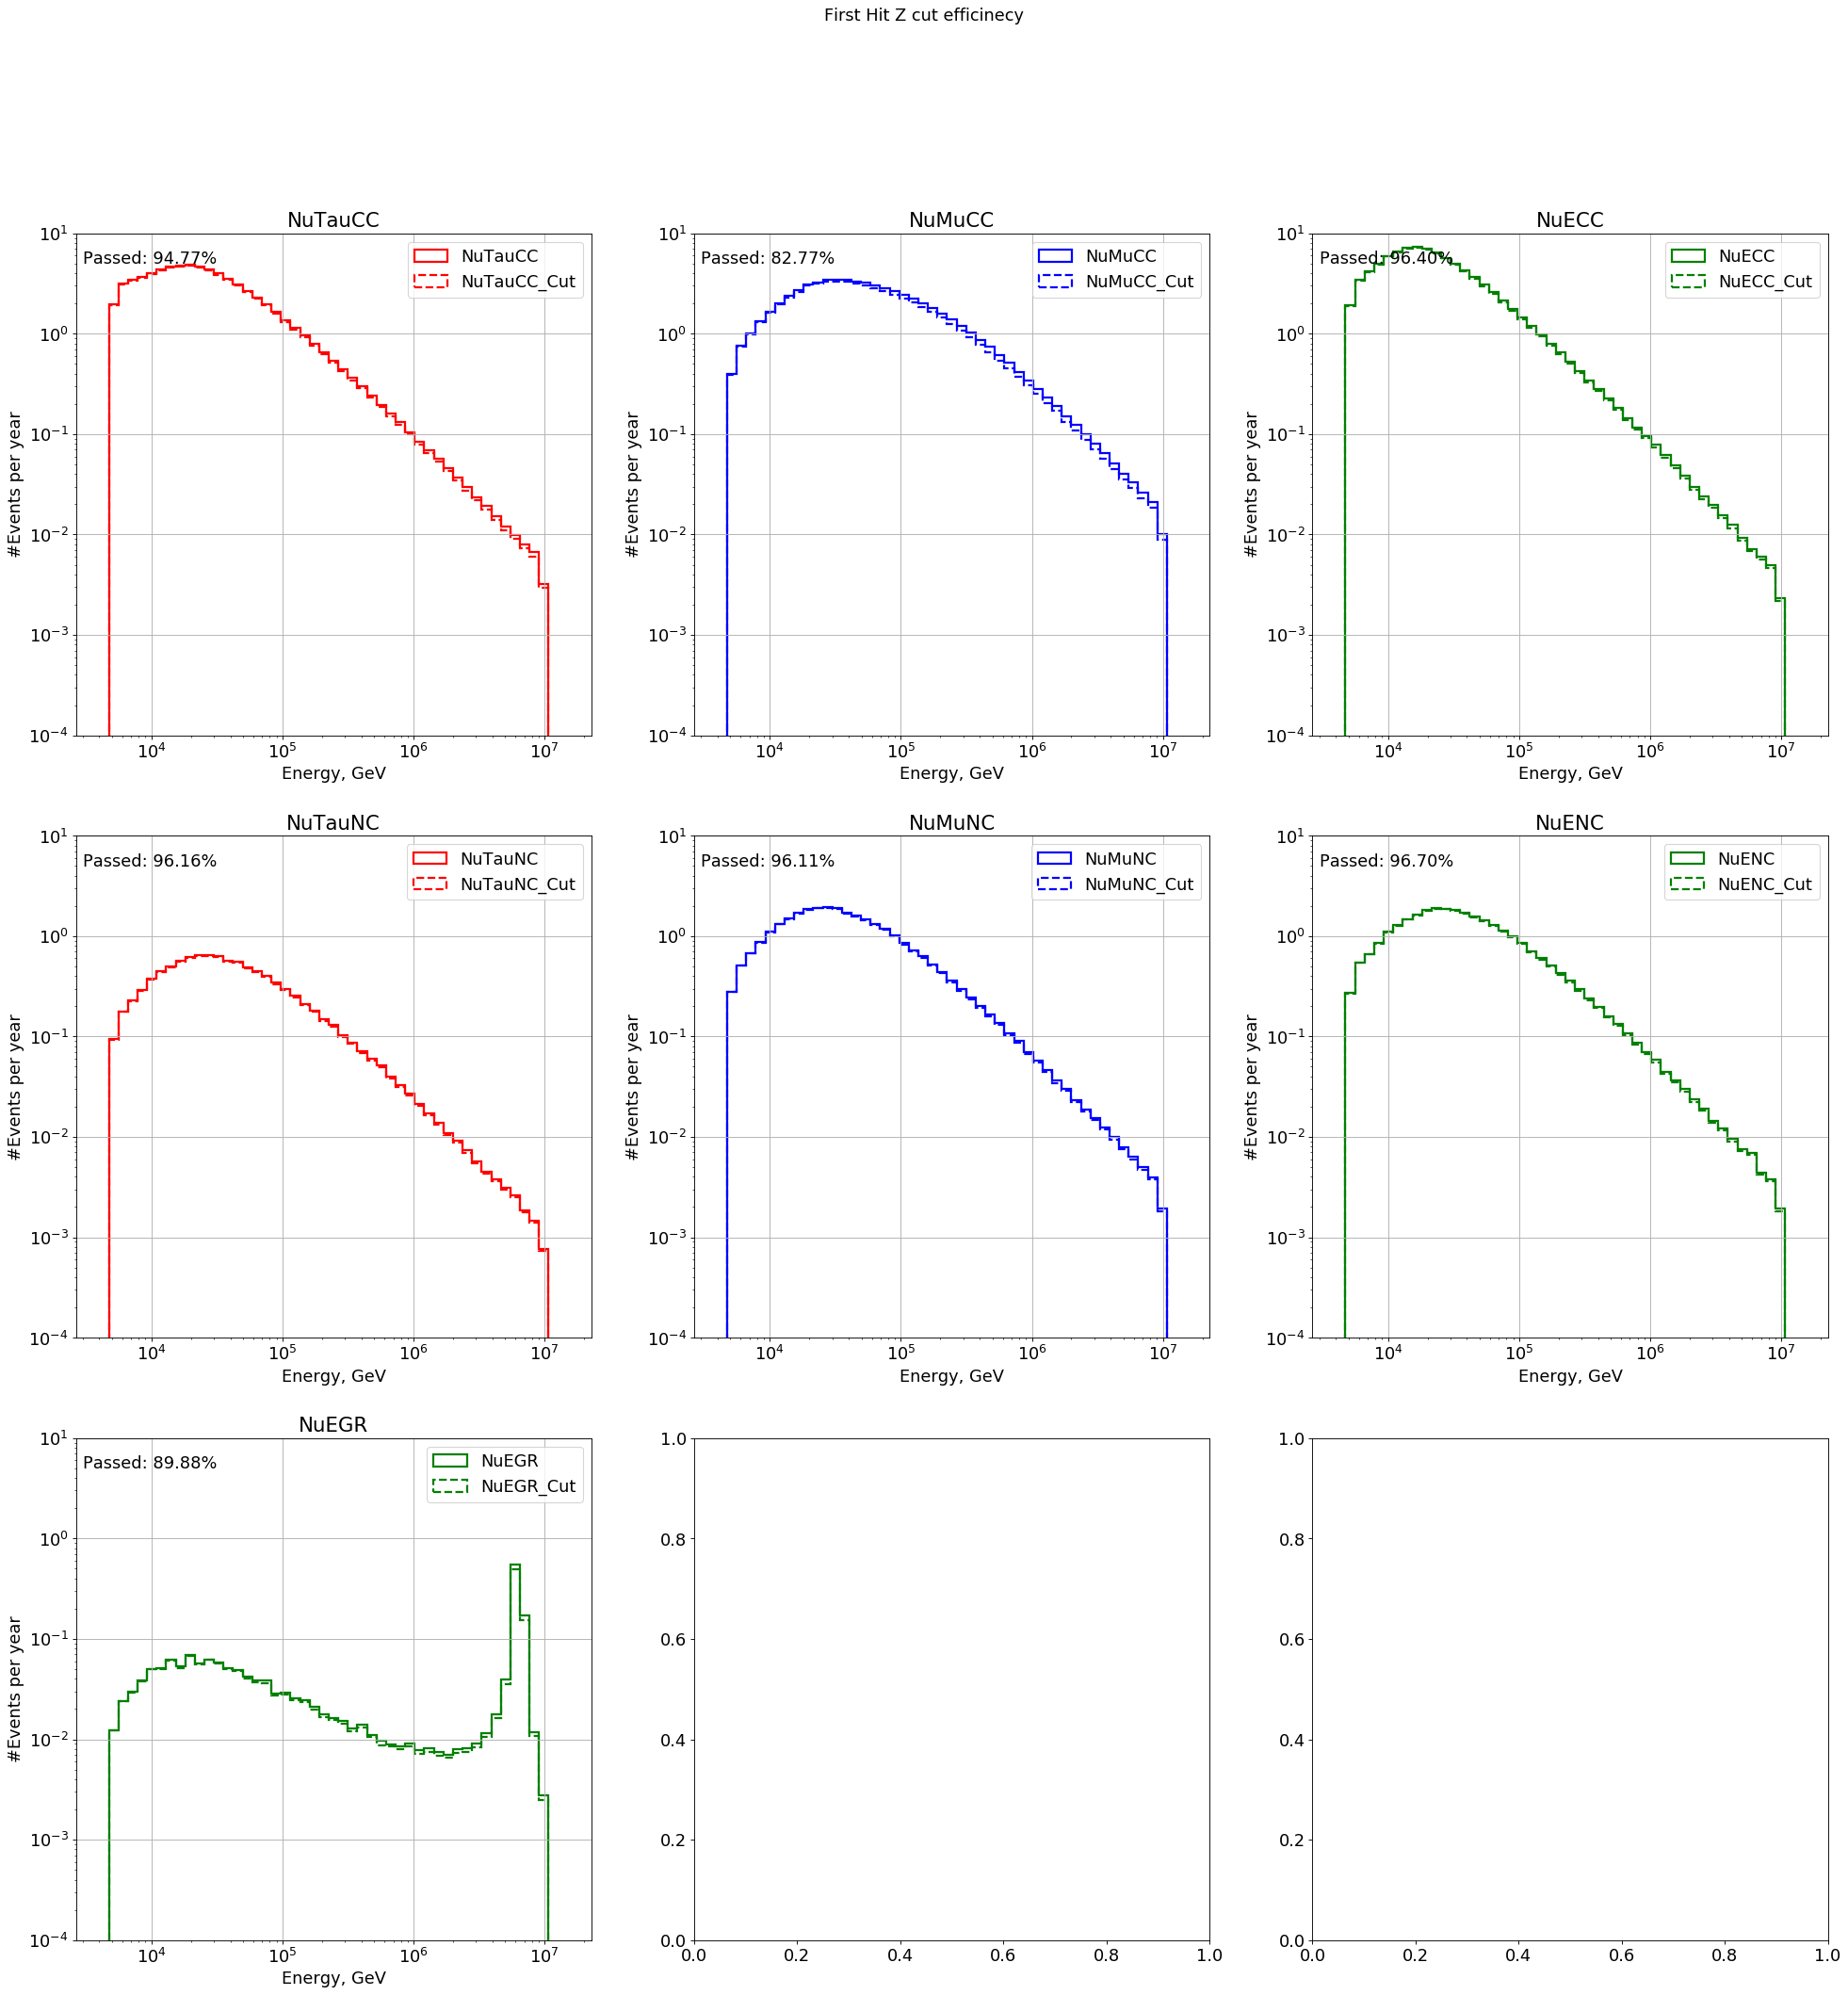

In [218]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("First Hit Z cut efficinecy", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(zmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)                                                   
ax1.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(data_tc[zmask_tc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc[zmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(zmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)                                                   
ax2.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(data_mc[zmask_mc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc[zmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(zmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)                                                   
ax3.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(data_ec[zmask_ec]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec[zmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(zmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)                                                   
ax4.hist(data_tn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(data_tn[zmask_tn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn[zmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(zmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)                                                   
ax5.hist(data_mn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(data_mn[zmask_mn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn[zmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.grid(True)
ax5.legend()

ax6.set_title('NuENC')
ax6.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(zmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)                                                   
ax6.hist(data_en['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(data_en[zmask_en]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en[zmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(zmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)                                                   
ax7.hist(data_eg['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(data_eg[zmask_eg]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg[zmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

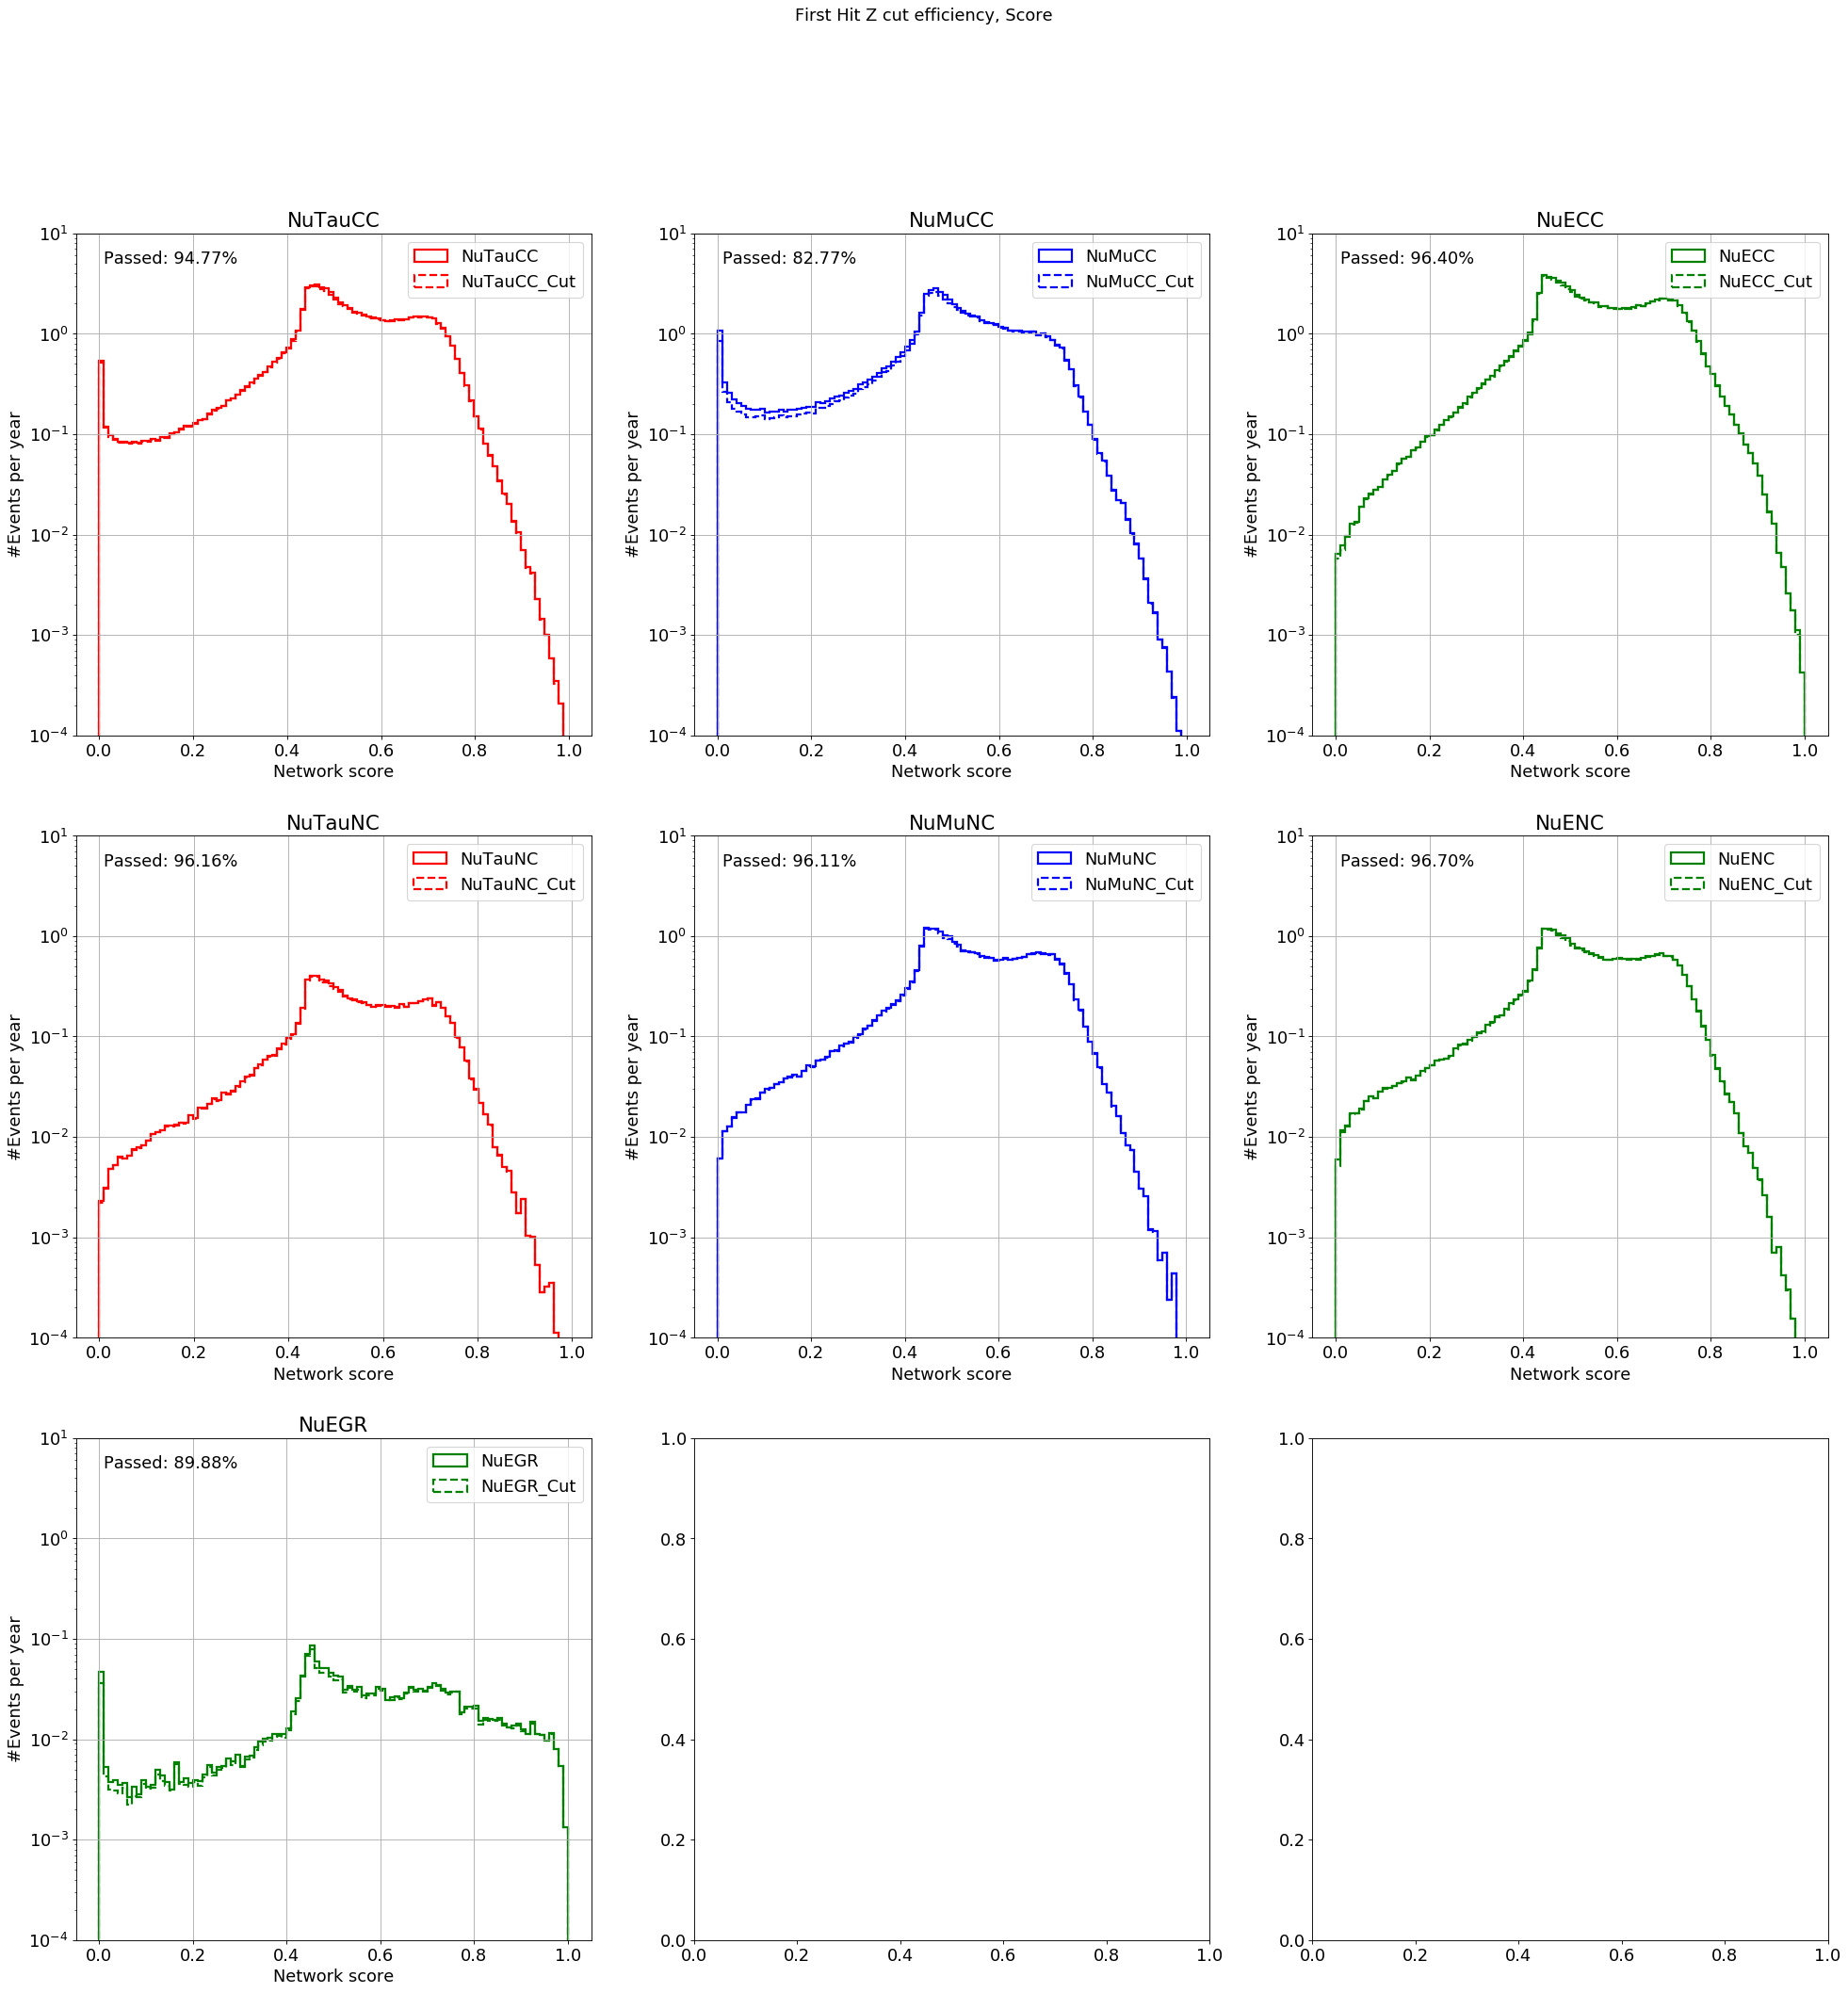

In [219]:
bins=100
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("First Hit Z cut efficiency, Score", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(zmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Network score', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)   
ax1.hist(preds_tc[:,1], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[zmask_tc], weights = d_weights_tc[zmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(zmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Network score', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)   
ax2.hist(preds_mc[:,1], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[zmask_mc], weights = d_weights_mc[zmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(zmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Network score', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)   
ax3.hist(preds_ec[:,1], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[zmask_ec], weights = d_weights_ec[zmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(zmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Network score', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)   
ax4.hist(preds_tn[:,1], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(preds_tn[:,1].reshape(preds_tn.shape[0],1)[zmask_tn], weights = d_weights_tn[zmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(zmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Network score', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)   
ax5.hist(preds_mn[:,1], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(preds_mn[:,1].reshape(preds_mn.shape[0],1)[zmask_mn], weights = d_weights_mn[zmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.legend()
ax5.grid(True)

ax6.set_title('NuENC')
ax6.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(zmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Network score', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)   
ax6.hist(preds_en[:,1], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(preds_en[:,1].reshape(preds_en.shape[0],1)[zmask_en], weights = d_weights_en[zmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(zmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Network score', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)   
ax7.hist(preds_eg[:,1], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(preds_eg[:,1].reshape(preds_eg.shape[0],1)[zmask_eg], weights = d_weights_eg[zmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

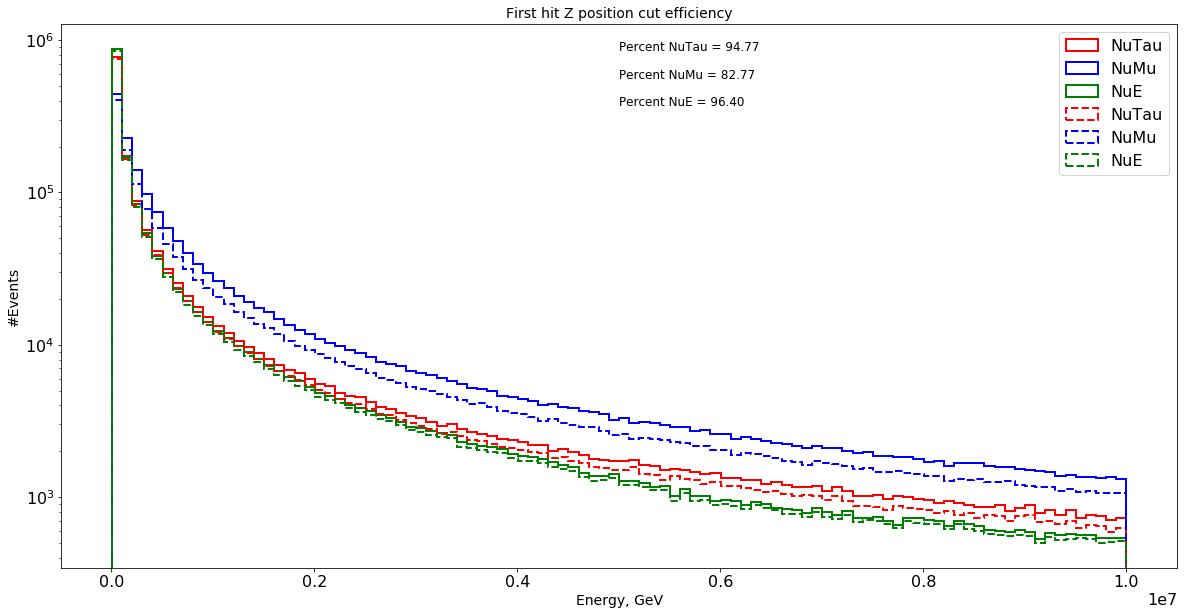

In [220]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("First hit Z position cut efficiency", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(zmask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(zmask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(zmask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(data_tc[zmask_tc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(data_mc[zmask_mc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(data_ec[zmask_ec]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

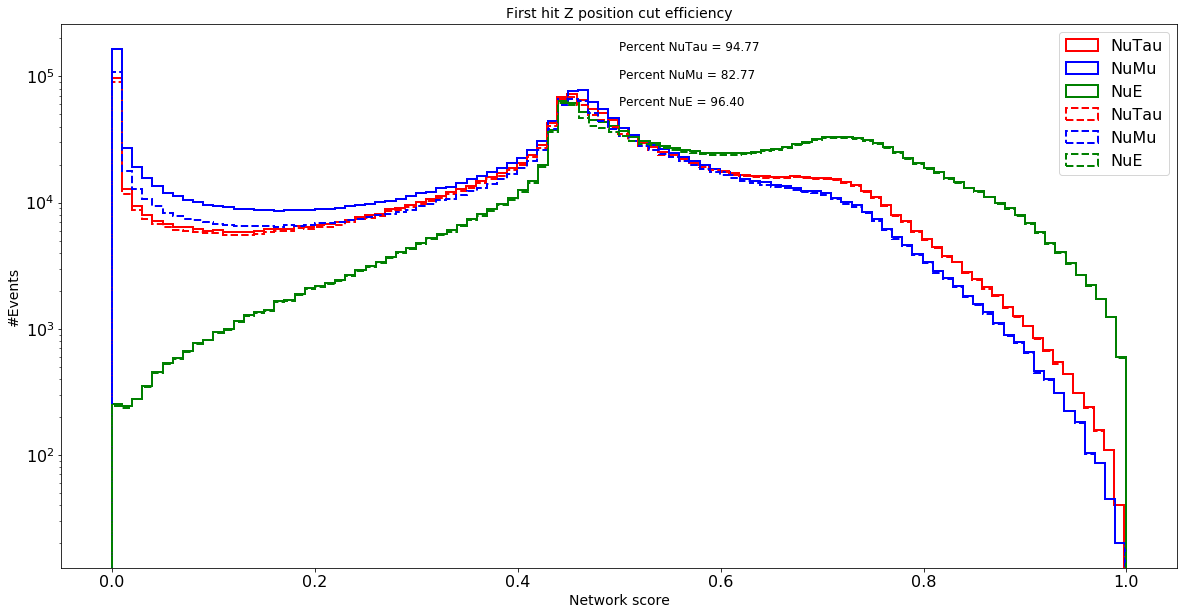

In [221]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_title("First hit Z position cut efficiency", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(zmask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(zmask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(zmask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Network score', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(preds_tc[:,1], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(preds_mc[:,1], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(preds_ec[:,1], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[zmask_tc], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[zmask_mc], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[zmask_ec], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

In [14]:
gmask1_ec = (data_ec['logan_veto']["LeastDistanceToPolygon_Veto"]>10) 
gmask1_mc = (data_mc['logan_veto']["LeastDistanceToPolygon_Veto"]>10)
gmask1_tc = (data_tc['logan_veto']["LeastDistanceToPolygon_Veto"]>10) 
gmask1_en = (data_en['logan_veto']["LeastDistanceToPolygon_Veto"]>10) 
gmask1_mn = (data_mn['logan_veto']["LeastDistanceToPolygon_Veto"]>10)
gmask1_tn = (data_tn['logan_veto']["LeastDistanceToPolygon_Veto"]>10) 
gmask1_eg = (data_eg['logan_veto']["LeastDistanceToPolygon_Veto"]>10) 

In [15]:
gmask2_ec =  (data_ec['logan_veto']["LeastDistanceToPolygon_Veto"]>75) | (data_ec['logan_veto']["VHESelfVetoVertexPosZ"]>-200)
gmask2_mc =  (data_mc['logan_veto']["LeastDistanceToPolygon_Veto"]>75) | (data_mc['logan_veto']["VHESelfVetoVertexPosZ"]>-200) 
gmask2_tc =  (data_tc['logan_veto']["LeastDistanceToPolygon_Veto"]>75) | (data_tc['logan_veto']["VHESelfVetoVertexPosZ"]>-200) 
gmask2_en =  (data_en['logan_veto']["LeastDistanceToPolygon_Veto"]>75) | (data_en['logan_veto']["VHESelfVetoVertexPosZ"]>-200)
gmask2_mn =  (data_mn['logan_veto']["LeastDistanceToPolygon_Veto"]>75) | (data_mn['logan_veto']["VHESelfVetoVertexPosZ"]>-200) 
gmask2_tn =  (data_tn['logan_veto']["LeastDistanceToPolygon_Veto"]>75) | (data_tn['logan_veto']["VHESelfVetoVertexPosZ"]>-200) 
gmask2_eg =  (data_eg['logan_veto']["LeastDistanceToPolygon_Veto"]>75) | (data_eg['logan_veto']["VHESelfVetoVertexPosZ"]>-200) 

In [16]:
gmask3_ec = ((-1/3*data_ec['logan_veto']["LeastDistanceToPolygon_Veto"]+data_ec['logan_veto']["VHESelfVetoVertexPosZ"])<400)
gmask3_mc = ((-1/3*data_mc['logan_veto']["LeastDistanceToPolygon_Veto"]+data_mc['logan_veto']["VHESelfVetoVertexPosZ"])<400)
gmask3_tc = ((-1/3*data_tc['logan_veto']["LeastDistanceToPolygon_Veto"]+data_tc['logan_veto']["VHESelfVetoVertexPosZ"])<400)
gmask3_en = ((-1/3*data_en['logan_veto']["LeastDistanceToPolygon_Veto"]+data_en['logan_veto']["VHESelfVetoVertexPosZ"])<400)
gmask3_mn = ((-1/3*data_mn['logan_veto']["LeastDistanceToPolygon_Veto"]+data_mn['logan_veto']["VHESelfVetoVertexPosZ"])<400)
gmask3_tn = ((-1/3*data_tn['logan_veto']["LeastDistanceToPolygon_Veto"]+data_tn['logan_veto']["VHESelfVetoVertexPosZ"])<400)
gmask3_eg = ((-1/3*data_eg['logan_veto']["LeastDistanceToPolygon_Veto"]+data_eg['logan_veto']["VHESelfVetoVertexPosZ"])<400)

In [17]:
gmask_ec = gmask1_ec & gmask2_ec & gmask3_ec
gmask_mc = gmask1_mc & gmask2_mc & gmask3_mc
gmask_tc = gmask1_tc & gmask2_tc & gmask3_tc
gmask_en = gmask1_en & gmask2_en & gmask3_en
gmask_mn = gmask1_mn & gmask2_mn & gmask3_mn
gmask_tn = gmask1_tn & gmask2_tn & gmask3_tn
gmask_eg = gmask1_eg & gmask2_eg & gmask3_eg

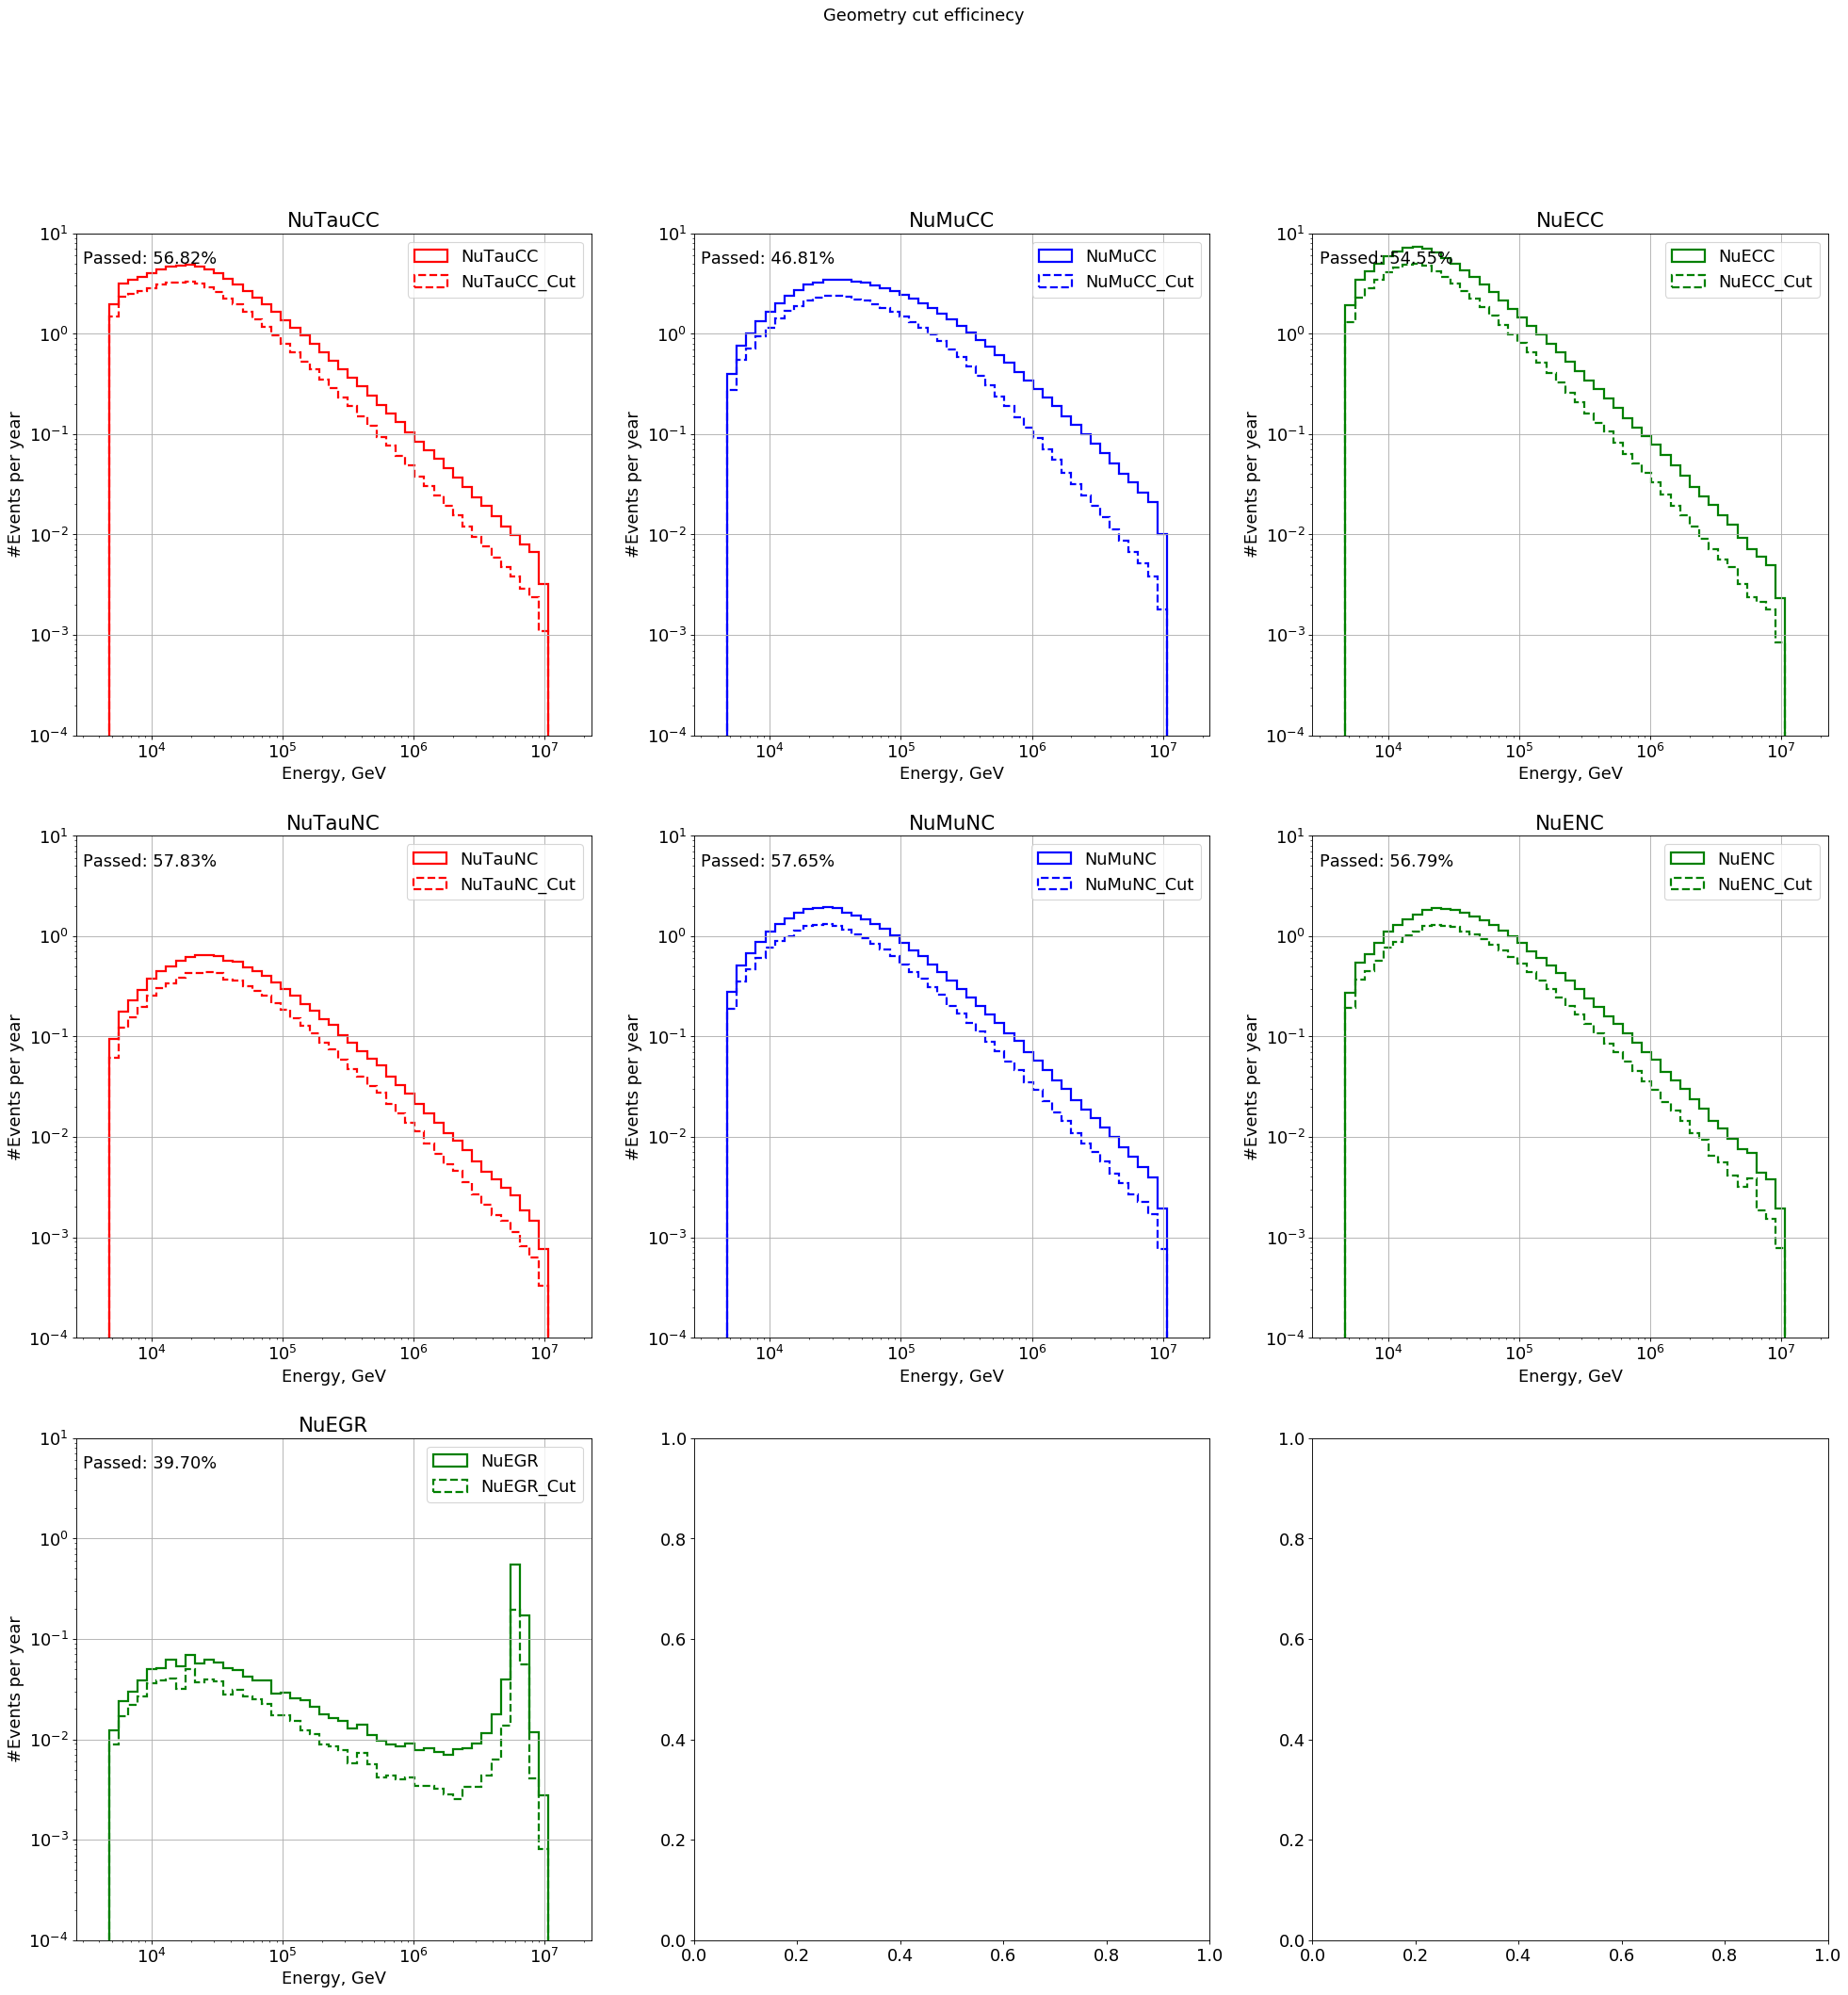

In [226]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Geometry cut efficinecy", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(gmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)                                                   
ax1.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(data_tc[gmask_tc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc[gmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(gmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)                                                   
ax2.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(data_mc[gmask_mc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc[gmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(gmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)                                                   
ax3.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(data_ec[gmask_ec]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec[gmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(gmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)                                                   
ax4.hist(data_tn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(data_tn[gmask_tn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn[gmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(gmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)                                                   
ax5.hist(data_mn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(data_mn[gmask_mn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn[gmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.grid(True)
ax5.legend()

ax6.set_title('NuENC')
ax6.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(gmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)                                                   
ax6.hist(data_en['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(data_en[gmask_en]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en[gmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(gmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)                                                   
ax7.hist(data_eg['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(data_eg[gmask_eg]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg[gmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

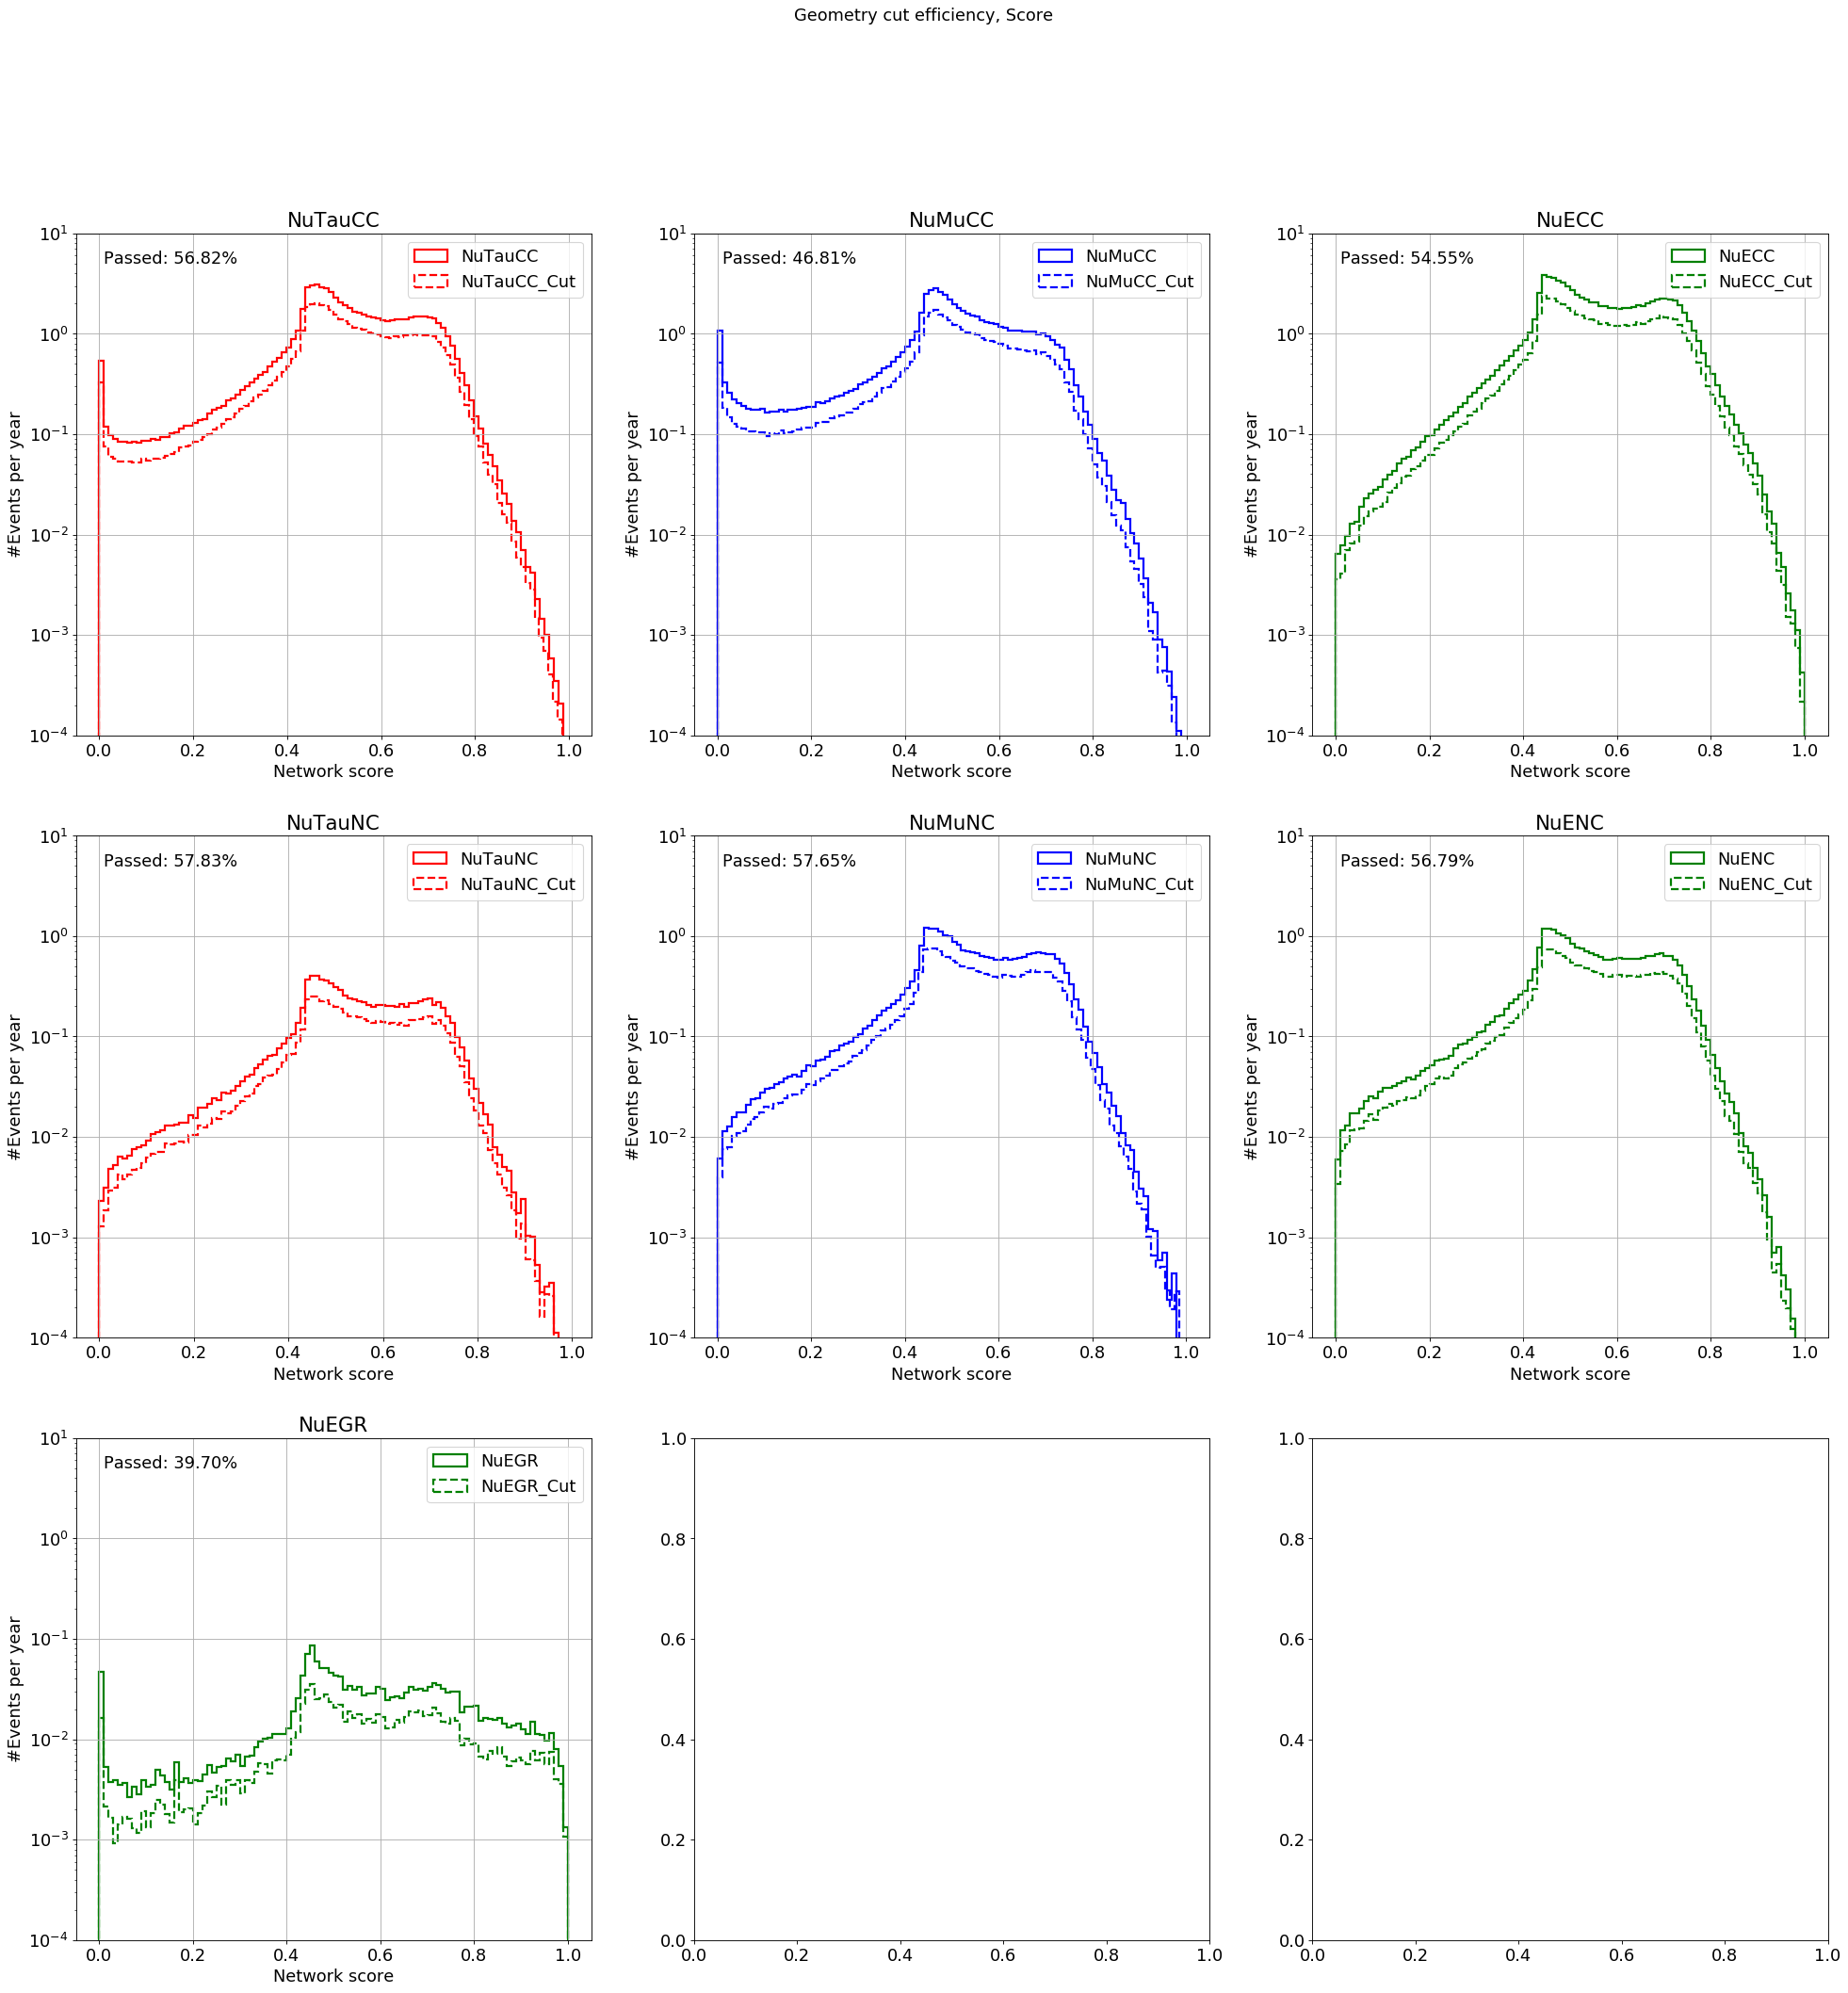

In [227]:
bins=100
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("Geometry cut efficiency, Score", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(gmask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Network score', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)   
ax1.hist(preds_tc[:,1], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[gmask_tc], weights = d_weights_tc[gmask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(gmask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Network score', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)   
ax2.hist(preds_mc[:,1], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[gmask_mc], weights = d_weights_mc[gmask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(gmask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Network score', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)   
ax3.hist(preds_ec[:,1], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[gmask_ec], weights = d_weights_ec[gmask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(gmask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Network score', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)   
ax4.hist(preds_tn[:,1], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(preds_tn[:,1].reshape(preds_tn.shape[0],1)[gmask_tn], weights = d_weights_tn[gmask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(gmask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Network score', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)   
ax5.hist(preds_mn[:,1], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(preds_mn[:,1].reshape(preds_mn.shape[0],1)[gmask_mn], weights = d_weights_mn[gmask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.legend()
ax5.grid(True)

ax6.set_title('NuENC')
ax6.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(gmask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Network score', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)   
ax6.hist(preds_en[:,1], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(preds_en[:,1].reshape(preds_en.shape[0],1)[gmask_en], weights = d_weights_en[gmask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(gmask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Network score', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)   
ax7.hist(preds_eg[:,1], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(preds_eg[:,1].reshape(preds_eg.shape[0],1)[gmask_eg], weights = d_weights_eg[gmask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

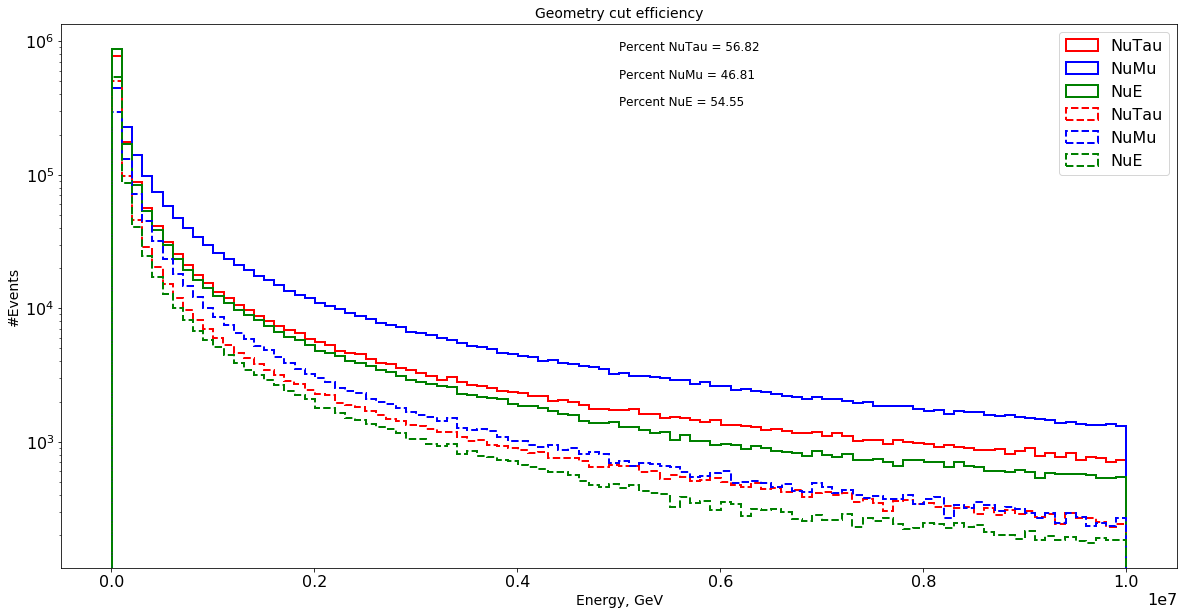

In [228]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Geometry cut efficiency", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(gmask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(gmask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(gmask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(data_tc[gmask_tc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(data_mc[gmask_mc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(data_ec[gmask_ec]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

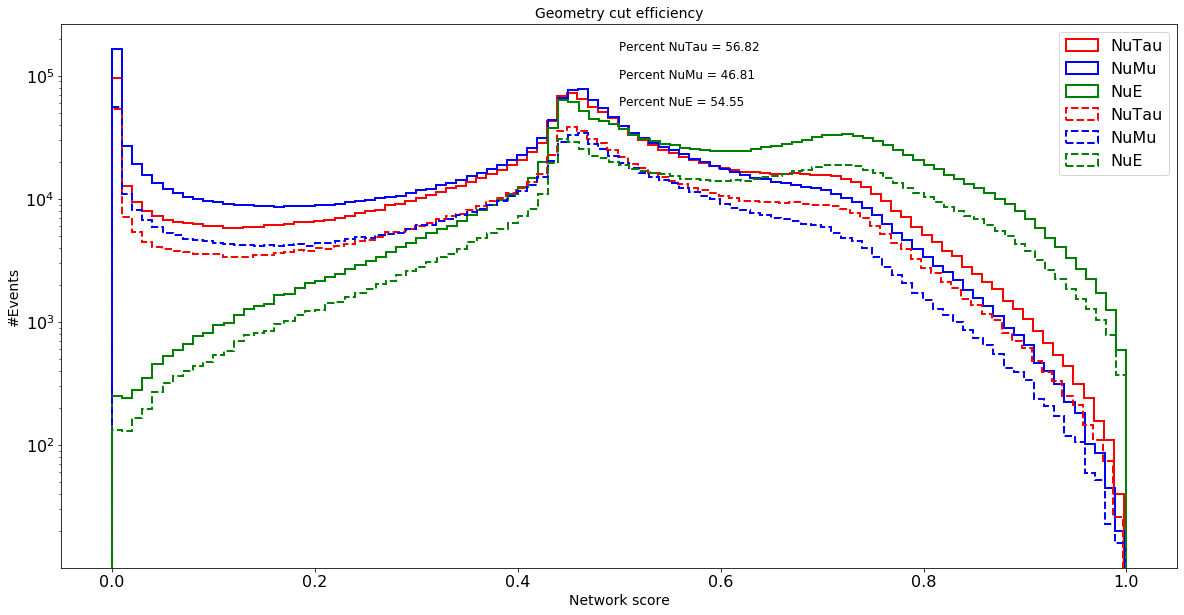

In [229]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_title("Geometry cut efficiency", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(gmask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(gmask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(gmask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Network score', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(preds_tc[:,1], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(preds_mc[:,1], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(preds_ec[:,1], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[gmask_tc], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[gmask_mc], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[gmask_ec], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

In [21]:
mask_ec = gmask_ec & zmask_ec & lmask_ec & dmask_ec
mask_mc = gmask_mc & zmask_mc & lmask_mc & dmask_mc
mask_tc = gmask_tc & zmask_tc & lmask_tc & dmask_tc
mask_en = gmask_en & zmask_en & lmask_en & dmask_en
mask_mn = gmask_mn & zmask_mn & lmask_mn & dmask_mn
mask_tn = gmask_tn & zmask_tn & lmask_tn & dmask_tn
mask_eg = gmask_eg & zmask_eg & lmask_eg & dmask_eg

In [24]:
print('                  logl    || loglnoDC|| Z pos   || geom    || all    ')
print('Percent NuTauCC = {0:.2f} || {1:.2f} || {2:.2f} || {3:.2f} || {4:.2f}'.format(np.sum(lmask_tc)/data_tc.shape[0]*100,np.sum(dmask_tc)/data_tc.shape[0]*100,np.sum(zmask_tc)/data_tc.shape[0]*100,np.sum(gmask_tc)/data_tc.shape[0]*100,np.sum(mask_tc)/data_tc.shape[0]*100))
print('Percent NuMuCC =  {0:.2f} || {1:.2f} || {2:.2f} || {3:.2f} || {4:.2f}'.format(np.sum(lmask_mc)/data_mc.shape[0]*100,np.sum(dmask_mc)/data_mc.shape[0]*100,np.sum(zmask_mc)/data_mc.shape[0]*100,np.sum(gmask_mc)/data_mc.shape[0]*100,np.sum(mask_mc)/data_mc.shape[0]*100))
print('Percent NuECC =   {0:.2f} || {1:.2f} || {2:.2f} || {3:.2f} || {4:.2f}'.format(np.sum(lmask_ec)/data_ec.shape[0]*100,np.sum(dmask_ec)/data_ec.shape[0]*100,np.sum(zmask_ec)/data_ec.shape[0]*100,np.sum(gmask_ec)/data_ec.shape[0]*100,np.sum(mask_ec)/data_ec.shape[0]*100))
print('Percent NuTauNC = {0:.2f} || {1:.2f} || {2:.2f} || {3:.2f} || {4:.2f}'.format(np.sum(lmask_tn)/data_tn.shape[0]*100,np.sum(dmask_tn)/data_tn.shape[0]*100,np.sum(zmask_tn)/data_tn.shape[0]*100,np.sum(gmask_tn)/data_tn.shape[0]*100,np.sum(mask_tn)/data_tn.shape[0]*100))
print('Percent NuMuNC =  {0:.2f} || {1:.2f} || {2:.2f} || {3:.2f} || {4:.2f}'.format(np.sum(lmask_mn)/data_mn.shape[0]*100,np.sum(dmask_mn)/data_mn.shape[0]*100,np.sum(zmask_mn)/data_mn.shape[0]*100,np.sum(gmask_mn)/data_mn.shape[0]*100,np.sum(mask_mn)/data_mn.shape[0]*100))
print('Percent NuENC =   {0:.2f} || {1:.2f} || {2:.2f} || {3:.2f} || {4:.2f}'.format(np.sum(lmask_en)/data_en.shape[0]*100,np.sum(dmask_en)/data_en.shape[0]*100,np.sum(zmask_en)/data_en.shape[0]*100,np.sum(gmask_en)/data_en.shape[0]*100,np.sum(mask_en)/data_en.shape[0]*100))
print('Percent NuEGR =   {0:.2f} || {1:.2f} || {2:.2f} || {3:.2f} || {4:.2f}'.format(np.sum(lmask_eg)/data_eg.shape[0]*100,np.sum(dmask_eg)/data_eg.shape[0]*100,np.sum(zmask_eg)/data_eg.shape[0]*100,np.sum(gmask_eg)/data_eg.shape[0]*100,np.sum(mask_eg)/data_eg.shape[0]*100))

                  logl    || loglnoDC|| Z pos   || geom    || all    
Percent NuTauCC = 89.96 || 85.45 || 94.77 || 56.82 || 48.54
Percent NuMuCC =  24.06 || 17.98 || 82.77 || 46.81 || 8.72
Percent NuECC =   97.22 || 94.00 || 96.40 || 54.55 || 51.39
Percent NuTauNC = 97.15 || 94.21 || 96.16 || 57.83 || 54.55
Percent NuMuNC =  97.08 || 94.08 || 96.11 || 57.65 || 54.31
Percent NuENC =   97.14 || 94.14 || 96.70 || 56.79 || 53.62
Percent NuEGR =   79.61 || 71.47 || 89.88 || 39.70 || 28.72


In [26]:
print('Percent Single logl =   {0:.2f}'.format((np.sum(lmask_ec)+np.sum(lmask_en)+np.sum(lmask_eg)+np.sum(lmask_tn)+np.sum(lmask_mn))/(data_ec.shape[0]+data_en.shape[0]+data_eg.shape[0]+data_tn.shape[0]+data_mn.shape[0])*100))
print('Percent Single dlogl =   {0:.2f}'.format((np.sum(dmask_ec)+np.sum(dmask_en)+np.sum(dmask_eg)+np.sum(dmask_tn)+np.sum(dmask_mn))/(data_ec.shape[0]+data_en.shape[0]+data_eg.shape[0]+data_tn.shape[0]+data_mn.shape[0])*100))
print('Percent Single z =   {0:.2f}'.format((np.sum(zmask_ec)+np.sum(zmask_en)+np.sum(zmask_eg)+np.sum(zmask_tn)+np.sum(zmask_mn))/(data_ec.shape[0]+data_en.shape[0]+data_eg.shape[0]+data_tn.shape[0]+data_mn.shape[0])*100))
print('Percent Single geom =   {0:.2f}'.format((np.sum(gmask_ec)+np.sum(gmask_en)+np.sum(gmask_eg)+np.sum(gmask_tn)+np.sum(gmask_mn))/(data_ec.shape[0]+data_en.shape[0]+data_eg.shape[0]+data_tn.shape[0]+data_mn.shape[0])*100))
print('Percent Single all =   {0:.2f}'.format((np.sum(mask_ec)+np.sum(mask_en)+np.sum(mask_eg)+np.sum(mask_tn)+np.sum(mask_mn))/(data_ec.shape[0]+data_en.shape[0]+data_eg.shape[0]+data_tn.shape[0]+data_mn.shape[0])*100))      

Percent Single logl =   96.89
Percent Single dlogl =   93.71
Percent Single z =   96.30
Percent Single geom =   55.69
Percent Single all =   52.37


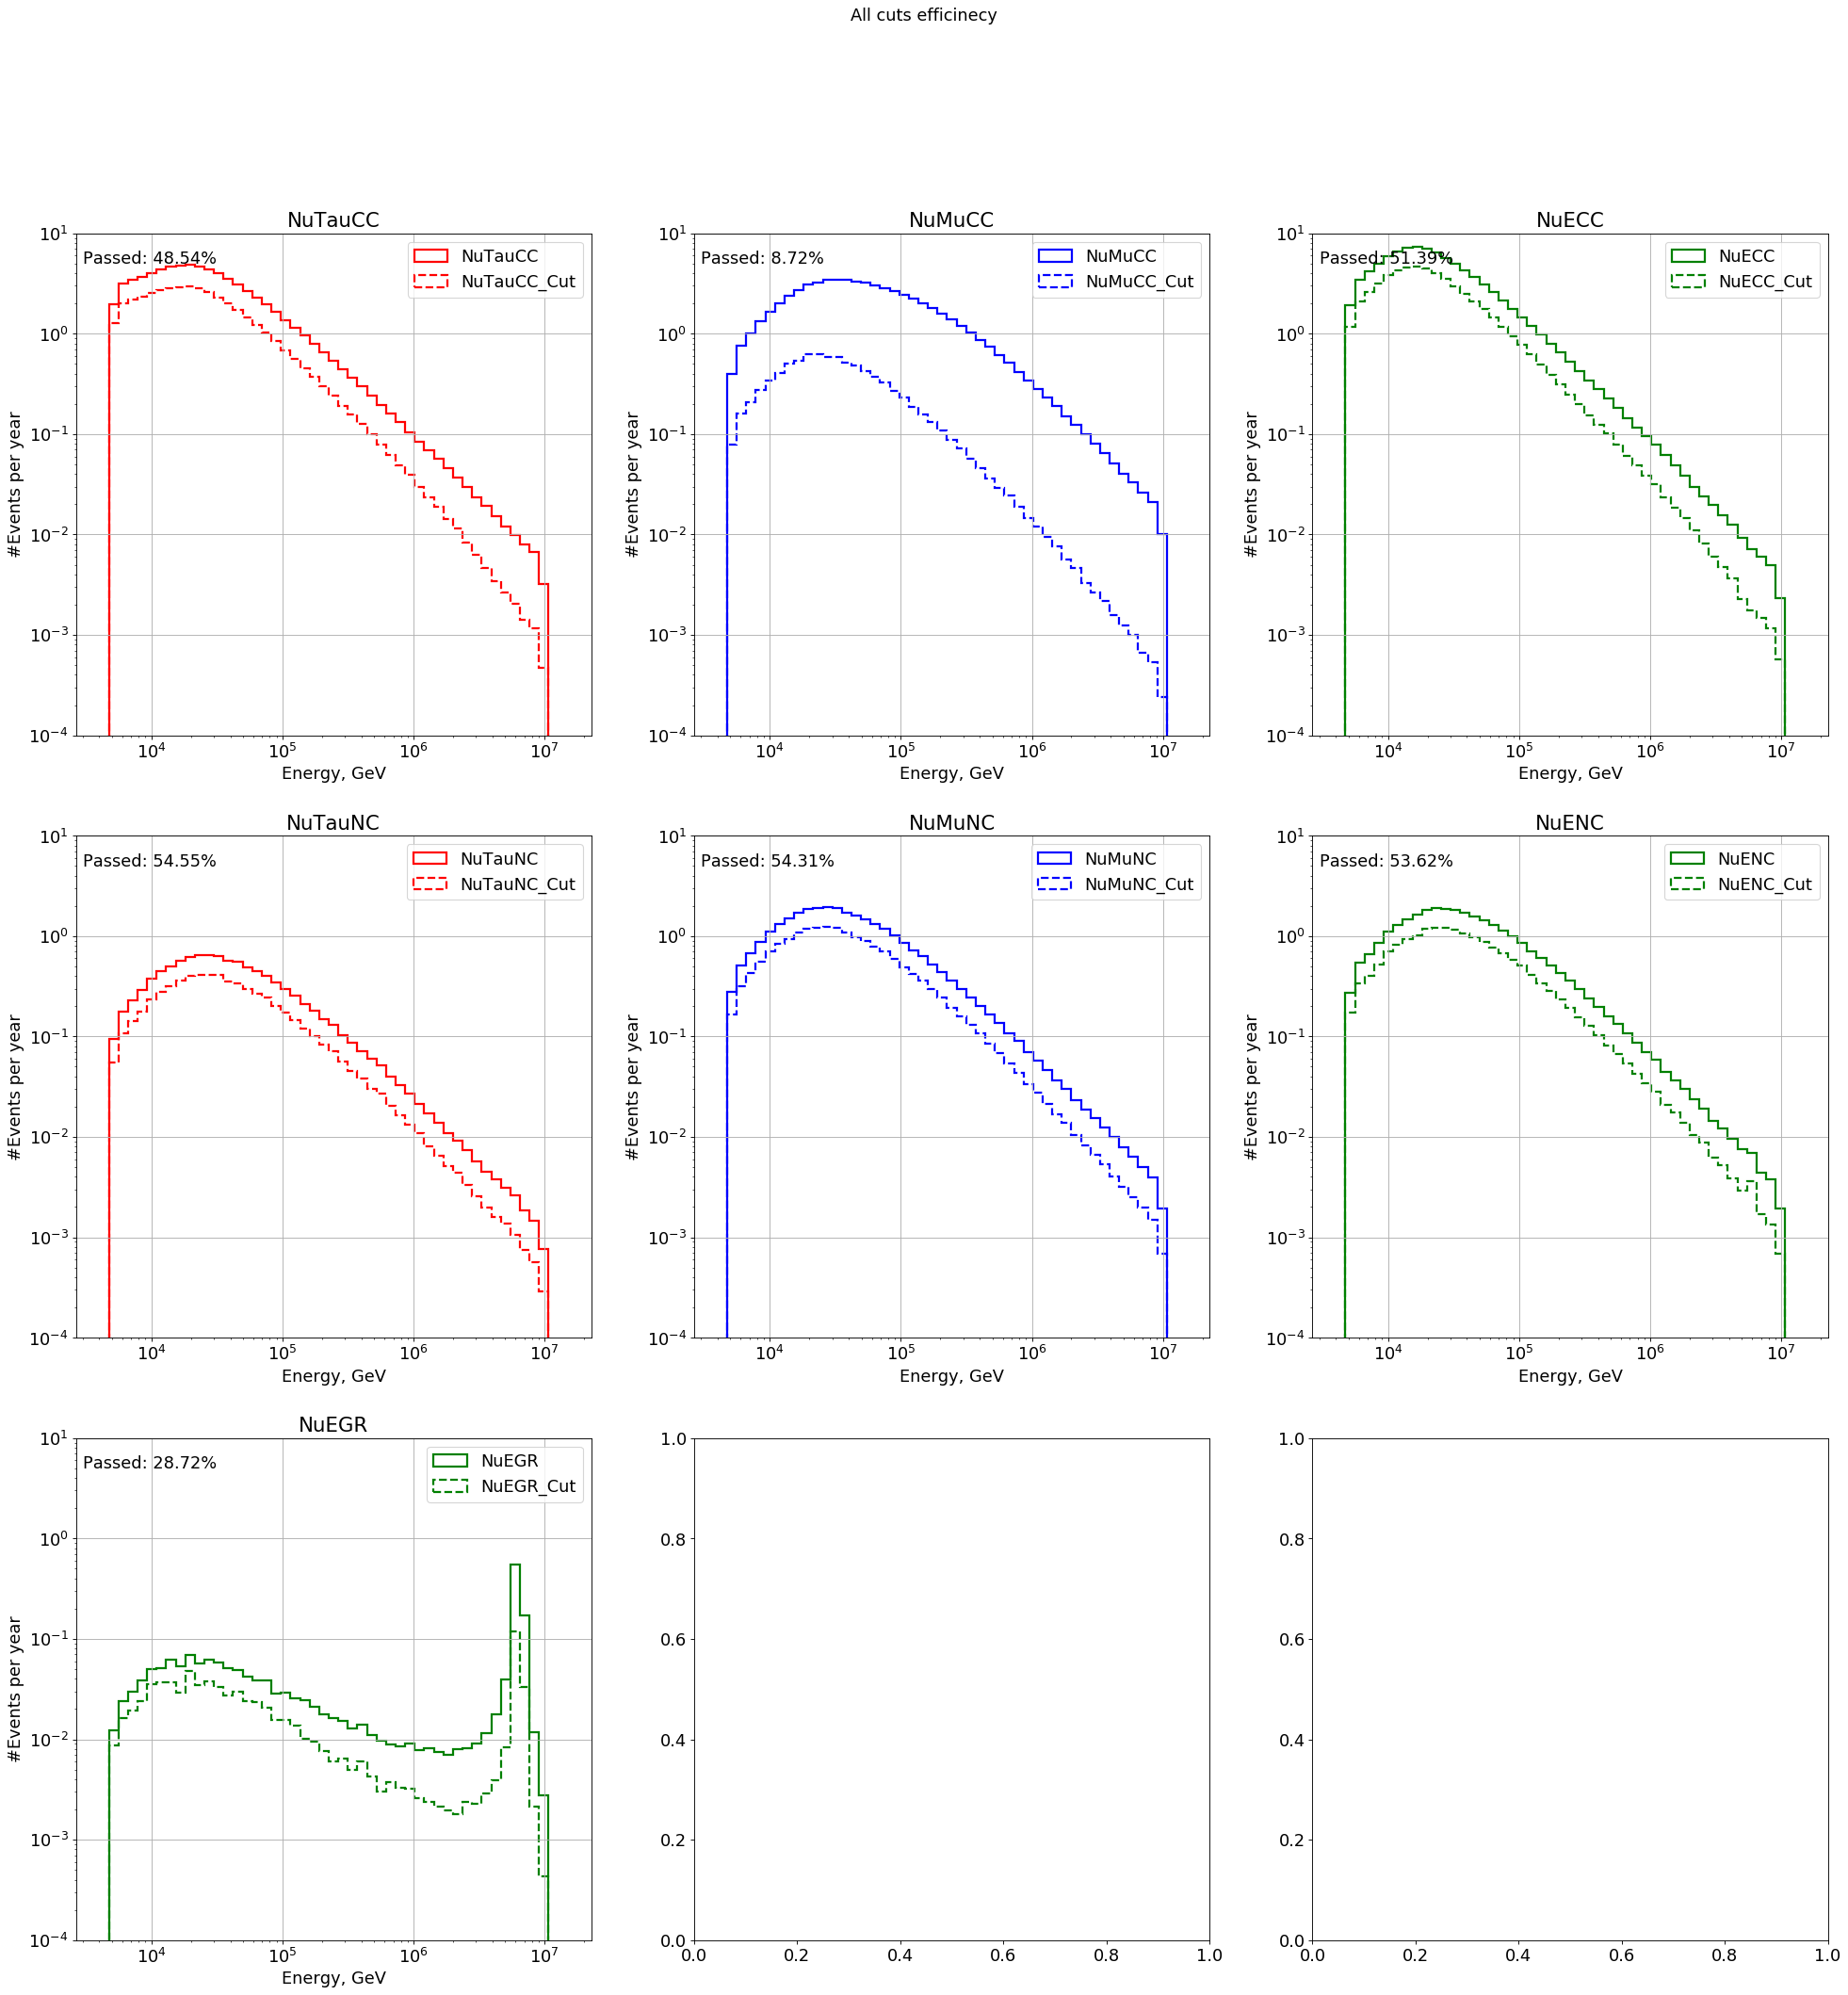

In [231]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("All cuts efficinecy", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(mask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)                                                   
ax1.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(data_tc[mask_tc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tc[mask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(mask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)                                                   
ax2.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(data_mc[mask_mc]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mc[mask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(mask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)                                                   
ax3.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(data_ec[mask_ec]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_ec[mask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(mask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)                                                   
ax4.hist(data_tn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(data_tn[mask_tn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_tn[mask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(mask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)                                                   
ax5.hist(data_mn['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(data_mn[mask_mn]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_mn[mask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.grid(True)
ax5.legend()

ax6.set_title('NuENC')
ax6.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(mask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)                                                   
ax6.hist(data_en['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(data_en[mask_en]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_en[mask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(3000,5,'Passed: {0:.2f}%'.format(np.sum(mask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Energy, GeV', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)                                                   
ax7.hist(data_eg['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(data_eg[mask_eg]['weight']["PrimaryNeutrinoEnergy"], weights = d_weights_eg[mask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

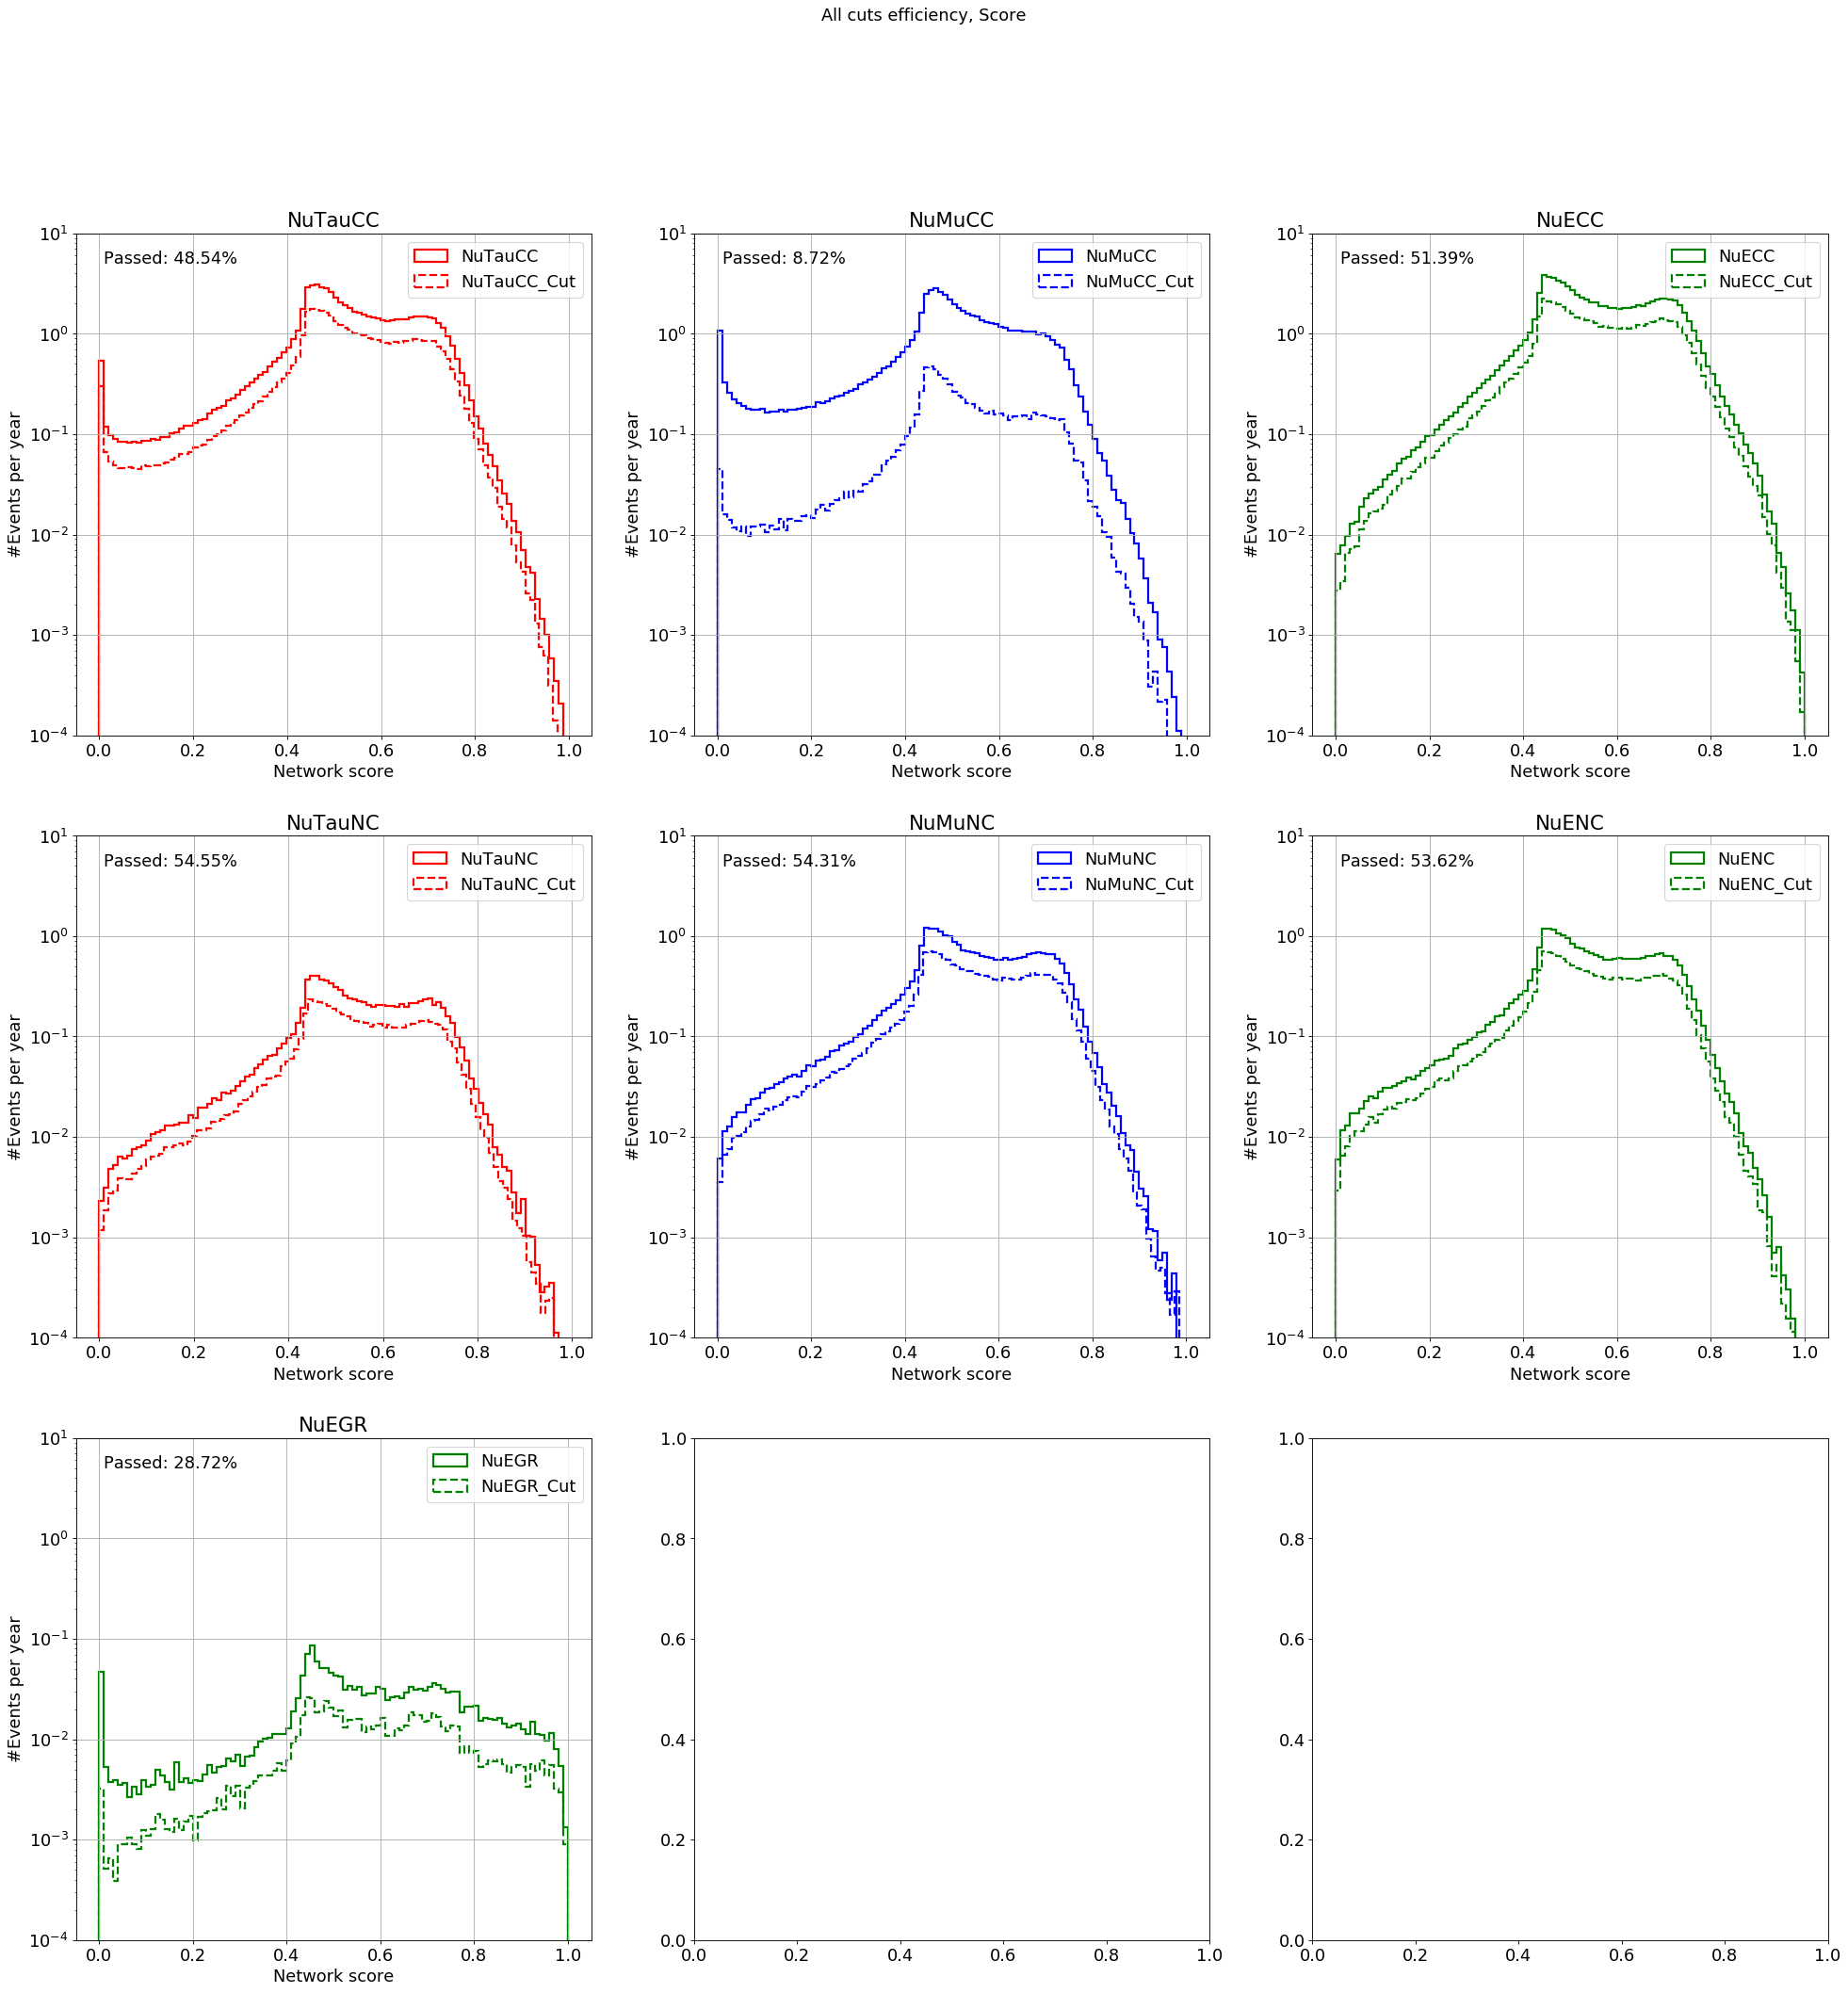

In [232]:
bins=100
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.suptitle("All cuts efficiency, Score", fontsize = 16)

ax1.set_title('NuTauCC')
ax1.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(mask_tc)/data_tc.shape[0]*100), color = "black",fontsize=16)
ax1.set_yscale('log')
ax1.set_ylim([0.0001, 10])
ax1.set_xlabel('Network score', fontsize = 16)                                                              
ax1.set_ylabel("#Events per year", fontsize = 16)   
ax1.hist(preds_tc[:,1], weights = d_weights_tc*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax1.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[mask_tc], weights = d_weights_tc[mask_tc]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauCC_Cut")  
ax1.legend()
ax1.grid(True)

ax2.set_title('NuMuCC')
ax2.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(mask_mc)/data_mc.shape[0]*100), color = "black",fontsize=16)
ax2.set_yscale('log')
ax2.set_ylim([0.0001, 10])
ax2.set_xlabel('Network score', fontsize = 16)                                                              
ax2.set_ylabel("#Events per year", fontsize = 16)   
ax2.hist(preds_mc[:,1], weights = d_weights_mc*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[mask_mc], weights = d_weights_mc[mask_mc]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuCC_Cut")  
ax2.legend()
ax2.grid(True)

ax3.set_title('NuECC')
ax3.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(mask_ec)/data_ec.shape[0]*100), color = "black",fontsize=16)
ax3.set_yscale('log')
ax3.set_ylim([0.0001, 10])
ax3.set_xlabel('Network score', fontsize = 16)                                                              
ax3.set_ylabel("#Events per year", fontsize = 16)   
ax3.hist(preds_ec[:,1], weights = d_weights_ec*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax3.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[mask_ec], weights = d_weights_ec[mask_ec]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuECC_Cut")  
ax3.legend()
ax3.grid(True)

ax4.set_title('NuTauNC')
ax4.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(mask_tn)/data_tn.shape[0]*100), color = "black",fontsize=16)
ax4.set_yscale('log')
ax4.set_ylim([0.0001, 10])
ax4.set_xlabel('Network score', fontsize = 16)                                                              
ax4.set_ylabel("#Events per year", fontsize = 16)   
ax4.hist(preds_tn[:,1], weights = d_weights_tn*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauNC")  
ax4.hist(preds_tn[:,1].reshape(preds_tn.shape[0],1)[mask_tn], weights = d_weights_tn[mask_tn]*livetime, bins =bins, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC_Cut")  
ax4.legend()
ax4.grid(True)

ax5.set_title('NuMuNC')
ax5.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(mask_mn)/data_mn.shape[0]*100), color = "black",fontsize=16)
ax5.set_yscale('log')
ax5.set_ylim([0.0001, 10])
ax5.set_xlabel('Network score', fontsize = 16)                                                              
ax5.set_ylabel("#Events per year", fontsize = 16)   
ax5.hist(preds_mn[:,1], weights = d_weights_mn*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuNC")  
ax5.hist(preds_mn[:,1].reshape(preds_mn.shape[0],1)[mask_mn], weights = d_weights_mn[mask_mn]*livetime, bins =bins, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC_Cut")  
ax5.legend()
ax5.grid(True)

ax6.set_title('NuENC')
ax6.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(mask_en)/data_en.shape[0]*100), color = "black",fontsize=16)
ax6.set_yscale('log')
ax6.set_ylim([0.0001, 10])
ax6.set_xlabel('Network score', fontsize = 16)                                                              
ax6.set_ylabel("#Events per year", fontsize = 16)   
ax6.hist(preds_en[:,1], weights = d_weights_en*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuENC")  
ax6.hist(preds_en[:,1].reshape(preds_en.shape[0],1)[mask_en], weights = d_weights_en[mask_en]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC_Cut")  
ax6.legend()
ax6.grid(True)

ax7.set_title('NuEGR')
ax7.text(0.01,5,'Passed: {0:.2f}%'.format(np.sum(mask_eg)/data_eg.shape[0]*100), color = "black",fontsize=16)
ax7.set_yscale('log')
ax7.set_ylim([0.0001, 10])
ax7.set_xlabel('Network score', fontsize = 16)                                                              
ax7.set_ylabel("#Events per year", fontsize = 16)   
ax7.hist(preds_eg[:,1], weights = d_weights_eg*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, label = "NuEGR")  
ax7.hist(preds_eg[:,1].reshape(preds_eg.shape[0],1)[mask_eg], weights = d_weights_eg[mask_eg]*livetime, bins =bins, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuEGR_Cut")  
ax7.legend()
ax7.grid(True)

plt.show()

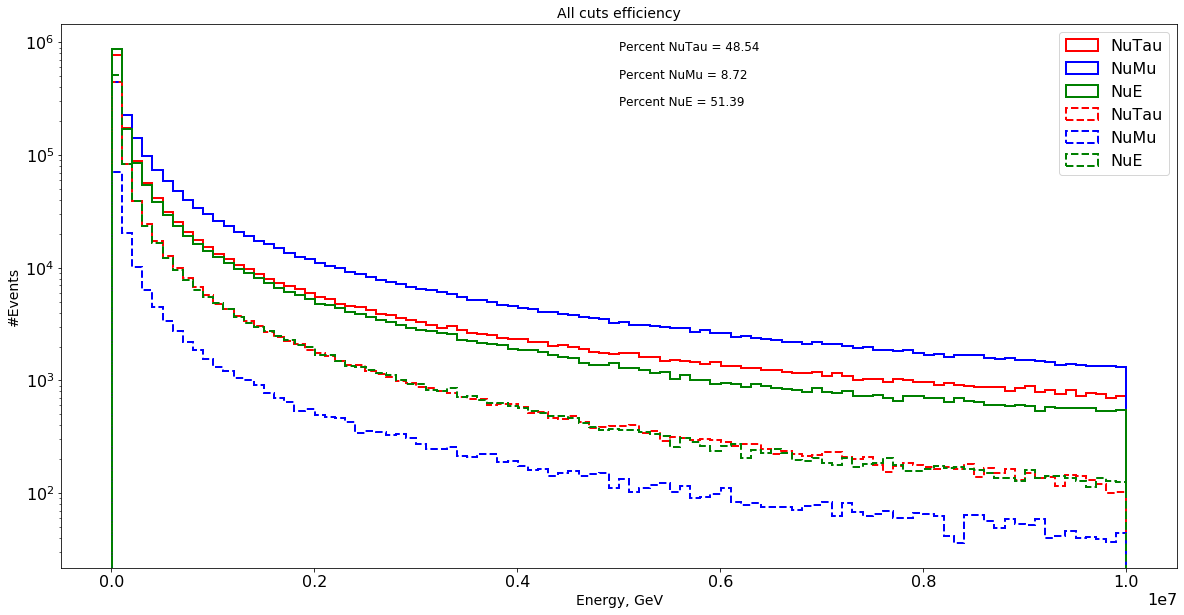

In [233]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("All cuts efficiency", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(mask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(mask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(mask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Energy, GeV', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(data_tc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(data_mc['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(data_ec['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(data_tc[mask_tc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(data_mc[mask_mc]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(data_ec[mask_ec]['weight']["PrimaryNeutrinoEnergy"], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

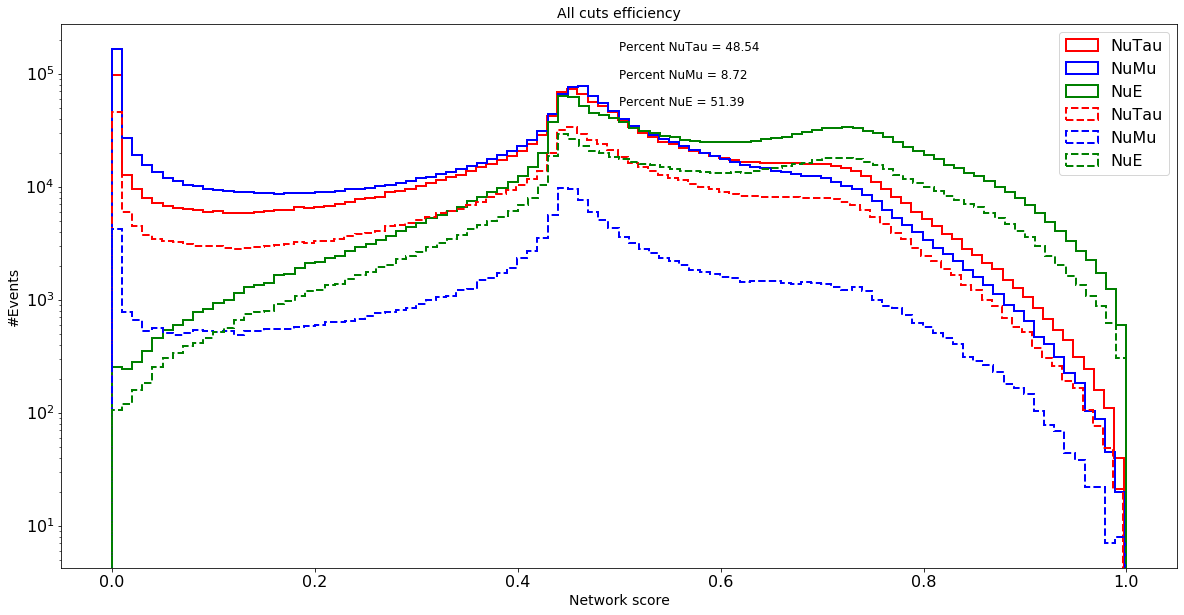

In [234]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_yscale('log')
ax.set_title("All cuts efficiency", fontsize = 14)
ax.text(0.5,0.95,'Percent NuTau = {0:.2f}'.format(np.sum(mask_tc)/data_tc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.90,'Percent NuMu = {0:.2f}'.format(np.sum(mask_mc)/data_mc.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)
ax.text(0.5,0.85,'Percent NuE = {0:.2f}'.format(np.sum(mask_ec)/data_ec.shape[0]*100), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Network score', fontsize = 14)                                                              
ax.set_ylabel("#Events", fontsize = 14)                                                   
ax.hist(preds_tc[:,1], bins =100, histtype = 'step',edgecolor ='r', lw =2, label = "NuTau")  
ax.hist(preds_mc[:,1], bins =100, histtype = 'step',edgecolor ='b', lw =2, label = "NuMu")  
ax.hist(preds_ec[:,1], bins =100, histtype = 'step',edgecolor ='g', lw =2, label = "NuE")  
ax.hist(preds_tc[:,1].reshape(preds_tc.shape[0],1)[mask_tc], bins =100, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTau")  
ax.hist(preds_mc[:,1].reshape(preds_mc.shape[0],1)[mask_mc], bins =100, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMu")  
ax.hist(preds_ec[:,1].reshape(preds_ec.shape[0],1)[mask_ec], bins =100, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuE")  

plt.legend()
plt.show()

In [ ]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

dc_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy'][mask_tc]/1e5)**index) # same units as norm
dc_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy'][mask_mc]/1e5)**index) # same units as norm
dc_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy'][mask_ec]/1e5)**index) # same units as norm
dc_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy'][mask_tn]/1e5)**index) # same units as norm
dc_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy'][mask_mn]/1e5)**index) # same units as norm
dc_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy'][mask_en]/1e5)**index) # same units as norm
dc_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy'][mask_eg]/1e5)**index) # same units as norm

d_weights_tc = data_tc['weight']['OneWeight']*d_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"]) # units of Hz per simulated events event
d_weights_mc = data_mc['weight']['OneWeight']*d_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_ec = data_ec['weight']['OneWeight']*d_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_tn = data_tn['weight']['OneWeight']*d_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"]) # units of Hz per simulated events event
d_weights_mn = data_mn['weight']['OneWeight']*d_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_en = data_en['weight']['OneWeight']*d_flux_en/(NFiles_cut*data_en['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_eg = data_eg['weight']['OneWeight']*d_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"]) # units of Hz per simulated events event

dc_weights_tc = data_tc['weight']['OneWeight'][mask_tc]*dc_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"][mask_tc]) # units of Hz per simulated events event
dc_weights_mc = data_mc['weight']['OneWeight'][mask_mc]*dc_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"][mask_mc]) # units of Hz per simulated events event
dc_weights_ec = data_ec['weight']['OneWeight'][mask_ec]*dc_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"][mask_ec]) # units of Hz per simulated events event
dc_weights_tn = data_tn['weight']['OneWeight'][mask_tn]*dc_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"][mask_tn]) # units of Hz per simulated events event
dc_weights_mn = data_mn['weight']['OneWeight'][mask_mn]*dc_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"][mask_mn]) # units of Hz per simulated events event
dc_weights_en = data_en['weight']['OneWeight'][mask_en]*dc_flux_en/(NFiles_cut*data_en['weight']["NEvents"][mask_en]) # units of Hz per simulated events event
dc_weights_eg = data_eg['weight']['OneWeight'][mask_eg]*dc_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"][mask_eg]) # units of Hz per simulated events event

d_rate_tc = np.sum(d_weights_tc) # total rates in Hz
d_rate_mc = np.sum(d_weights_mc) # total rates in Hz
d_rate_ec = np.sum(d_weights_ec) # total rates in Hz
d_rate_tn = np.sum(d_weights_tn) # total rates in Hz
d_rate_mn = np.sum(d_weights_mn) # total rates in Hz
d_rate_en = np.sum(d_weights_en) # total rates in Hz
d_rate_eg = np.sum(d_weights_eg) # total rates in Hz

dc_rate_tc = np.sum(dc_weights_tc) # total rates in Hz
dc_rate_mc = np.sum(dc_weights_mc) # total rates in Hz
dc_rate_ec = np.sum(dc_weights_ec) # total rates in Hz
dc_rate_tn = np.sum(dc_weights_tn) # total rates in Hz
dc_rate_mn = np.sum(dc_weights_mn) # total rates in Hz
dc_rate_en = np.sum(dc_weights_en) # total rates in Hz
dc_rate_eg = np.sum(dc_weights_eg) # total rates in Hz

print("TauCC = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(d_rate_ec*livetime, dc_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(d_rate_tn*livetime, dc_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(d_rate_mn*livetime, dc_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(d_rate_en*livetime, dc_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(d_rate_eg*livetime, dc_rate_eg*livetime))#,w_rate_e*livetime)

print("Single = {0:.3f} || {1:.3f}".format((d_rate_ec+d_rate_eg+d_rate_en+d_rate_tn+d_rate_mn)*livetime, (dc_rate_ec+dc_rate_eg+dc_rate_en+dc_rate_tn+dc_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)


In [8]:
mask_net_tc= preds_tc[:,0] >= 0.99
mask_net_mc= preds_mc[:,0] >= 0.99
mask_net_ec= preds_ec[:,0] >= 0.99
mask_net_tn= preds_tn[:,0] >= 0.99
mask_net_mn= preds_mn[:,0] >= 0.99
mask_net_en= preds_en[:,0] >= 0.99
mask_net_eg= preds_eg[:,0] >= 0.99

In [11]:
print(mask_net_ec.shape), #mask_ec.shape)
#print(mask_ec[:,0])

(1523801,)


(None,)

In [29]:
mask2_ec = mask_ec[:,0] & mask_net_ec
mask2_mc = mask_mc[:,0] & mask_net_mc
mask2_tc = mask_tc[:,0] & mask_net_tc
mask2_en = mask_en[:,0] & mask_net_en
mask2_mn = mask_mn[:,0] & mask_net_mn
mask2_tn = mask_tn[:,0] & mask_net_tn
mask2_eg = mask_eg[:,0] & mask_net_eg

In [12]:
mask3_ec = lmask_ec[:,0] & mask_net_ec
mask3_mc = lmask_mc[:,0] & mask_net_mc
mask3_tc = lmask_tc[:,0] & mask_net_tc
mask3_en = lmask_en[:,0] & mask_net_en
mask3_mn = lmask_mn[:,0] & mask_net_mn
mask3_tn = lmask_tn[:,0] & mask_net_tn
mask3_eg = lmask_eg[:,0] & mask_net_eg

In [13]:
print(np.sum(mask3_ec),np.sum(mask3_mc),np.sum(mask3_tc))

207 14508 84837


In [ ]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy'][mask_net_tc]/1e5)**index) # same units as norm
d_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy'][mask_net_mc]/1e5)**index) # same units as norm
d_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy'][mask_net_ec]/1e5)**index) # same units as norm
d_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy'][mask_net_tn]/1e5)**index) # same units as norm
d_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy'][mask_net_mn]/1e5)**index) # same units as norm
d_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy'][mask_net_en]/1e5)**index) # same units as norm
d_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy'][mask_net_eg]/1e5)**index) # same units as norm

dc_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy'][mask2_tc]/1e5)**index) # same units as norm
dc_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy'][mask2_mc]/1e5)**index) # same units as norm
dc_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy'][mask2_ec]/1e5)**index) # same units as norm
dc_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy'][mask2_tn]/1e5)**index) # same units as norm
dc_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy'][mask2_mn]/1e5)**index) # same units as norm
dc_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy'][mask2_en]/1e5)**index) # same units as norm
dc_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy'][mask2_eg]/1e5)**index) # same units as norm

d_weights_tc = data_tc['weight']['OneWeight'][mask_net_tc]*d_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"][mask_net_tc]) # units of Hz per simulated events event
d_weights_mc = data_mc['weight']['OneWeight'][mask_net_mc]*d_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"][mask_net_mc]) # units of Hz per simulated events event
d_weights_ec = data_ec['weight']['OneWeight'][mask_net_ec]*d_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"][mask_net_ec]) # units of Hz per simulated events event
d_weights_tn = data_tn['weight']['OneWeight'][mask_net_tn]*d_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"][mask_net_tn]) # units of Hz per simulated events event
d_weights_mn = data_mn['weight']['OneWeight'][mask_net_mn]*d_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"][mask_net_mn]) # units of Hz per simulated events event
d_weights_en = data_en['weight']['OneWeight'][mask_net_en]*d_flux_en/(NFiles_cut*data_en['weight']["NEvents"][mask_net_en]) # units of Hz per simulated events event
d_weights_eg = data_eg['weight']['OneWeight'][mask_net_eg]*d_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"][mask_net_eg]) # units of Hz per simulated events event

dc_weights_tc = data_tc['weight']['OneWeight'][mask2_tc]*dc_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"][mask2_tc]) # units of Hz per simulated events event
dc_weights_mc = data_mc['weight']['OneWeight'][mask2_mc]*dc_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"][mask2_mc]) # units of Hz per simulated events event
dc_weights_ec = data_ec['weight']['OneWeight'][mask2_ec]*dc_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"][mask2_ec]) # units of Hz per simulated events event
dc_weights_tn = data_tn['weight']['OneWeight'][mask2_tn]*dc_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"][mask2_tn]) # units of Hz per simulated events event
dc_weights_mn = data_mn['weight']['OneWeight'][mask2_mn]*dc_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"][mask2_mn]) # units of Hz per simulated events event
dc_weights_en = data_en['weight']['OneWeight'][mask2_en]*dc_flux_en/(NFiles_cut*data_en['weight']["NEvents"][mask2_en]) # units of Hz per simulated events event
dc_weights_eg = data_eg['weight']['OneWeight'][mask2_eg]*dc_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"][mask2_eg]) # units of Hz per simulated events event

d_rate_tc = np.sum(d_weights_tc) # total rates in Hz
d_rate_mc = np.sum(d_weights_mc) # total rates in Hz
d_rate_ec = np.sum(d_weights_ec) # total rates in Hz
d_rate_tn = np.sum(d_weights_tn) # total rates in Hz
d_rate_mn = np.sum(d_weights_mn) # total rates in Hz
d_rate_en = np.sum(d_weights_en) # total rates in Hz
d_rate_eg = np.sum(d_weights_eg) # total rates in Hz

dc_rate_tc = np.sum(dc_weights_tc) # total rates in Hz
dc_rate_mc = np.sum(dc_weights_mc) # total rates in Hz
dc_rate_ec = np.sum(dc_weights_ec) # total rates in Hz
dc_rate_tn = np.sum(dc_weights_tn) # total rates in Hz
dc_rate_mn = np.sum(dc_weights_mn) # total rates in Hz
dc_rate_en = np.sum(dc_weights_en) # total rates in Hz
dc_rate_eg = np.sum(dc_weights_eg) # total rates in Hz
dc_rate_tc_err = np.sqrt(np.sum(np.square(dc_weights_tc))) # total rates in Hz
dc_rate_mc_err = np.sqrt(np.sum(np.square(dc_weights_mc))) # total rates in Hz
dc_rate_ec_err = np.sqrt(np.sum(np.square(dc_weights_ec))) # total rates in Hz
dc_rate_tn_err = np.sqrt(np.sum(np.square(dc_weights_tn))) # total rates in Hz
dc_rate_mn_err = np.sqrt(np.sum(np.square(dc_weights_mn))) # total rates in Hz
dc_rate_en_err = np.sqrt(np.sum(np.square(dc_weights_en))) # total rates in Hz
dc_rate_eg_err = np.sqrt(np.sum(np.square(dc_weights_eg))) # total rates in Hz


print("TauCC = {0:.3f} || {1:.3f}".format(dc_rate_tc*livetime,dc_rate_tc_err*livetime))#,w_rate_t*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(dc_rate_tn*livetime,dc_rate_tn_err*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(dc_rate_mc*livetime,dc_rate_mc_err*livetime))#,w_rate_m*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(dc_rate_mn*livetime,dc_rate_mn_err*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(dc_rate_ec*livetime,dc_rate_ec_err*livetime))#,w_rate_e*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(dc_rate_en*livetime,dc_rate_en_err*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(dc_rate_eg*livetime,dc_rate_eg_err*livetime))#,w_rate_e*livetime)
print("Single = {0:.3f}|| {1:.3f}".format((dc_rate_ec+dc_rate_eg+dc_rate_en+dc_rate_tn+dc_rate_mn)*livetime,(dc_rate_ec_err+dc_rate_eg_err+dc_rate_en_err+dc_rate_tn_err+dc_rate_mn_err)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f}|| {1:.3f}".format(dc_rate_tc*livetime,dc_rate_tc_err*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f}|| {1:.3f}".format(dc_rate_mc*livetime,dc_rate_mc_err*livetime))#,w_rate_m*livetime)

print("TauCC = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(d_rate_ec*livetime, dc_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(d_rate_tn*livetime, dc_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(d_rate_mn*livetime, dc_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(d_rate_en*livetime, dc_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(d_rate_eg*livetime, dc_rate_eg*livetime))#,w_rate_e*livetime)

print("Single = {0:.3f} || {1:.3f}".format((d_rate_ec+d_rate_eg+d_rate_en+d_rate_tn+d_rate_mn)*livetime, (dc_rate_ec+dc_rate_eg+dc_rate_en+dc_rate_tn+dc_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)


In [14]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy'][mask_net_tc]/1e5)**index) # same units as norm
d_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy'][mask_net_mc]/1e5)**index) # same units as norm
d_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy'][mask_net_ec]/1e5)**index) # same units as norm
d_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy'][mask_net_tn]/1e5)**index) # same units as norm
d_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy'][mask_net_mn]/1e5)**index) # same units as norm
d_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy'][mask_net_en]/1e5)**index) # same units as norm
d_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy'][mask_net_eg]/1e5)**index) # same units as norm

dc_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy'][mask3_tc]/1e5)**index) # same units as norm
dc_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy'][mask3_mc]/1e5)**index) # same units as norm
dc_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy'][mask3_ec]/1e5)**index) # same units as norm
dc_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy'][mask3_tn]/1e5)**index) # same units as norm
dc_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy'][mask3_mn]/1e5)**index) # same units as norm
dc_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy'][mask3_en]/1e5)**index) # same units as norm
dc_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy'][mask3_eg]/1e5)**index) # same units as norm

d_weights_tc = data_tc['weight']['OneWeight'][mask_net_tc]*d_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"][mask_net_tc]) # units of Hz per simulated events event
d_weights_mc = data_mc['weight']['OneWeight'][mask_net_mc]*d_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"][mask_net_mc]) # units of Hz per simulated events event
d_weights_ec = data_ec['weight']['OneWeight'][mask_net_ec]*d_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"][mask_net_ec]) # units of Hz per simulated events event
d_weights_tn = data_tn['weight']['OneWeight'][mask_net_tn]*d_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"][mask_net_tn]) # units of Hz per simulated events event
d_weights_mn = data_mn['weight']['OneWeight'][mask_net_mn]*d_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"][mask_net_mn]) # units of Hz per simulated events event
d_weights_en = data_en['weight']['OneWeight'][mask_net_en]*d_flux_en/(NFiles_cut*data_en['weight']["NEvents"][mask_net_en]) # units of Hz per simulated events event
d_weights_eg = data_eg['weight']['OneWeight'][mask_net_eg]*d_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"][mask_net_eg]) # units of Hz per simulated events event

dc_weights_tc = data_tc['weight']['OneWeight'][mask3_tc]*dc_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"][mask3_tc]) # units of Hz per simulated events event
dc_weights_mc = data_mc['weight']['OneWeight'][mask3_mc]*dc_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"][mask3_mc]) # units of Hz per simulated events event
dc_weights_ec = data_ec['weight']['OneWeight'][mask3_ec]*dc_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"][mask3_ec]) # units of Hz per simulated events event
dc_weights_tn = data_tn['weight']['OneWeight'][mask3_tn]*dc_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"][mask3_tn]) # units of Hz per simulated events event
dc_weights_mn = data_mn['weight']['OneWeight'][mask3_mn]*dc_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"][mask3_mn]) # units of Hz per simulated events event
dc_weights_en = data_en['weight']['OneWeight'][mask3_en]*dc_flux_en/(NFiles_cut*data_en['weight']["NEvents"][mask3_en]) # units of Hz per simulated events event
dc_weights_eg = data_eg['weight']['OneWeight'][mask3_eg]*dc_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"][mask3_eg]) # units of Hz per simulated events event

d_rate_tc = np.sum(d_weights_tc) # total rates in Hz
d_rate_mc = np.sum(d_weights_mc) # total rates in Hz
d_rate_ec = np.sum(d_weights_ec) # total rates in Hz
d_rate_tn = np.sum(d_weights_tn) # total rates in Hz
d_rate_mn = np.sum(d_weights_mn) # total rates in Hz
d_rate_en = np.sum(d_weights_en) # total rates in Hz
d_rate_eg = np.sum(d_weights_eg) # total rates in Hz

dc_rate_tc = np.sum(dc_weights_tc) # total rates in Hz
dc_rate_mc = np.sum(dc_weights_mc) # total rates in Hz
dc_rate_ec = np.sum(dc_weights_ec) # total rates in Hz
dc_rate_tn = np.sum(dc_weights_tn) # total rates in Hz
dc_rate_mn = np.sum(dc_weights_mn) # total rates in Hz
dc_rate_en = np.sum(dc_weights_en) # total rates in Hz
dc_rate_eg = np.sum(dc_weights_eg) # total rates in Hz
dc_rate_tc_err = np.sqrt(np.sum(np.square(dc_weights_tc))) # total rates in Hz
dc_rate_mc_err = np.sqrt(np.sum(np.square(dc_weights_mc))) # total rates in Hz
dc_rate_ec_err = np.sqrt(np.sum(np.square(dc_weights_ec))) # total rates in Hz
dc_rate_tn_err = np.sqrt(np.sum(np.square(dc_weights_tn))) # total rates in Hz
dc_rate_mn_err = np.sqrt(np.sum(np.square(dc_weights_mn))) # total rates in Hz
dc_rate_en_err = np.sqrt(np.sum(np.square(dc_weights_en))) # total rates in Hz
dc_rate_eg_err = np.sqrt(np.sum(np.square(dc_weights_eg))) # total rates in Hz


print("TauCC = {0:.3f} || {1:.3f}".format(dc_rate_tc*livetime,dc_rate_tc_err*livetime))#,w_rate_t*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(dc_rate_tn*livetime,dc_rate_tn_err*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(dc_rate_mc*livetime,dc_rate_mc_err*livetime))#,w_rate_m*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(dc_rate_mn*livetime,dc_rate_mn_err*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(dc_rate_ec*livetime,dc_rate_ec_err*livetime))#,w_rate_e*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(dc_rate_en*livetime,dc_rate_en_err*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(dc_rate_eg*livetime,dc_rate_eg_err*livetime))#,w_rate_e*livetime)
print("Single = {0:.3f}|| {1:.3f}".format((dc_rate_ec+dc_rate_eg+dc_rate_en+dc_rate_tn+dc_rate_mn)*livetime,(dc_rate_ec_err+dc_rate_eg_err+dc_rate_en_err+dc_rate_tn_err+dc_rate_mn_err)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f}|| {1:.3f}".format(dc_rate_tc*livetime,dc_rate_tc_err*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f}|| {1:.3f}".format(dc_rate_mc*livetime,dc_rate_mc_err*livetime))#,w_rate_m*livetime)

print("TauCC = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(d_rate_ec*livetime, dc_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(d_rate_tn*livetime, dc_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(d_rate_mn*livetime, dc_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(d_rate_en*livetime, dc_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(d_rate_eg*livetime, dc_rate_eg*livetime))#,w_rate_e*livetime)

print("Single = {0:.3f} || {1:.3f}".format((d_rate_ec+d_rate_eg+d_rate_en+d_rate_tn+d_rate_mn)*livetime, (dc_rate_ec+dc_rate_eg+dc_rate_en+dc_rate_tn+dc_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)


TauCC = 0.504 || 0.003
TauNC = 0.002 || 0.000
MuCC =  0.124 || 0.003
MuNC =  0.006 || 0.000
ECC =   0.005 || 0.001
ENC =   0.005 || 0.000
EGR =   0.009 || 0.001
Single = 0.027|| 0.002
Double = 0.504|| 0.003
Track =  0.124|| 0.003
TauCC = 0.536 || 0.504
MuCC =  1.072 || 0.124
ECC =   0.006 || 0.005
TauNC = 0.002 || 0.002
MuNC =  0.006 || 0.006
ENC =   0.006 || 0.005
EGR =   0.047 || 0.009
Single = 0.068 || 0.027
Double = 0.536 || 0.504
Track =  1.072 || 0.124


In [242]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy'][mask_net_tc]/1e5)**index) # same units as norm
d_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy'][mask_net_mc]/1e5)**index) # same units as norm
d_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy'][mask_net_ec]/1e5)**index) # same units as norm
d_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy'][mask_net_tn]/1e5)**index) # same units as norm
d_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy'][mask_net_mn]/1e5)**index) # same units as norm
d_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy'][mask_net_en]/1e5)**index) # same units as norm
d_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy'][mask_net_eg]/1e5)**index) # same units as norm

dc_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dc_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dc_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dc_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dc_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dc_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dc_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

d_weights_tc = data_tc['weight']['OneWeight'][mask_net_tc]*d_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"][mask_net_tc]) # units of Hz per simulated events event
d_weights_mc = data_mc['weight']['OneWeight'][mask_net_mc]*d_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"][mask_net_mc]) # units of Hz per simulated events event
d_weights_ec = data_ec['weight']['OneWeight'][mask_net_ec]*d_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"][mask_net_ec]) # units of Hz per simulated events event
d_weights_tn = data_tn['weight']['OneWeight'][mask_net_tn]*d_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"][mask_net_tn]) # units of Hz per simulated events event
d_weights_mn = data_mn['weight']['OneWeight'][mask_net_mn]*d_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"][mask_net_mn]) # units of Hz per simulated events event
d_weights_en = data_en['weight']['OneWeight'][mask_net_en]*d_flux_en/(NFiles_cut*data_en['weight']["NEvents"][mask_net_en]) # units of Hz per simulated events event
d_weights_eg = data_eg['weight']['OneWeight'][mask_net_eg]*d_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"][mask_net_eg]) # units of Hz per simulated events event

dc_weights_tc = data_tc['weight']['OneWeight']*dc_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"]) # units of Hz per simulated events event
dc_weights_mc = data_mc['weight']['OneWeight']*dc_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"]) # units of Hz per simulated events event
dc_weights_ec = data_ec['weight']['OneWeight']*dc_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"]) # units of Hz per simulated events event
dc_weights_tn = data_tn['weight']['OneWeight']*dc_flux_tn/(NFiles_all*data_tn["weight"]["NEvents"]) # units of Hz per simulated events event
dc_weights_mn = data_mn['weight']['OneWeight']*dc_flux_mn/(NFiles_cut*data_mn['weight']["NEvents"]) # units of Hz per simulated events event
dc_weights_en = data_en['weight']['OneWeight']*dc_flux_en/(NFiles_cut*data_en['weight']["NEvents"]) # units of Hz per simulated events event
dc_weights_eg = data_eg['weight']['OneWeight']*dc_flux_eg/(NFiles_cut*data_eg['weight']["NEvents"]) # units of Hz per simulated events event

d_rate_tc = np.sum(d_weights_tc) # total rates in Hz
d_rate_mc = np.sum(d_weights_mc) # total rates in Hz
d_rate_ec = np.sum(d_weights_ec) # total rates in Hz
d_rate_tn = np.sum(d_weights_tn) # total rates in Hz
d_rate_mn = np.sum(d_weights_mn) # total rates in Hz
d_rate_en = np.sum(d_weights_en) # total rates in Hz
d_rate_eg = np.sum(d_weights_eg) # total rates in Hz

dc_rate_tc = np.sum(dc_weights_tc) # total rates in Hz
dc_rate_mc = np.sum(dc_weights_mc) # total rates in Hz
dc_rate_ec = np.sum(dc_weights_ec) # total rates in Hz
dc_rate_tn = np.sum(dc_weights_tn) # total rates in Hz
dc_rate_mn = np.sum(dc_weights_mn) # total rates in Hz
dc_rate_en = np.sum(dc_weights_en) # total rates in Hz
dc_rate_eg = np.sum(dc_weights_eg) # total rates in Hz

print("TauCC = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(d_rate_ec*livetime, dc_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(d_rate_tn*livetime, dc_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(d_rate_mn*livetime, dc_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(d_rate_en*livetime, dc_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(d_rate_eg*livetime, dc_rate_eg*livetime))#,w_rate_e*livetime)

print("Single = {0:.3f} || {1:.3f}".format((d_rate_ec+d_rate_eg+d_rate_en+d_rate_tn+d_rate_mn)*livetime, (dc_rate_ec+dc_rate_eg+dc_rate_en+dc_rate_tn+dc_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime, dc_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime, dc_rate_mc*livetime))#,w_rate_m*livetime)

TauCC = 0.536 || 70.997
MuCC =  1.072 || 62.497
ECC =   0.006 || 91.040
TauNC = 0.002 || 9.815
MuNC =  0.006 || 28.979
ENC =   0.006 || 28.427
EGR =   0.047 || 1.893
Single = 0.068 || 160.154
Double = 0.536 || 70.997
Track =  1.072 || 62.497
